In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    plt.ylabel('Label')
    plt.xlabel('Prediction')

In [3]:
winequality=pd.read_csv("../datasets/winequality.csv")

In [4]:
winequality

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  recommend  
0         8.8        6      False  
1         9.5        6      False  
2        10.1        6      False  
3         9.9        6      False  
4         9.9        6      False  
...       ...      ...        ...  
4893     11.2        6      False  
4894      9.6        5      False  
4895      9.4        6      False  
4896     12.8        7       True  
4897     11.8        6      False  

[4898 rows x 13 columns]

In [5]:
y=winequality["recommend"]
x=winequality.drop(["recommend"],axis=1)

In [6]:
x.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [7]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
from sklearn import preprocessing

temp =x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(temp)
x_norm = pd.DataFrame(x_scaled)
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)


In [10]:
x_norm.head()

0         1         2         3         4         5         6  \
0  0.307692  0.186275  0.216867  0.308282  0.106825  0.149826  0.373550   
1  0.240385  0.215686  0.204819  0.015337  0.118694  0.041812  0.285383   
2  0.413462  0.196078  0.240964  0.096626  0.121662  0.097561  0.204176   
3  0.326923  0.147059  0.192771  0.121166  0.145401  0.156794  0.410673   
4  0.326923  0.147059  0.192771  0.121166  0.145401  0.156794  0.410673   

          7         8         9        10   11  
0  0.267785  0.254545  0.267442  0.129032  0.5  
1  0.132832  0.527273  0.313953  0.241935  0.5  
2  0.154039  0.490909  0.255814  0.338710  0.5  
3  0.163678  0.427273  0.209302  0.306452  0.5  
4  0.163678  0.427273  0.209302  0.306452  0.5

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-2,hidden_layer_sizes=(),tol=10e-20, random_state=1,verbose=True,max_iter=1000,warm_start=True,batch_size=512)

In [13]:
clf.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=512, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=1e-19, validation_fraction=0.1, verbose=True,
       warm_start=True)

In [14]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))

Test Accuracy  1.0
Train Accuracy  1.0


1.0

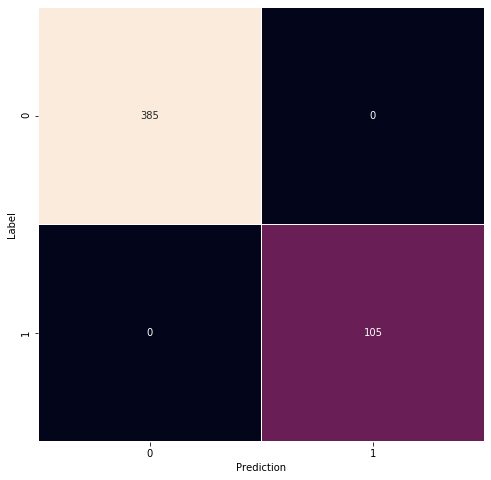

In [15]:
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [16]:
from sklearn.svm import SVC 
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)

In [17]:
clf=SVC(kernel='rbf')

In [18]:
clf.fit(x_train,y_train,)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Test Accuracy  1.0
Train Accuracy  1.0


1.0

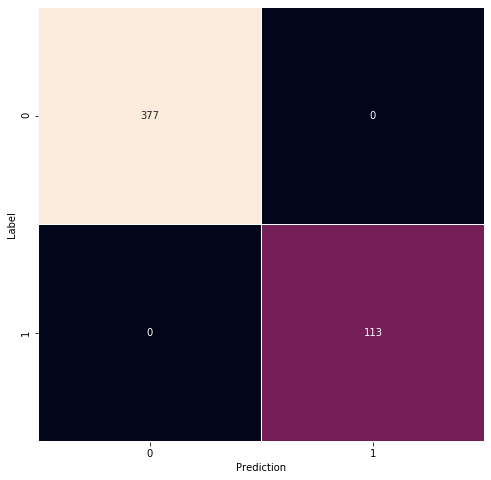

In [19]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [20]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(alpha=0.001,loss="log",verbose=1,max_iter=30000)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)

In [22]:
clf.fit(x_train,y_train)

-- Epoch 1
Norm: 12.97, NNZs: 12, Bias: -9.142237, T: 4408, Avg. loss: 0.203860
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 12.95, NNZs: 12, Bias: -8.954914, T: 8816, Avg. loss: 0.163200
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 12.94, NNZs: 12, Bias: -8.905499, T: 13224, Avg. loss: 0.163006
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 12.91, NNZs: 12, Bias: -8.926453, T: 17632, Avg. loss: 0.162751
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 12.88, NNZs: 12, Bias: -8.972554, T: 22040, Avg. loss: 0.162977
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 12.82, NNZs: 12, Bias: -9.050320, T: 26448, Avg. loss: 0.162690
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 12.87, NNZs: 12, Bias: -8.967347, T: 30856, Avg. loss: 0.162479
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 12.85, NNZs: 12, Bias: -8.996344, T: 35264, Avg. loss: 0.162525
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 12.83, NNZs: 12, Bias: -9.007379, T: 39672, Avg. loss: 0.

-- Epoch 119
Norm: 12.84, NNZs: 12, Bias: -8.943622, T: 524552, Avg. loss: 0.162293
Total training time: 0.42 seconds.
-- Epoch 120
Norm: 12.84, NNZs: 12, Bias: -8.947946, T: 528960, Avg. loss: 0.162273
Total training time: 0.42 seconds.
-- Epoch 121
Norm: 12.84, NNZs: 12, Bias: -8.943320, T: 533368, Avg. loss: 0.162301
Total training time: 0.42 seconds.
-- Epoch 122
Norm: 12.83, NNZs: 12, Bias: -8.953505, T: 537776, Avg. loss: 0.162223
Total training time: 0.43 seconds.
-- Epoch 123
Norm: 12.84, NNZs: 12, Bias: -8.944339, T: 542184, Avg. loss: 0.162327
Total training time: 0.43 seconds.
-- Epoch 124
Norm: 12.83, NNZs: 12, Bias: -8.955301, T: 546592, Avg. loss: 0.162182
Total training time: 0.44 seconds.
-- Epoch 125
Norm: 12.83, NNZs: 12, Bias: -8.948024, T: 551000, Avg. loss: 0.162325
Total training time: 0.44 seconds.
-- Epoch 126
Norm: 12.84, NNZs: 12, Bias: -8.947229, T: 555408, Avg. loss: 0.162296
Total training time: 0.44 seconds.
-- Epoch 127
Norm: 12.84, NNZs: 12, Bias: -8.943

-- Epoch 228
Norm: 12.83, NNZs: 12, Bias: -8.945571, T: 1005024, Avg. loss: 0.162298
Total training time: 0.82 seconds.
-- Epoch 229
Norm: 12.83, NNZs: 12, Bias: -8.947313, T: 1009432, Avg. loss: 0.162259
Total training time: 0.83 seconds.
-- Epoch 230
Norm: 12.83, NNZs: 12, Bias: -8.948240, T: 1013840, Avg. loss: 0.162264
Total training time: 0.83 seconds.
-- Epoch 231
Norm: 12.83, NNZs: 12, Bias: -8.947499, T: 1018248, Avg. loss: 0.162279
Total training time: 0.83 seconds.
-- Epoch 232
Norm: 12.84, NNZs: 12, Bias: -8.944441, T: 1022656, Avg. loss: 0.162297
Total training time: 0.84 seconds.
-- Epoch 233
Norm: 12.84, NNZs: 12, Bias: -8.943560, T: 1027064, Avg. loss: 0.162282
Total training time: 0.84 seconds.
-- Epoch 234
Norm: 12.84, NNZs: 12, Bias: -8.944318, T: 1031472, Avg. loss: 0.162269
Total training time: 0.84 seconds.
-- Epoch 235
Norm: 12.83, NNZs: 12, Bias: -8.945693, T: 1035880, Avg. loss: 0.162261
Total training time: 0.85 seconds.
-- Epoch 236
Norm: 12.84, NNZs: 12, Bias

Norm: 12.83, NNZs: 12, Bias: -8.945922, T: 1511944, Avg. loss: 0.162260
Total training time: 1.23 seconds.
-- Epoch 344
Norm: 12.83, NNZs: 12, Bias: -8.946512, T: 1516352, Avg. loss: 0.162258
Total training time: 1.23 seconds.
-- Epoch 345
Norm: 12.83, NNZs: 12, Bias: -8.945858, T: 1520760, Avg. loss: 0.162276
Total training time: 1.23 seconds.
-- Epoch 346
Norm: 12.83, NNZs: 12, Bias: -8.946428, T: 1525168, Avg. loss: 0.162257
Total training time: 1.24 seconds.
-- Epoch 347
Norm: 12.83, NNZs: 12, Bias: -8.945465, T: 1529576, Avg. loss: 0.162280
Total training time: 1.24 seconds.
-- Epoch 348
Norm: 12.83, NNZs: 12, Bias: -8.947685, T: 1533984, Avg. loss: 0.162231
Total training time: 1.25 seconds.
-- Epoch 349
Norm: 12.83, NNZs: 12, Bias: -8.946393, T: 1538392, Avg. loss: 0.162280
Total training time: 1.25 seconds.
-- Epoch 350
Norm: 12.83, NNZs: 12, Bias: -8.946671, T: 1542800, Avg. loss: 0.162262
Total training time: 1.25 seconds.
-- Epoch 351
Norm: 12.83, NNZs: 12, Bias: -8.947780, 

Norm: 12.83, NNZs: 12, Bias: -8.945549, T: 1842544, Avg. loss: 0.162257
Total training time: 1.43 seconds.
-- Epoch 419
Norm: 12.83, NNZs: 12, Bias: -8.945593, T: 1846952, Avg. loss: 0.162266
Total training time: 1.43 seconds.
-- Epoch 420
Norm: 12.83, NNZs: 12, Bias: -8.945508, T: 1851360, Avg. loss: 0.162267
Total training time: 1.44 seconds.
-- Epoch 421
Norm: 12.83, NNZs: 12, Bias: -8.943517, T: 1855768, Avg. loss: 0.162294
Total training time: 1.44 seconds.
-- Epoch 422
Norm: 12.83, NNZs: 12, Bias: -8.945570, T: 1860176, Avg. loss: 0.162232
Total training time: 1.44 seconds.
-- Epoch 423
Norm: 12.83, NNZs: 12, Bias: -8.945164, T: 1864584, Avg. loss: 0.162271
Total training time: 1.44 seconds.
-- Epoch 424
Norm: 12.83, NNZs: 12, Bias: -8.945887, T: 1868992, Avg. loss: 0.162255
Total training time: 1.44 seconds.
-- Epoch 425
Norm: 12.83, NNZs: 12, Bias: -8.945085, T: 1873400, Avg. loss: 0.162280
Total training time: 1.45 seconds.
-- Epoch 426
Norm: 12.83, NNZs: 12, Bias: -8.945606, 

Norm: 12.83, NNZs: 12, Bias: -8.945071, T: 2384728, Avg. loss: 0.162267
Total training time: 1.84 seconds.
-- Epoch 542
Norm: 12.83, NNZs: 12, Bias: -8.944986, T: 2389136, Avg. loss: 0.162265
Total training time: 1.84 seconds.
-- Epoch 543
Norm: 12.83, NNZs: 12, Bias: -8.944979, T: 2393544, Avg. loss: 0.162264
Total training time: 1.84 seconds.
-- Epoch 544
Norm: 12.83, NNZs: 12, Bias: -8.945172, T: 2397952, Avg. loss: 0.162260
Total training time: 1.84 seconds.
-- Epoch 545
Norm: 12.83, NNZs: 12, Bias: -8.944925, T: 2402360, Avg. loss: 0.162270
Total training time: 1.84 seconds.
-- Epoch 546
Norm: 12.83, NNZs: 12, Bias: -8.946297, T: 2406768, Avg. loss: 0.162230
Total training time: 1.84 seconds.
-- Epoch 547
Norm: 12.83, NNZs: 12, Bias: -8.946240, T: 2411176, Avg. loss: 0.162266
Total training time: 1.85 seconds.
-- Epoch 548
Norm: 12.83, NNZs: 12, Bias: -8.947102, T: 2415584, Avg. loss: 0.162243
Total training time: 1.85 seconds.
-- Epoch 549
Norm: 12.83, NNZs: 12, Bias: -8.946896, 

Norm: 12.83, NNZs: 12, Bias: -8.945744, T: 2851976, Avg. loss: 0.162263
Total training time: 2.05 seconds.
-- Epoch 648
Norm: 12.83, NNZs: 12, Bias: -8.945612, T: 2856384, Avg. loss: 0.162266
Total training time: 2.05 seconds.
-- Epoch 649
Norm: 12.83, NNZs: 12, Bias: -8.945652, T: 2860792, Avg. loss: 0.162262
Total training time: 2.05 seconds.
-- Epoch 650
Norm: 12.83, NNZs: 12, Bias: -8.945972, T: 2865200, Avg. loss: 0.162254
Total training time: 2.05 seconds.
-- Epoch 651
Norm: 12.83, NNZs: 12, Bias: -8.945051, T: 2869608, Avg. loss: 0.162285
Total training time: 2.05 seconds.
-- Epoch 652
Norm: 12.83, NNZs: 12, Bias: -8.944805, T: 2874016, Avg. loss: 0.162271
Total training time: 2.05 seconds.
-- Epoch 653
Norm: 12.83, NNZs: 12, Bias: -8.944558, T: 2878424, Avg. loss: 0.162271
Total training time: 2.06 seconds.
-- Epoch 654
Norm: 12.83, NNZs: 12, Bias: -8.944681, T: 2882832, Avg. loss: 0.162261
Total training time: 2.06 seconds.
-- Epoch 655
Norm: 12.83, NNZs: 12, Bias: -8.944340, 

Norm: 12.83, NNZs: 12, Bias: -8.945798, T: 3182576, Avg. loss: 0.162245
Total training time: 2.26 seconds.
-- Epoch 723
Norm: 12.83, NNZs: 12, Bias: -8.946213, T: 3186984, Avg. loss: 0.162249
Total training time: 2.26 seconds.
-- Epoch 724
Norm: 12.83, NNZs: 12, Bias: -8.946410, T: 3191392, Avg. loss: 0.162258
Total training time: 2.27 seconds.
-- Epoch 725
Norm: 12.83, NNZs: 12, Bias: -8.945941, T: 3195800, Avg. loss: 0.162277
Total training time: 2.27 seconds.
-- Epoch 726
Norm: 12.83, NNZs: 12, Bias: -8.945890, T: 3200208, Avg. loss: 0.162264
Total training time: 2.27 seconds.
-- Epoch 727
Norm: 12.83, NNZs: 12, Bias: -8.945232, T: 3204616, Avg. loss: 0.162282
Total training time: 2.28 seconds.
-- Epoch 728
Norm: 12.83, NNZs: 12, Bias: -8.945576, T: 3209024, Avg. loss: 0.162252
Total training time: 2.31 seconds.
-- Epoch 729
Norm: 12.83, NNZs: 12, Bias: -8.945991, T: 3213432, Avg. loss: 0.162250
Total training time: 2.31 seconds.
-- Epoch 730
Norm: 12.83, NNZs: 12, Bias: -8.945882, 

Norm: 12.83, NNZs: 12, Bias: -8.945251, T: 3645416, Avg. loss: 0.162270
Total training time: 2.68 seconds.
-- Epoch 828
Norm: 12.83, NNZs: 12, Bias: -8.944674, T: 3649824, Avg. loss: 0.162281
Total training time: 2.68 seconds.
-- Epoch 829
Norm: 12.83, NNZs: 12, Bias: -8.944798, T: 3654232, Avg. loss: 0.162259
Total training time: 2.68 seconds.
-- Epoch 830
Norm: 12.83, NNZs: 12, Bias: -8.944818, T: 3658640, Avg. loss: 0.162262
Total training time: 2.68 seconds.
-- Epoch 831
Norm: 12.83, NNZs: 12, Bias: -8.944693, T: 3663048, Avg. loss: 0.162266
Total training time: 2.69 seconds.
-- Epoch 832
Norm: 12.83, NNZs: 12, Bias: -8.945002, T: 3667456, Avg. loss: 0.162251
Total training time: 2.69 seconds.
-- Epoch 833
Norm: 12.83, NNZs: 12, Bias: -8.944930, T: 3671864, Avg. loss: 0.162266
Total training time: 2.69 seconds.
-- Epoch 834
Norm: 12.83, NNZs: 12, Bias: -8.944605, T: 3676272, Avg. loss: 0.162273
Total training time: 2.69 seconds.
-- Epoch 835
Norm: 12.83, NNZs: 12, Bias: -8.944910, 

Norm: 12.83, NNZs: 12, Bias: -8.944831, T: 4108256, Avg. loss: 0.162267
Total training time: 2.88 seconds.
-- Epoch 933
Norm: 12.83, NNZs: 12, Bias: -8.944929, T: 4112664, Avg. loss: 0.162259
Total training time: 2.88 seconds.
-- Epoch 934
Norm: 12.83, NNZs: 12, Bias: -8.944924, T: 4117072, Avg. loss: 0.162263
Total training time: 2.88 seconds.
-- Epoch 935
Norm: 12.83, NNZs: 12, Bias: -8.945041, T: 4121480, Avg. loss: 0.162259
Total training time: 2.89 seconds.
-- Epoch 936
Norm: 12.83, NNZs: 12, Bias: -8.944840, T: 4125888, Avg. loss: 0.162270
Total training time: 2.89 seconds.
-- Epoch 937
Norm: 12.83, NNZs: 12, Bias: -8.945162, T: 4130296, Avg. loss: 0.162250
Total training time: 2.89 seconds.
-- Epoch 938
Norm: 12.83, NNZs: 12, Bias: -8.945030, T: 4134704, Avg. loss: 0.162268
Total training time: 2.89 seconds.
-- Epoch 939
Norm: 12.83, NNZs: 12, Bias: -8.945144, T: 4139112, Avg. loss: 0.162259
Total training time: 2.89 seconds.
-- Epoch 940
Norm: 12.83, NNZs: 12, Bias: -8.945281, 

Total training time: 3.08 seconds.
-- Epoch 1037
Norm: 12.83, NNZs: 12, Bias: -8.945051, T: 4571096, Avg. loss: 0.162263
Total training time: 3.08 seconds.
-- Epoch 1038
Norm: 12.83, NNZs: 12, Bias: -8.945009, T: 4575504, Avg. loss: 0.162264
Total training time: 3.09 seconds.
-- Epoch 1039
Norm: 12.83, NNZs: 12, Bias: -8.944948, T: 4579912, Avg. loss: 0.162265
Total training time: 3.09 seconds.
-- Epoch 1040
Norm: 12.83, NNZs: 12, Bias: -8.945111, T: 4584320, Avg. loss: 0.162255
Total training time: 3.09 seconds.
-- Epoch 1041
Norm: 12.83, NNZs: 12, Bias: -8.945090, T: 4588728, Avg. loss: 0.162263
Total training time: 3.09 seconds.
-- Epoch 1042
Norm: 12.83, NNZs: 12, Bias: -8.945167, T: 4593136, Avg. loss: 0.162259
Total training time: 3.09 seconds.
-- Epoch 1043
Norm: 12.83, NNZs: 12, Bias: -8.945020, T: 4597544, Avg. loss: 0.162268
Total training time: 3.10 seconds.
-- Epoch 1044
Norm: 12.83, NNZs: 12, Bias: -8.945196, T: 4601952, Avg. loss: 0.162254
Total training time: 3.10 second

Norm: 12.83, NNZs: 12, Bias: -8.945288, T: 5179400, Avg. loss: 0.162264
Total training time: 3.49 seconds.
-- Epoch 1176
Norm: 12.83, NNZs: 12, Bias: -8.945309, T: 5183808, Avg. loss: 0.162261
Total training time: 3.49 seconds.
-- Epoch 1177
Norm: 12.83, NNZs: 12, Bias: -8.945236, T: 5188216, Avg. loss: 0.162266
Total training time: 3.50 seconds.
-- Epoch 1178
Norm: 12.83, NNZs: 12, Bias: -8.945352, T: 5192624, Avg. loss: 0.162256
Total training time: 3.50 seconds.
-- Epoch 1179
Norm: 12.83, NNZs: 12, Bias: -8.945203, T: 5197032, Avg. loss: 0.162269
Total training time: 3.50 seconds.
-- Epoch 1180
Norm: 12.83, NNZs: 12, Bias: -8.945290, T: 5201440, Avg. loss: 0.162258
Total training time: 3.50 seconds.
-- Epoch 1181
Norm: 12.83, NNZs: 12, Bias: -8.945374, T: 5205848, Avg. loss: 0.162258
Total training time: 3.51 seconds.
-- Epoch 1182
Norm: 12.83, NNZs: 12, Bias: -8.945386, T: 5210256, Avg. loss: 0.162261
Total training time: 3.51 seconds.
-- Epoch 1183
Norm: 12.83, NNZs: 12, Bias: -8.

Norm: 12.83, NNZs: 12, Bias: -8.944958, T: 5642240, Avg. loss: 0.162263
Total training time: 3.90 seconds.
-- Epoch 1281
Norm: 12.83, NNZs: 12, Bias: -8.945009, T: 5646648, Avg. loss: 0.162259
Total training time: 3.90 seconds.
-- Epoch 1282
Norm: 12.83, NNZs: 12, Bias: -8.945184, T: 5651056, Avg. loss: 0.162252
Total training time: 3.92 seconds.
-- Epoch 1283
Norm: 12.83, NNZs: 12, Bias: -8.945079, T: 5655464, Avg. loss: 0.162267
Total training time: 3.92 seconds.
-- Epoch 1284
Norm: 12.83, NNZs: 12, Bias: -8.944967, T: 5659872, Avg. loss: 0.162268
Total training time: 3.93 seconds.
-- Epoch 1285
Norm: 12.83, NNZs: 12, Bias: -8.945275, T: 5664280, Avg. loss: 0.162245
Total training time: 3.93 seconds.
-- Epoch 1286
Norm: 12.83, NNZs: 12, Bias: -8.945234, T: 5668688, Avg. loss: 0.162264
Total training time: 3.93 seconds.
-- Epoch 1287
Norm: 12.83, NNZs: 12, Bias: -8.945046, T: 5673096, Avg. loss: 0.162271
Total training time: 3.93 seconds.
-- Epoch 1288
Norm: 12.83, NNZs: 12, Bias: -8.

Norm: 12.83, NNZs: 12, Bias: -8.945130, T: 6254952, Avg. loss: 0.162268
Total training time: 4.30 seconds.
-- Epoch 1420
Norm: 12.83, NNZs: 12, Bias: -8.945247, T: 6259360, Avg. loss: 0.162255
Total training time: 4.30 seconds.
-- Epoch 1421
Norm: 12.83, NNZs: 12, Bias: -8.945166, T: 6263768, Avg. loss: 0.162266
Total training time: 4.30 seconds.
-- Epoch 1422
Norm: 12.83, NNZs: 12, Bias: -8.945181, T: 6268176, Avg. loss: 0.162260
Total training time: 4.31 seconds.
-- Epoch 1423
Norm: 12.83, NNZs: 12, Bias: -8.945195, T: 6272584, Avg. loss: 0.162261
Total training time: 4.31 seconds.
-- Epoch 1424
Norm: 12.83, NNZs: 12, Bias: -8.945119, T: 6276992, Avg. loss: 0.162265
Total training time: 4.31 seconds.
-- Epoch 1425
Norm: 12.83, NNZs: 12, Bias: -8.944972, T: 6281400, Avg. loss: 0.162270
Total training time: 4.31 seconds.
-- Epoch 1426
Norm: 12.83, NNZs: 12, Bias: -8.945093, T: 6285808, Avg. loss: 0.162254
Total training time: 4.31 seconds.
-- Epoch 1427
Norm: 12.83, NNZs: 12, Bias: -8.

Norm: 12.83, NNZs: 12, Bias: -8.945051, T: 6713384, Avg. loss: 0.162262
Total training time: 4.50 seconds.
-- Epoch 1524
Norm: 12.83, NNZs: 12, Bias: -8.945207, T: 6717792, Avg. loss: 0.162252
Total training time: 4.50 seconds.
-- Epoch 1525
Norm: 12.83, NNZs: 12, Bias: -8.945144, T: 6722200, Avg. loss: 0.162266
Total training time: 4.50 seconds.
-- Epoch 1526
Norm: 12.83, NNZs: 12, Bias: -8.945150, T: 6726608, Avg. loss: 0.162260
Total training time: 4.50 seconds.
-- Epoch 1527
Norm: 12.83, NNZs: 12, Bias: -8.945185, T: 6731016, Avg. loss: 0.162259
Total training time: 4.50 seconds.
-- Epoch 1528
Norm: 12.83, NNZs: 12, Bias: -8.945148, T: 6735424, Avg. loss: 0.162263
Total training time: 4.51 seconds.
-- Epoch 1529
Norm: 12.83, NNZs: 12, Bias: -8.945117, T: 6739832, Avg. loss: 0.162264
Total training time: 4.51 seconds.
-- Epoch 1530
Norm: 12.83, NNZs: 12, Bias: -8.945121, T: 6744240, Avg. loss: 0.162261
Total training time: 4.51 seconds.
-- Epoch 1531
Norm: 12.83, NNZs: 12, Bias: -8.

Norm: 12.83, NNZs: 12, Bias: -8.945077, T: 7101288, Avg. loss: 0.162259
Total training time: 4.70 seconds.
-- Epoch 1612
Norm: 12.83, NNZs: 12, Bias: -8.945062, T: 7105696, Avg. loss: 0.162262
Total training time: 4.71 seconds.
-- Epoch 1613
Norm: 12.83, NNZs: 12, Bias: -8.944949, T: 7110104, Avg. loss: 0.162268
Total training time: 4.71 seconds.
-- Epoch 1614
Norm: 12.83, NNZs: 12, Bias: -8.944945, T: 7114512, Avg. loss: 0.162262
Total training time: 4.71 seconds.
-- Epoch 1615
Norm: 12.83, NNZs: 12, Bias: -8.944969, T: 7118920, Avg. loss: 0.162260
Total training time: 4.71 seconds.
-- Epoch 1616
Norm: 12.83, NNZs: 12, Bias: -8.945028, T: 7123328, Avg. loss: 0.162258
Total training time: 4.72 seconds.
-- Epoch 1617
Norm: 12.83, NNZs: 12, Bias: -8.945052, T: 7127736, Avg. loss: 0.162260
Total training time: 4.73 seconds.
-- Epoch 1618
Norm: 12.83, NNZs: 12, Bias: -8.945068, T: 7132144, Avg. loss: 0.162261
Total training time: 4.73 seconds.
-- Epoch 1619
Norm: 12.83, NNZs: 12, Bias: -8.

Norm: 12.83, NNZs: 12, Bias: -8.945177, T: 7656696, Avg. loss: 0.162257
Total training time: 5.11 seconds.
-- Epoch 1738
Norm: 12.83, NNZs: 12, Bias: -8.945158, T: 7661104, Avg. loss: 0.162262
Total training time: 5.12 seconds.
-- Epoch 1739
Norm: 12.83, NNZs: 12, Bias: -8.945213, T: 7665512, Avg. loss: 0.162257
Total training time: 5.12 seconds.
-- Epoch 1740
Norm: 12.83, NNZs: 12, Bias: -8.945243, T: 7669920, Avg. loss: 0.162259
Total training time: 5.12 seconds.
-- Epoch 1741
Norm: 12.83, NNZs: 12, Bias: -8.945213, T: 7674328, Avg. loss: 0.162264
Total training time: 5.12 seconds.
-- Epoch 1742
Norm: 12.83, NNZs: 12, Bias: -8.945324, T: 7678736, Avg. loss: 0.162253
Total training time: 5.12 seconds.
-- Epoch 1743
Norm: 12.83, NNZs: 12, Bias: -8.945280, T: 7683144, Avg. loss: 0.162264
Total training time: 5.12 seconds.
-- Epoch 1744
Norm: 12.83, NNZs: 12, Bias: -8.945140, T: 7687552, Avg. loss: 0.162270
Total training time: 5.13 seconds.
-- Epoch 1745
Norm: 12.83, NNZs: 12, Bias: -8.

Norm: 12.83, NNZs: 12, Bias: -8.945156, T: 8097496, Avg. loss: 0.162260
Total training time: 5.31 seconds.
-- Epoch 1838
Norm: 12.83, NNZs: 12, Bias: -8.945173, T: 8101904, Avg. loss: 0.162260
Total training time: 5.32 seconds.
-- Epoch 1839
Norm: 12.83, NNZs: 12, Bias: -8.945195, T: 8106312, Avg. loss: 0.162260
Total training time: 5.32 seconds.
-- Epoch 1840
Norm: 12.83, NNZs: 12, Bias: -8.945299, T: 8110720, Avg. loss: 0.162253
Total training time: 5.32 seconds.
-- Epoch 1841
Norm: 12.83, NNZs: 12, Bias: -8.945226, T: 8115128, Avg. loss: 0.162267
Total training time: 5.32 seconds.
-- Epoch 1842
Norm: 12.83, NNZs: 12, Bias: -8.945194, T: 8119536, Avg. loss: 0.162263
Total training time: 5.32 seconds.
-- Epoch 1843
Norm: 12.83, NNZs: 12, Bias: -8.945189, T: 8123944, Avg. loss: 0.162262
Total training time: 5.32 seconds.
-- Epoch 1844
Norm: 12.83, NNZs: 12, Bias: -8.945169, T: 8128352, Avg. loss: 0.162263
Total training time: 5.33 seconds.
-- Epoch 1845
Norm: 12.83, NNZs: 12, Bias: -8.

Total training time: 5.52 seconds.
-- Epoch 1953
Norm: 12.83, NNZs: 12, Bias: -8.944970, T: 8608824, Avg. loss: 0.162263
Total training time: 5.52 seconds.
-- Epoch 1954
Norm: 12.83, NNZs: 12, Bias: -8.944914, T: 8613232, Avg. loss: 0.162266
Total training time: 5.52 seconds.
-- Epoch 1955
Norm: 12.83, NNZs: 12, Bias: -8.944862, T: 8617640, Avg. loss: 0.162265
Total training time: 5.52 seconds.
-- Epoch 1956
Norm: 12.83, NNZs: 12, Bias: -8.944859, T: 8622048, Avg. loss: 0.162261
Total training time: 5.52 seconds.
-- Epoch 1957
Norm: 12.83, NNZs: 12, Bias: -8.944866, T: 8626456, Avg. loss: 0.162261
Total training time: 5.52 seconds.
-- Epoch 1958
Norm: 12.83, NNZs: 12, Bias: -8.944960, T: 8630864, Avg. loss: 0.162254
Total training time: 5.53 seconds.
-- Epoch 1959
Norm: 12.83, NNZs: 12, Bias: -8.945006, T: 8635272, Avg. loss: 0.162258
Total training time: 5.53 seconds.
-- Epoch 1960
Norm: 12.83, NNZs: 12, Bias: -8.945016, T: 8639680, Avg. loss: 0.162261
Total training time: 5.53 second

Norm: 12.83, NNZs: 12, Bias: -8.945029, T: 9076072, Avg. loss: 0.162267
Total training time: 5.72 seconds.
-- Epoch 2060
Norm: 12.83, NNZs: 12, Bias: -8.945010, T: 9080480, Avg. loss: 0.162263
Total training time: 5.72 seconds.
-- Epoch 2061
Norm: 12.83, NNZs: 12, Bias: -8.944992, T: 9084888, Avg. loss: 0.162262
Total training time: 5.72 seconds.
-- Epoch 2062
Norm: 12.83, NNZs: 12, Bias: -8.945025, T: 9089296, Avg. loss: 0.162258
Total training time: 5.73 seconds.
-- Epoch 2063
Norm: 12.83, NNZs: 12, Bias: -8.945081, T: 9093704, Avg. loss: 0.162256
Total training time: 5.73 seconds.
-- Epoch 2064
Norm: 12.83, NNZs: 12, Bias: -8.945023, T: 9098112, Avg. loss: 0.162266
Total training time: 5.73 seconds.
-- Epoch 2065
Norm: 12.83, NNZs: 12, Bias: -8.945010, T: 9102520, Avg. loss: 0.162262
Total training time: 5.74 seconds.
-- Epoch 2066
Norm: 12.83, NNZs: 12, Bias: -8.944903, T: 9106928, Avg. loss: 0.162270
Total training time: 5.74 seconds.
-- Epoch 2067
Norm: 12.83, NNZs: 12, Bias: -8.

Norm: 12.83, NNZs: 12, Bias: -8.945031, T: 9393448, Avg. loss: 0.162262
Total training time: 5.92 seconds.
-- Epoch 2132
Norm: 12.83, NNZs: 12, Bias: -8.945062, T: 9397856, Avg. loss: 0.162259
Total training time: 5.92 seconds.
-- Epoch 2133
Norm: 12.83, NNZs: 12, Bias: -8.945047, T: 9402264, Avg. loss: 0.162262
Total training time: 5.92 seconds.
-- Epoch 2134
Norm: 12.83, NNZs: 12, Bias: -8.945045, T: 9406672, Avg. loss: 0.162261
Total training time: 5.92 seconds.
-- Epoch 2135
Norm: 12.83, NNZs: 12, Bias: -8.945087, T: 9411080, Avg. loss: 0.162257
Total training time: 5.92 seconds.
-- Epoch 2136
Norm: 12.83, NNZs: 12, Bias: -8.945049, T: 9415488, Avg. loss: 0.162264
Total training time: 5.92 seconds.
-- Epoch 2137
Norm: 12.83, NNZs: 12, Bias: -8.945065, T: 9419896, Avg. loss: 0.162260
Total training time: 5.92 seconds.
-- Epoch 2138
Norm: 12.83, NNZs: 12, Bias: -8.945050, T: 9424304, Avg. loss: 0.162262
Total training time: 5.93 seconds.
-- Epoch 2139
Norm: 12.83, NNZs: 12, Bias: -8.

Norm: 12.83, NNZs: 12, Bias: -8.945040, T: 9878328, Avg. loss: 0.162262
Total training time: 6.13 seconds.
-- Epoch 2242
Norm: 12.83, NNZs: 12, Bias: -8.945043, T: 9882736, Avg. loss: 0.162261
Total training time: 6.13 seconds.
-- Epoch 2243
Norm: 12.83, NNZs: 12, Bias: -8.944988, T: 9887144, Avg. loss: 0.162266
Total training time: 6.13 seconds.
-- Epoch 2244
Norm: 12.83, NNZs: 12, Bias: -8.944991, T: 9891552, Avg. loss: 0.162261
Total training time: 6.14 seconds.
-- Epoch 2245
Norm: 12.83, NNZs: 12, Bias: -8.945000, T: 9895960, Avg. loss: 0.162260
Total training time: 6.15 seconds.
-- Epoch 2246
Norm: 12.83, NNZs: 12, Bias: -8.944988, T: 9900368, Avg. loss: 0.162262
Total training time: 6.15 seconds.
-- Epoch 2247
Norm: 12.83, NNZs: 12, Bias: -8.945048, T: 9904776, Avg. loss: 0.162256
Total training time: 6.15 seconds.
-- Epoch 2248
Norm: 12.83, NNZs: 12, Bias: -8.944978, T: 9909184, Avg. loss: 0.162268
Total training time: 6.16 seconds.
-- Epoch 2249
Norm: 12.83, NNZs: 12, Bias: -8.

Norm: 12.83, NNZs: 12, Bias: -8.944997, T: 10561568, Avg. loss: 0.162258
Total training time: 6.53 seconds.
-- Epoch 2397
Norm: 12.83, NNZs: 12, Bias: -8.944996, T: 10565976, Avg. loss: 0.162261
Total training time: 6.54 seconds.
-- Epoch 2398
Norm: 12.83, NNZs: 12, Bias: -8.945002, T: 10570384, Avg. loss: 0.162260
Total training time: 6.54 seconds.
-- Epoch 2399
Norm: 12.83, NNZs: 12, Bias: -8.944925, T: 10574792, Avg. loss: 0.162268
Total training time: 6.54 seconds.
-- Epoch 2400
Norm: 12.83, NNZs: 12, Bias: -8.944923, T: 10579200, Avg. loss: 0.162261
Total training time: 6.55 seconds.
-- Epoch 2401
Norm: 12.83, NNZs: 12, Bias: -8.944933, T: 10583608, Avg. loss: 0.162260
Total training time: 6.55 seconds.
-- Epoch 2402
Norm: 12.83, NNZs: 12, Bias: -8.944945, T: 10588016, Avg. loss: 0.162260
Total training time: 6.55 seconds.
-- Epoch 2403
Norm: 12.83, NNZs: 12, Bias: -8.944941, T: 10592424, Avg. loss: 0.162261
Total training time: 6.55 seconds.
-- Epoch 2404
Norm: 12.83, NNZs: 12, B

-- Epoch 2497
Norm: 12.83, NNZs: 12, Bias: -8.944972, T: 11006776, Avg. loss: 0.162264
Total training time: 6.73 seconds.
-- Epoch 2498
Norm: 12.83, NNZs: 12, Bias: -8.944981, T: 11011184, Avg. loss: 0.162260
Total training time: 6.73 seconds.
-- Epoch 2499
Norm: 12.83, NNZs: 12, Bias: -8.945005, T: 11015592, Avg. loss: 0.162259
Total training time: 6.74 seconds.
-- Epoch 2500
Norm: 12.83, NNZs: 12, Bias: -8.944992, T: 11020000, Avg. loss: 0.162262
Total training time: 6.74 seconds.
-- Epoch 2501
Norm: 12.83, NNZs: 12, Bias: -8.944993, T: 11024408, Avg. loss: 0.162261
Total training time: 6.74 seconds.
-- Epoch 2502
Norm: 12.83, NNZs: 12, Bias: -8.945028, T: 11028816, Avg. loss: 0.162257
Total training time: 6.74 seconds.
-- Epoch 2503
Norm: 12.83, NNZs: 12, Bias: -8.945010, T: 11033224, Avg. loss: 0.162263
Total training time: 6.74 seconds.
-- Epoch 2504
Norm: 12.83, NNZs: 12, Bias: -8.944995, T: 11037632, Avg. loss: 0.162263
Total training time: 6.74 seconds.
-- Epoch 2505
Norm: 12.8

Total training time: 6.93 seconds.
-- Epoch 2599
Norm: 12.83, NNZs: 12, Bias: -8.944934, T: 11456392, Avg. loss: 0.162258
Total training time: 6.93 seconds.
-- Epoch 2600
Norm: 12.83, NNZs: 12, Bias: -8.944897, T: 11460800, Avg. loss: 0.162264
Total training time: 6.94 seconds.
-- Epoch 2601
Norm: 12.83, NNZs: 12, Bias: -8.944920, T: 11465208, Avg. loss: 0.162259
Total training time: 6.94 seconds.
-- Epoch 2602
Norm: 12.83, NNZs: 12, Bias: -8.944897, T: 11469616, Avg. loss: 0.162264
Total training time: 6.94 seconds.
-- Epoch 2603
Norm: 12.83, NNZs: 12, Bias: -8.944886, T: 11474024, Avg. loss: 0.162262
Total training time: 6.94 seconds.
-- Epoch 2604
Norm: 12.83, NNZs: 12, Bias: -8.944940, T: 11478432, Avg. loss: 0.162255
Total training time: 6.94 seconds.
-- Epoch 2605
Norm: 12.83, NNZs: 12, Bias: -8.944964, T: 11482840, Avg. loss: 0.162258
Total training time: 6.94 seconds.
-- Epoch 2606
Norm: 12.83, NNZs: 12, Bias: -8.944943, T: 11487248, Avg. loss: 0.162263
Total training time: 6.9

Norm: 12.83, NNZs: 12, Bias: -8.944947, T: 11835480, Avg. loss: 0.162262
Total training time: 7.13 seconds.
-- Epoch 2686
Norm: 12.83, NNZs: 12, Bias: -8.944952, T: 11839888, Avg. loss: 0.162260
Total training time: 7.14 seconds.
-- Epoch 2687
Norm: 12.83, NNZs: 12, Bias: -8.944945, T: 11844296, Avg. loss: 0.162262
Total training time: 7.14 seconds.
-- Epoch 2688
Norm: 12.83, NNZs: 12, Bias: -8.944936, T: 11848704, Avg. loss: 0.162262
Total training time: 7.14 seconds.
-- Epoch 2689
Norm: 12.83, NNZs: 12, Bias: -8.944912, T: 11853112, Avg. loss: 0.162264
Total training time: 7.14 seconds.
-- Epoch 2690
Norm: 12.83, NNZs: 12, Bias: -8.944945, T: 11857520, Avg. loss: 0.162257
Total training time: 7.14 seconds.
-- Epoch 2691
Norm: 12.83, NNZs: 12, Bias: -8.944951, T: 11861928, Avg. loss: 0.162260
Total training time: 7.14 seconds.
-- Epoch 2692
Norm: 12.83, NNZs: 12, Bias: -8.944939, T: 11866336, Avg. loss: 0.162263
Total training time: 7.14 seconds.
-- Epoch 2693
Norm: 12.83, NNZs: 12, B

Norm: 12.83, NNZs: 12, Bias: -8.944974, T: 12307136, Avg. loss: 0.162259
Total training time: 7.34 seconds.
-- Epoch 2793
Norm: 12.83, NNZs: 12, Bias: -8.944957, T: 12311544, Avg. loss: 0.162263
Total training time: 7.34 seconds.
-- Epoch 2794
Norm: 12.83, NNZs: 12, Bias: -8.944968, T: 12315952, Avg. loss: 0.162260
Total training time: 7.34 seconds.
-- Epoch 2795
Norm: 12.83, NNZs: 12, Bias: -8.944970, T: 12320360, Avg. loss: 0.162261
Total training time: 7.34 seconds.
-- Epoch 2796
Norm: 12.83, NNZs: 12, Bias: -8.944962, T: 12324768, Avg. loss: 0.162262
Total training time: 7.34 seconds.
-- Epoch 2797
Norm: 12.83, NNZs: 12, Bias: -8.944995, T: 12329176, Avg. loss: 0.162257
Total training time: 7.34 seconds.
-- Epoch 2798
Norm: 12.83, NNZs: 12, Bias: -8.944951, T: 12333584, Avg. loss: 0.162266
Total training time: 7.35 seconds.
-- Epoch 2799
Norm: 12.83, NNZs: 12, Bias: -8.944917, T: 12337992, Avg. loss: 0.162265
Total training time: 7.35 seconds.
-- Epoch 2800
Norm: 12.83, NNZs: 12, B

Total training time: 7.54 seconds.
-- Epoch 2898
Norm: 12.83, NNZs: 12, Bias: -8.944966, T: 12774384, Avg. loss: 0.162258
Total training time: 7.54 seconds.
-- Epoch 2899
Norm: 12.83, NNZs: 12, Bias: -8.944939, T: 12778792, Avg. loss: 0.162264
Total training time: 7.54 seconds.
-- Epoch 2900
Norm: 12.83, NNZs: 12, Bias: -8.944937, T: 12783200, Avg. loss: 0.162262
Total training time: 7.54 seconds.
-- Epoch 2901
Norm: 12.83, NNZs: 12, Bias: -8.944994, T: 12787608, Avg. loss: 0.162254
Total training time: 7.54 seconds.
-- Epoch 2902
Norm: 12.83, NNZs: 12, Bias: -8.945000, T: 12792016, Avg. loss: 0.162260
Total training time: 7.54 seconds.
-- Epoch 2903
Norm: 12.83, NNZs: 12, Bias: -8.944981, T: 12796424, Avg. loss: 0.162263
Total training time: 7.55 seconds.
-- Epoch 2904
Norm: 12.83, NNZs: 12, Bias: -8.944962, T: 12800832, Avg. loss: 0.162263
Total training time: 7.55 seconds.
-- Epoch 2905
Norm: 12.83, NNZs: 12, Bias: -8.944935, T: 12805240, Avg. loss: 0.162264
Total training time: 7.5

Norm: 12.83, NNZs: 12, Bias: -8.944906, T: 13144656, Avg. loss: 0.162260
Total training time: 7.74 seconds.
-- Epoch 2983
Norm: 12.83, NNZs: 12, Bias: -8.944910, T: 13149064, Avg. loss: 0.162260
Total training time: 7.74 seconds.
-- Epoch 2984
Norm: 12.83, NNZs: 12, Bias: -8.944950, T: 13153472, Avg. loss: 0.162256
Total training time: 7.75 seconds.
-- Epoch 2985
Norm: 12.83, NNZs: 12, Bias: -8.944935, T: 13157880, Avg. loss: 0.162263
Total training time: 7.75 seconds.
-- Epoch 2986
Norm: 12.83, NNZs: 12, Bias: -8.944938, T: 13162288, Avg. loss: 0.162261
Total training time: 7.75 seconds.
-- Epoch 2987
Norm: 12.83, NNZs: 12, Bias: -8.944962, T: 13166696, Avg. loss: 0.162258
Total training time: 7.75 seconds.
-- Epoch 2988
Norm: 12.83, NNZs: 12, Bias: -8.944973, T: 13171104, Avg. loss: 0.162260
Total training time: 7.76 seconds.
-- Epoch 2989
Norm: 12.83, NNZs: 12, Bias: -8.944962, T: 13175512, Avg. loss: 0.162262
Total training time: 7.76 seconds.
-- Epoch 2990
Norm: 12.83, NNZs: 12, B

Total training time: 7.94 seconds.
-- Epoch 3064
Norm: 12.83, NNZs: 12, Bias: -8.944908, T: 13506112, Avg. loss: 0.162260
Total training time: 7.94 seconds.
-- Epoch 3065
Norm: 12.83, NNZs: 12, Bias: -8.944928, T: 13510520, Avg. loss: 0.162258
Total training time: 7.94 seconds.
-- Epoch 3066
Norm: 12.83, NNZs: 12, Bias: -8.944936, T: 13514928, Avg. loss: 0.162260
Total training time: 7.95 seconds.
-- Epoch 3067
Norm: 12.83, NNZs: 12, Bias: -8.944906, T: 13519336, Avg. loss: 0.162265
Total training time: 7.95 seconds.
-- Epoch 3068
Norm: 12.83, NNZs: 12, Bias: -8.944929, T: 13523744, Avg. loss: 0.162258
Total training time: 7.95 seconds.
-- Epoch 3069
Norm: 12.83, NNZs: 12, Bias: -8.944940, T: 13528152, Avg. loss: 0.162260
Total training time: 7.95 seconds.
-- Epoch 3070
Norm: 12.83, NNZs: 12, Bias: -8.944946, T: 13532560, Avg. loss: 0.162260
Total training time: 7.96 seconds.
-- Epoch 3071
Norm: 12.83, NNZs: 12, Bias: -8.944941, T: 13536968, Avg. loss: 0.162262
Total training time: 7.9

Norm: 12.83, NNZs: 12, Bias: -8.945027, T: 13889608, Avg. loss: 0.162263
Total training time: 8.14 seconds.
-- Epoch 3152
Norm: 12.83, NNZs: 12, Bias: -8.945032, T: 13894016, Avg. loss: 0.162261
Total training time: 8.14 seconds.
-- Epoch 3153
Norm: 12.83, NNZs: 12, Bias: -8.945050, T: 13898424, Avg. loss: 0.162259
Total training time: 8.15 seconds.
-- Epoch 3154
Norm: 12.83, NNZs: 12, Bias: -8.945013, T: 13902832, Avg. loss: 0.162266
Total training time: 8.15 seconds.
-- Epoch 3155
Norm: 12.83, NNZs: 12, Bias: -8.945015, T: 13907240, Avg. loss: 0.162261
Total training time: 8.15 seconds.
-- Epoch 3156
Norm: 12.83, NNZs: 12, Bias: -8.945048, T: 13911648, Avg. loss: 0.162257
Total training time: 8.15 seconds.
-- Epoch 3157
Norm: 12.83, NNZs: 12, Bias: -8.945029, T: 13916056, Avg. loss: 0.162263
Total training time: 8.16 seconds.
-- Epoch 3158
Norm: 12.83, NNZs: 12, Bias: -8.945053, T: 13920464, Avg. loss: 0.162258
Total training time: 8.16 seconds.
-- Epoch 3159
Norm: 12.83, NNZs: 12, B

Norm: 12.83, NNZs: 12, Bias: -8.944974, T: 14286328, Avg. loss: 0.162263
Total training time: 8.34 seconds.
-- Epoch 3242
Norm: 12.83, NNZs: 12, Bias: -8.944971, T: 14290736, Avg. loss: 0.162261
Total training time: 8.35 seconds.
-- Epoch 3243
Norm: 12.83, NNZs: 12, Bias: -8.944979, T: 14295144, Avg. loss: 0.162260
Total training time: 8.35 seconds.
-- Epoch 3244
Norm: 12.83, NNZs: 12, Bias: -8.944966, T: 14299552, Avg. loss: 0.162263
Total training time: 8.35 seconds.
-- Epoch 3245
Norm: 12.83, NNZs: 12, Bias: -8.944947, T: 14303960, Avg. loss: 0.162264
Total training time: 8.35 seconds.
-- Epoch 3246
Norm: 12.83, NNZs: 12, Bias: -8.944943, T: 14308368, Avg. loss: 0.162262
Total training time: 8.36 seconds.
-- Epoch 3247
Norm: 12.83, NNZs: 12, Bias: -8.944920, T: 14312776, Avg. loss: 0.162264
Total training time: 8.36 seconds.
-- Epoch 3248
Norm: 12.83, NNZs: 12, Bias: -8.944913, T: 14317184, Avg. loss: 0.162262
Total training time: 8.36 seconds.
-- Epoch 3249
Norm: 12.83, NNZs: 12, B

Norm: 12.83, NNZs: 12, Bias: -8.944876, T: 14775616, Avg. loss: 0.162262
Total training time: 8.54 seconds.
-- Epoch 3353
Norm: 12.83, NNZs: 12, Bias: -8.944899, T: 14780024, Avg. loss: 0.162258
Total training time: 8.55 seconds.
-- Epoch 3354
Norm: 12.83, NNZs: 12, Bias: -8.944873, T: 14784432, Avg. loss: 0.162264
Total training time: 8.55 seconds.
-- Epoch 3355
Norm: 12.83, NNZs: 12, Bias: -8.944866, T: 14788840, Avg. loss: 0.162262
Total training time: 8.55 seconds.
-- Epoch 3356
Norm: 12.83, NNZs: 12, Bias: -8.944874, T: 14793248, Avg. loss: 0.162260
Total training time: 8.55 seconds.
-- Epoch 3357
Norm: 12.83, NNZs: 12, Bias: -8.944873, T: 14797656, Avg. loss: 0.162261
Total training time: 8.55 seconds.
-- Epoch 3358
Norm: 12.83, NNZs: 12, Bias: -8.944887, T: 14802064, Avg. loss: 0.162259
Total training time: 8.56 seconds.
-- Epoch 3359
Norm: 12.83, NNZs: 12, Bias: -8.944869, T: 14806472, Avg. loss: 0.162264
Total training time: 8.56 seconds.
-- Epoch 3360
Norm: 12.83, NNZs: 12, B

Norm: 12.83, NNZs: 12, Bias: -8.944945, T: 15295760, Avg. loss: 0.162259
Total training time: 8.75 seconds.
-- Epoch 3471
Norm: 12.83, NNZs: 12, Bias: -8.944948, T: 15300168, Avg. loss: 0.162261
Total training time: 8.75 seconds.
-- Epoch 3472
Norm: 12.83, NNZs: 12, Bias: -8.944940, T: 15304576, Avg. loss: 0.162262
Total training time: 8.75 seconds.
-- Epoch 3473
Norm: 12.83, NNZs: 12, Bias: -8.944961, T: 15308984, Avg. loss: 0.162258
Total training time: 8.75 seconds.
-- Epoch 3474
Norm: 12.83, NNZs: 12, Bias: -8.944963, T: 15313392, Avg. loss: 0.162261
Total training time: 8.75 seconds.
-- Epoch 3475
Norm: 12.83, NNZs: 12, Bias: -8.944950, T: 15317800, Avg. loss: 0.162263
Total training time: 8.75 seconds.
-- Epoch 3476
Norm: 12.83, NNZs: 12, Bias: -8.944951, T: 15322208, Avg. loss: 0.162261
Total training time: 8.76 seconds.
-- Epoch 3477
Norm: 12.83, NNZs: 12, Bias: -8.944957, T: 15326616, Avg. loss: 0.162260
Total training time: 8.76 seconds.
-- Epoch 3478
Norm: 12.83, NNZs: 12, B

Norm: 12.83, NNZs: 12, Bias: -8.944891, T: 15723336, Avg. loss: 0.162263
Total training time: 8.95 seconds.
-- Epoch 3568
Norm: 12.83, NNZs: 12, Bias: -8.944875, T: 15727744, Avg. loss: 0.162263
Total training time: 8.95 seconds.
-- Epoch 3569
Norm: 12.83, NNZs: 12, Bias: -8.944869, T: 15732152, Avg. loss: 0.162262
Total training time: 8.96 seconds.
-- Epoch 3570
Norm: 12.83, NNZs: 12, Bias: -8.944878, T: 15736560, Avg. loss: 0.162260
Total training time: 8.96 seconds.
-- Epoch 3571
Norm: 12.83, NNZs: 12, Bias: -8.944887, T: 15740968, Avg. loss: 0.162260
Total training time: 8.97 seconds.
-- Epoch 3572
Norm: 12.83, NNZs: 12, Bias: -8.944866, T: 15745376, Avg. loss: 0.162264
Total training time: 8.97 seconds.
-- Epoch 3573
Norm: 12.83, NNZs: 12, Bias: -8.944852, T: 15749784, Avg. loss: 0.162263
Total training time: 8.97 seconds.
-- Epoch 3574
Norm: 12.83, NNZs: 12, Bias: -8.944862, T: 15754192, Avg. loss: 0.162259
Total training time: 8.97 seconds.
-- Epoch 3575
Norm: 12.83, NNZs: 12, B

Norm: 12.83, NNZs: 12, Bias: -8.944926, T: 16366904, Avg. loss: 0.162263
Total training time: 9.36 seconds.
-- Epoch 3714
Norm: 12.83, NNZs: 12, Bias: -8.944922, T: 16371312, Avg. loss: 0.162262
Total training time: 9.36 seconds.
-- Epoch 3715
Norm: 12.83, NNZs: 12, Bias: -8.944911, T: 16375720, Avg. loss: 0.162263
Total training time: 9.36 seconds.
-- Epoch 3716
Norm: 12.83, NNZs: 12, Bias: -8.944898, T: 16380128, Avg. loss: 0.162263
Total training time: 9.36 seconds.
-- Epoch 3717
Norm: 12.83, NNZs: 12, Bias: -8.944880, T: 16384536, Avg. loss: 0.162264
Total training time: 9.36 seconds.
-- Epoch 3718
Norm: 12.83, NNZs: 12, Bias: -8.944873, T: 16388944, Avg. loss: 0.162262
Total training time: 9.36 seconds.
-- Epoch 3719
Norm: 12.83, NNZs: 12, Bias: -8.944885, T: 16393352, Avg. loss: 0.162259
Total training time: 9.37 seconds.
-- Epoch 3720
Norm: 12.83, NNZs: 12, Bias: -8.944887, T: 16397760, Avg. loss: 0.162261
Total training time: 9.37 seconds.
-- Epoch 3721
Norm: 12.83, NNZs: 12, B

Norm: 12.83, NNZs: 12, Bias: -8.944921, T: 16834152, Avg. loss: 0.162260
Total training time: 9.56 seconds.
-- Epoch 3820
Norm: 12.83, NNZs: 12, Bias: -8.944918, T: 16838560, Avg. loss: 0.162261
Total training time: 9.56 seconds.
-- Epoch 3821
Norm: 12.83, NNZs: 12, Bias: -8.944913, T: 16842968, Avg. loss: 0.162262
Total training time: 9.56 seconds.
-- Epoch 3822
Norm: 12.83, NNZs: 12, Bias: -8.944899, T: 16847376, Avg. loss: 0.162263
Total training time: 9.56 seconds.
-- Epoch 3823
Norm: 12.83, NNZs: 12, Bias: -8.944892, T: 16851784, Avg. loss: 0.162262
Total training time: 9.57 seconds.
-- Epoch 3824
Norm: 12.83, NNZs: 12, Bias: -8.944886, T: 16856192, Avg. loss: 0.162262
Total training time: 9.57 seconds.
-- Epoch 3825
Norm: 12.83, NNZs: 12, Bias: -8.944877, T: 16860600, Avg. loss: 0.162262
Total training time: 9.57 seconds.
-- Epoch 3826
Norm: 12.83, NNZs: 12, Bias: -8.944878, T: 16865008, Avg. loss: 0.162261
Total training time: 9.57 seconds.
-- Epoch 3827
Norm: 12.83, NNZs: 12, B

Norm: 12.83, NNZs: 12, Bias: -8.944869, T: 17283768, Avg. loss: 0.162262
Total training time: 9.76 seconds.
-- Epoch 3922
Norm: 12.83, NNZs: 12, Bias: -8.944866, T: 17288176, Avg. loss: 0.162261
Total training time: 9.76 seconds.
-- Epoch 3923
Norm: 12.83, NNZs: 12, Bias: -8.944882, T: 17292584, Avg. loss: 0.162259
Total training time: 9.76 seconds.
-- Epoch 3924
Norm: 12.83, NNZs: 12, Bias: -8.944869, T: 17296992, Avg. loss: 0.162263
Total training time: 9.77 seconds.
-- Epoch 3925
Norm: 12.83, NNZs: 12, Bias: -8.944869, T: 17301400, Avg. loss: 0.162261
Total training time: 9.77 seconds.
-- Epoch 3926
Norm: 12.83, NNZs: 12, Bias: -8.944860, T: 17305808, Avg. loss: 0.162262
Total training time: 9.77 seconds.
-- Epoch 3927
Norm: 12.83, NNZs: 12, Bias: -8.944851, T: 17310216, Avg. loss: 0.162262
Total training time: 9.77 seconds.
-- Epoch 3928
Norm: 12.83, NNZs: 12, Bias: -8.944849, T: 17314624, Avg. loss: 0.162261
Total training time: 9.77 seconds.
-- Epoch 3929
Norm: 12.83, NNZs: 12, B

Norm: 12.83, NNZs: 12, Bias: -8.944856, T: 17764240, Avg. loss: 0.162260
Total training time: 9.97 seconds.
-- Epoch 4031
Norm: 12.83, NNZs: 12, Bias: -8.944852, T: 17768648, Avg. loss: 0.162262
Total training time: 9.97 seconds.
-- Epoch 4032
Norm: 12.83, NNZs: 12, Bias: -8.944857, T: 17773056, Avg. loss: 0.162260
Total training time: 9.97 seconds.
-- Epoch 4033
Norm: 12.83, NNZs: 12, Bias: -8.944868, T: 17777464, Avg. loss: 0.162259
Total training time: 9.97 seconds.
-- Epoch 4034
Norm: 12.83, NNZs: 12, Bias: -8.944872, T: 17781872, Avg. loss: 0.162260
Total training time: 9.97 seconds.
-- Epoch 4035
Norm: 12.83, NNZs: 12, Bias: -8.944895, T: 17786280, Avg. loss: 0.162257
Total training time: 9.98 seconds.
-- Epoch 4036
Norm: 12.83, NNZs: 12, Bias: -8.944891, T: 17790688, Avg. loss: 0.162262
Total training time: 9.98 seconds.
-- Epoch 4037
Norm: 12.83, NNZs: 12, Bias: -8.944890, T: 17795096, Avg. loss: 0.162261
Total training time: 9.98 seconds.
-- Epoch 4038
Norm: 12.83, NNZs: 12, B

Norm: 12.83, NNZs: 12, Bias: -8.944882, T: 18244712, Avg. loss: 0.162264
Total training time: 10.17 seconds.
-- Epoch 4140
Norm: 12.83, NNZs: 12, Bias: -8.944913, T: 18249120, Avg. loss: 0.162256
Total training time: 10.17 seconds.
-- Epoch 4141
Norm: 12.83, NNZs: 12, Bias: -8.944897, T: 18253528, Avg. loss: 0.162264
Total training time: 10.18 seconds.
-- Epoch 4142
Norm: 12.83, NNZs: 12, Bias: -8.944893, T: 18257936, Avg. loss: 0.162262
Total training time: 10.18 seconds.
-- Epoch 4143
Norm: 12.83, NNZs: 12, Bias: -8.944888, T: 18262344, Avg. loss: 0.162262
Total training time: 10.18 seconds.
-- Epoch 4144
Norm: 12.83, NNZs: 12, Bias: -8.944875, T: 18266752, Avg. loss: 0.162263
Total training time: 10.18 seconds.
-- Epoch 4145
Norm: 12.83, NNZs: 12, Bias: -8.944868, T: 18271160, Avg. loss: 0.162262
Total training time: 10.18 seconds.
-- Epoch 4146
Norm: 12.83, NNZs: 12, Bias: -8.944861, T: 18275568, Avg. loss: 0.162262
Total training time: 10.18 seconds.
-- Epoch 4147
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944909, T: 18725184, Avg. loss: 0.162260
Total training time: 10.37 seconds.
-- Epoch 4249
Norm: 12.83, NNZs: 12, Bias: -8.944892, T: 18729592, Avg. loss: 0.162264
Total training time: 10.38 seconds.
-- Epoch 4250
Norm: 12.83, NNZs: 12, Bias: -8.944892, T: 18734000, Avg. loss: 0.162261
Total training time: 10.38 seconds.
-- Epoch 4251
Norm: 12.83, NNZs: 12, Bias: -8.944882, T: 18738408, Avg. loss: 0.162262
Total training time: 10.38 seconds.
-- Epoch 4252
Norm: 12.83, NNZs: 12, Bias: -8.944873, T: 18742816, Avg. loss: 0.162263
Total training time: 10.38 seconds.
-- Epoch 4253
Norm: 12.83, NNZs: 12, Bias: -8.944878, T: 18747224, Avg. loss: 0.162260
Total training time: 10.38 seconds.
-- Epoch 4254
Norm: 12.83, NNZs: 12, Bias: -8.944891, T: 18751632, Avg. loss: 0.162259
Total training time: 10.39 seconds.
-- Epoch 4255
Norm: 12.83, NNZs: 12, Bias: -8.944892, T: 18756040, Avg. loss: 0.162261
Total training time: 10.39 seconds.
-- Epoch 4256
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944862, T: 19368752, Avg. loss: 0.162262
Total training time: 10.78 seconds.
-- Epoch 4395
Norm: 12.83, NNZs: 12, Bias: -8.944852, T: 19373160, Avg. loss: 0.162263
Total training time: 10.78 seconds.
-- Epoch 4396
Norm: 12.83, NNZs: 12, Bias: -8.944835, T: 19377568, Avg. loss: 0.162264
Total training time: 10.78 seconds.
-- Epoch 4397
Norm: 12.83, NNZs: 12, Bias: -8.944838, T: 19381976, Avg. loss: 0.162261
Total training time: 10.79 seconds.
-- Epoch 4398
Norm: 12.83, NNZs: 12, Bias: -8.944849, T: 19386384, Avg. loss: 0.162259
Total training time: 10.79 seconds.
-- Epoch 4399
Norm: 12.83, NNZs: 12, Bias: -8.944847, T: 19390792, Avg. loss: 0.162261
Total training time: 10.79 seconds.
-- Epoch 4400
Norm: 12.83, NNZs: 12, Bias: -8.944858, T: 19395200, Avg. loss: 0.162259
Total training time: 10.80 seconds.
-- Epoch 4401
Norm: 12.83, NNZs: 12, Bias: -8.944849, T: 19399608, Avg. loss: 0.162262
Total training time: 10.81 seconds.
-- Epoch 4402
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944831, T: 20060808, Avg. loss: 0.162258
Total training time: 11.19 seconds.
-- Epoch 4552
Norm: 12.83, NNZs: 12, Bias: -8.944819, T: 20065216, Avg. loss: 0.162263
Total training time: 11.19 seconds.
-- Epoch 4553
Norm: 12.83, NNZs: 12, Bias: -8.944823, T: 20069624, Avg. loss: 0.162260
Total training time: 11.20 seconds.
-- Epoch 4554
Norm: 12.83, NNZs: 12, Bias: -8.944810, T: 20074032, Avg. loss: 0.162263
Total training time: 11.20 seconds.
-- Epoch 4555
Norm: 12.83, NNZs: 12, Bias: -8.944832, T: 20078440, Avg. loss: 0.162257
Total training time: 11.20 seconds.
-- Epoch 4556
Norm: 12.83, NNZs: 12, Bias: -8.944848, T: 20082848, Avg. loss: 0.162258
Total training time: 11.21 seconds.
-- Epoch 4557
Norm: 12.83, NNZs: 12, Bias: -8.944847, T: 20087256, Avg. loss: 0.162261
Total training time: 11.21 seconds.
-- Epoch 4558
Norm: 12.83, NNZs: 12, Bias: -8.944842, T: 20091664, Avg. loss: 0.162262
Total training time: 11.21 seconds.
-- Epoch 4559
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944885, T: 20378184, Avg. loss: 0.162260
Total training time: 11.40 seconds.
-- Epoch 4624
Norm: 12.83, NNZs: 12, Bias: -8.944878, T: 20382592, Avg. loss: 0.162262
Total training time: 11.40 seconds.
-- Epoch 4625
Norm: 12.83, NNZs: 12, Bias: -8.944873, T: 20387000, Avg. loss: 0.162262
Total training time: 11.40 seconds.
-- Epoch 4626
Norm: 12.83, NNZs: 12, Bias: -8.944884, T: 20391408, Avg. loss: 0.162259
Total training time: 11.40 seconds.
-- Epoch 4627
Norm: 12.83, NNZs: 12, Bias: -8.944889, T: 20395816, Avg. loss: 0.162260
Total training time: 11.40 seconds.
-- Epoch 4628
Norm: 12.83, NNZs: 12, Bias: -8.944879, T: 20400224, Avg. loss: 0.162263
Total training time: 11.41 seconds.
-- Epoch 4629
Norm: 12.83, NNZs: 12, Bias: -8.944874, T: 20404632, Avg. loss: 0.162262
Total training time: 11.41 seconds.
-- Epoch 4630
Norm: 12.83, NNZs: 12, Bias: -8.944866, T: 20409040, Avg. loss: 0.162262
Total training time: 11.41 seconds.
-- Epoch 4631
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944903, T: 20810168, Avg. loss: 0.162262
Total training time: 11.61 seconds.
-- Epoch 4722
Norm: 12.83, NNZs: 12, Bias: -8.944903, T: 20814576, Avg. loss: 0.162261
Total training time: 11.61 seconds.
-- Epoch 4723
Norm: 12.83, NNZs: 12, Bias: -8.944908, T: 20818984, Avg. loss: 0.162260
Total training time: 11.61 seconds.
-- Epoch 4724
Norm: 12.83, NNZs: 12, Bias: -8.944907, T: 20823392, Avg. loss: 0.162261
Total training time: 11.61 seconds.
-- Epoch 4725
Norm: 12.83, NNZs: 12, Bias: -8.944904, T: 20827800, Avg. loss: 0.162262
Total training time: 11.61 seconds.
-- Epoch 4726
Norm: 12.83, NNZs: 12, Bias: -8.944893, T: 20832208, Avg. loss: 0.162263
Total training time: 11.62 seconds.
-- Epoch 4727
Norm: 12.83, NNZs: 12, Bias: -8.944897, T: 20836616, Avg. loss: 0.162260
Total training time: 11.62 seconds.
-- Epoch 4728
Norm: 12.83, NNZs: 12, Bias: -8.944898, T: 20841024, Avg. loss: 0.162261
Total training time: 11.62 seconds.
-- Epoch 4729
Norm: 12.83, NNZ

Total training time: 12.01 seconds.
-- Epoch 4862
Norm: 12.83, NNZs: 12, Bias: -8.944877, T: 21431696, Avg. loss: 0.162258
Total training time: 12.03 seconds.
-- Epoch 4863
Norm: 12.83, NNZs: 12, Bias: -8.944884, T: 21436104, Avg. loss: 0.162260
Total training time: 12.03 seconds.
-- Epoch 4864
Norm: 12.83, NNZs: 12, Bias: -8.944894, T: 21440512, Avg. loss: 0.162259
Total training time: 12.05 seconds.
-- Epoch 4865
Norm: 12.83, NNZs: 12, Bias: -8.944884, T: 21444920, Avg. loss: 0.162263
Total training time: 12.05 seconds.
-- Epoch 4866
Norm: 12.83, NNZs: 12, Bias: -8.944882, T: 21449328, Avg. loss: 0.162261
Total training time: 12.05 seconds.
-- Epoch 4867
Norm: 12.83, NNZs: 12, Bias: -8.944875, T: 21453736, Avg. loss: 0.162263
Total training time: 12.05 seconds.
-- Epoch 4868
Norm: 12.83, NNZs: 12, Bias: -8.944868, T: 21458144, Avg. loss: 0.162262
Total training time: 12.06 seconds.
-- Epoch 4869
Norm: 12.83, NNZs: 12, Bias: -8.944868, T: 21462552, Avg. loss: 0.162261
Total training t

Norm: 12.83, NNZs: 12, Bias: -8.944835, T: 21925392, Avg. loss: 0.162261
Total training time: 12.44 seconds.
-- Epoch 4975
Norm: 12.83, NNZs: 12, Bias: -8.944831, T: 21929800, Avg. loss: 0.162262
Total training time: 12.44 seconds.
-- Epoch 4976
Norm: 12.83, NNZs: 12, Bias: -8.944832, T: 21934208, Avg. loss: 0.162261
Total training time: 12.44 seconds.
-- Epoch 4977
Norm: 12.83, NNZs: 12, Bias: -8.944838, T: 21938616, Avg. loss: 0.162260
Total training time: 12.45 seconds.
-- Epoch 4978
Norm: 12.83, NNZs: 12, Bias: -8.944832, T: 21943024, Avg. loss: 0.162262
Total training time: 12.45 seconds.
-- Epoch 4979
Norm: 12.83, NNZs: 12, Bias: -8.944832, T: 21947432, Avg. loss: 0.162261
Total training time: 12.45 seconds.
-- Epoch 4980
Norm: 12.83, NNZs: 12, Bias: -8.944837, T: 21951840, Avg. loss: 0.162260
Total training time: 12.46 seconds.
-- Epoch 4981
Norm: 12.83, NNZs: 12, Bias: -8.944834, T: 21956248, Avg. loss: 0.162262
Total training time: 12.46 seconds.
-- Epoch 4982
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944852, T: 22555736, Avg. loss: 0.162259
Total training time: 12.84 seconds.
-- Epoch 5118
Norm: 12.83, NNZs: 12, Bias: -8.944855, T: 22560144, Avg. loss: 0.162260
Total training time: 12.84 seconds.
-- Epoch 5119
Norm: 12.83, NNZs: 12, Bias: -8.944851, T: 22564552, Avg. loss: 0.162262
Total training time: 12.84 seconds.
-- Epoch 5120
Norm: 12.83, NNZs: 12, Bias: -8.944864, T: 22568960, Avg. loss: 0.162258
Total training time: 12.85 seconds.
-- Epoch 5121
Norm: 12.83, NNZs: 12, Bias: -8.944879, T: 22573368, Avg. loss: 0.162258
Total training time: 12.85 seconds.
-- Epoch 5122
Norm: 12.83, NNZs: 12, Bias: -8.944884, T: 22577776, Avg. loss: 0.162260
Total training time: 12.85 seconds.
-- Epoch 5123
Norm: 12.83, NNZs: 12, Bias: -8.944889, T: 22582184, Avg. loss: 0.162260
Total training time: 12.86 seconds.
-- Epoch 5124
Norm: 12.83, NNZs: 12, Bias: -8.944880, T: 22586592, Avg. loss: 0.162263
Total training time: 12.86 seconds.
-- Epoch 5125
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944866, T: 22903968, Avg. loss: 0.162262
Total training time: 13.04 seconds.
-- Epoch 5197
Norm: 12.83, NNZs: 12, Bias: -8.944868, T: 22908376, Avg. loss: 0.162261
Total training time: 13.05 seconds.
-- Epoch 5198
Norm: 12.83, NNZs: 12, Bias: -8.944860, T: 22912784, Avg. loss: 0.162263
Total training time: 13.05 seconds.
-- Epoch 5199
Norm: 12.83, NNZs: 12, Bias: -8.944860, T: 22917192, Avg. loss: 0.162261
Total training time: 13.05 seconds.
-- Epoch 5200
Norm: 12.83, NNZs: 12, Bias: -8.944858, T: 22921600, Avg. loss: 0.162261
Total training time: 13.05 seconds.
-- Epoch 5201
Norm: 12.83, NNZs: 12, Bias: -8.944859, T: 22926008, Avg. loss: 0.162261
Total training time: 13.05 seconds.
-- Epoch 5202
Norm: 12.83, NNZs: 12, Bias: -8.944846, T: 22930416, Avg. loss: 0.162263
Total training time: 13.05 seconds.
-- Epoch 5203
Norm: 12.83, NNZs: 12, Bias: -8.944837, T: 22934824, Avg. loss: 0.162263
Total training time: 13.06 seconds.
-- Epoch 5204
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944850, T: 23648920, Avg. loss: 0.162261
Total training time: 13.46 seconds.
-- Epoch 5366
Norm: 12.83, NNZs: 12, Bias: -8.944863, T: 23653328, Avg. loss: 0.162258
Total training time: 13.46 seconds.
-- Epoch 5367
Norm: 12.83, NNZs: 12, Bias: -8.944861, T: 23657736, Avg. loss: 0.162261
Total training time: 13.47 seconds.
-- Epoch 5368
Norm: 12.83, NNZs: 12, Bias: -8.944858, T: 23662144, Avg. loss: 0.162262
Total training time: 13.47 seconds.
-- Epoch 5369
Norm: 12.83, NNZs: 12, Bias: -8.944851, T: 23666552, Avg. loss: 0.162263
Total training time: 13.47 seconds.
-- Epoch 5370
Norm: 12.83, NNZs: 12, Bias: -8.944860, T: 23670960, Avg. loss: 0.162259
Total training time: 13.47 seconds.
-- Epoch 5371
Norm: 12.83, NNZs: 12, Bias: -8.944855, T: 23675368, Avg. loss: 0.162262
Total training time: 13.47 seconds.
-- Epoch 5372
Norm: 12.83, NNZs: 12, Bias: -8.944851, T: 23679776, Avg. loss: 0.162262
Total training time: 13.47 seconds.
-- Epoch 5373
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944802, T: 24186696, Avg. loss: 0.162261
Total training time: 13.66 seconds.
-- Epoch 5488
Norm: 12.83, NNZs: 12, Bias: -8.944813, T: 24191104, Avg. loss: 0.162259
Total training time: 13.67 seconds.
-- Epoch 5489
Norm: 12.83, NNZs: 12, Bias: -8.944816, T: 24195512, Avg. loss: 0.162260
Total training time: 13.67 seconds.
-- Epoch 5490
Norm: 12.83, NNZs: 12, Bias: -8.944817, T: 24199920, Avg. loss: 0.162261
Total training time: 13.67 seconds.
-- Epoch 5491
Norm: 12.83, NNZs: 12, Bias: -8.944822, T: 24204328, Avg. loss: 0.162260
Total training time: 13.67 seconds.
-- Epoch 5492
Norm: 12.83, NNZs: 12, Bias: -8.944830, T: 24208736, Avg. loss: 0.162259
Total training time: 13.67 seconds.
-- Epoch 5493
Norm: 12.83, NNZs: 12, Bias: -8.944825, T: 24213144, Avg. loss: 0.162262
Total training time: 13.67 seconds.
-- Epoch 5494
Norm: 12.83, NNZs: 12, Bias: -8.944826, T: 24217552, Avg. loss: 0.162261
Total training time: 13.67 seconds.
-- Epoch 5495
Norm: 12.83, NNZ

Total training time: 13.86 seconds.
-- Epoch 5605
Norm: 12.83, NNZs: 12, Bias: -8.944850, T: 24706840, Avg. loss: 0.162262
Total training time: 13.88 seconds.
-- Epoch 5606
Norm: 12.83, NNZs: 12, Bias: -8.944844, T: 24711248, Avg. loss: 0.162262
Total training time: 13.88 seconds.
-- Epoch 5607
Norm: 12.83, NNZs: 12, Bias: -8.944843, T: 24715656, Avg. loss: 0.162261
Total training time: 13.88 seconds.
-- Epoch 5608
Norm: 12.83, NNZs: 12, Bias: -8.944845, T: 24720064, Avg. loss: 0.162260
Total training time: 13.88 seconds.
-- Epoch 5609
Norm: 12.83, NNZs: 12, Bias: -8.944838, T: 24724472, Avg. loss: 0.162263
Total training time: 13.88 seconds.
-- Epoch 5610
Norm: 12.83, NNZs: 12, Bias: -8.944834, T: 24728880, Avg. loss: 0.162262
Total training time: 13.89 seconds.
-- Epoch 5611
Norm: 12.83, NNZs: 12, Bias: -8.944840, T: 24733288, Avg. loss: 0.162260
Total training time: 13.89 seconds.
-- Epoch 5612
Norm: 12.83, NNZs: 12, Bias: -8.944837, T: 24737696, Avg. loss: 0.162261
Total training t

Norm: 12.83, NNZs: 12, Bias: -8.944815, T: 25209352, Avg. loss: 0.162263
Total training time: 14.08 seconds.
-- Epoch 5720
Norm: 12.83, NNZs: 12, Bias: -8.944821, T: 25213760, Avg. loss: 0.162260
Total training time: 14.08 seconds.
-- Epoch 5721
Norm: 12.83, NNZs: 12, Bias: -8.944826, T: 25218168, Avg. loss: 0.162260
Total training time: 14.08 seconds.
-- Epoch 5722
Norm: 12.83, NNZs: 12, Bias: -8.944830, T: 25222576, Avg. loss: 0.162260
Total training time: 14.08 seconds.
-- Epoch 5723
Norm: 12.83, NNZs: 12, Bias: -8.944833, T: 25226984, Avg. loss: 0.162260
Total training time: 14.09 seconds.
-- Epoch 5724
Norm: 12.83, NNZs: 12, Bias: -8.944824, T: 25231392, Avg. loss: 0.162263
Total training time: 14.09 seconds.
-- Epoch 5725
Norm: 12.83, NNZs: 12, Bias: -8.944824, T: 25235800, Avg. loss: 0.162261
Total training time: 14.09 seconds.
-- Epoch 5726
Norm: 12.83, NNZs: 12, Bias: -8.944822, T: 25240208, Avg. loss: 0.162261
Total training time: 14.09 seconds.
-- Epoch 5727
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944846, T: 25725088, Avg. loss: 0.162261
Total training time: 14.28 seconds.
-- Epoch 5837
Norm: 12.83, NNZs: 12, Bias: -8.944837, T: 25729496, Avg. loss: 0.162263
Total training time: 14.29 seconds.
-- Epoch 5838
Norm: 12.83, NNZs: 12, Bias: -8.944838, T: 25733904, Avg. loss: 0.162261
Total training time: 14.29 seconds.
-- Epoch 5839
Norm: 12.83, NNZs: 12, Bias: -8.944841, T: 25738312, Avg. loss: 0.162260
Total training time: 14.29 seconds.
-- Epoch 5840
Norm: 12.83, NNZs: 12, Bias: -8.944853, T: 25742720, Avg. loss: 0.162258
Total training time: 14.29 seconds.
-- Epoch 5841
Norm: 12.83, NNZs: 12, Bias: -8.944856, T: 25747128, Avg. loss: 0.162260
Total training time: 14.29 seconds.
-- Epoch 5842
Norm: 12.83, NNZs: 12, Bias: -8.944855, T: 25751536, Avg. loss: 0.162261
Total training time: 14.29 seconds.
-- Epoch 5843
Norm: 12.83, NNZs: 12, Bias: -8.944850, T: 25755944, Avg. loss: 0.162262
Total training time: 14.30 seconds.
-- Epoch 5844
Norm: 12.83, NNZ

Total training time: 14.49 seconds.
-- Epoch 5952
Norm: 12.83, NNZs: 12, Bias: -8.944839, T: 26236416, Avg. loss: 0.162260
Total training time: 14.49 seconds.
-- Epoch 5953
Norm: 12.83, NNZs: 12, Bias: -8.944844, T: 26240824, Avg. loss: 0.162260
Total training time: 14.49 seconds.
-- Epoch 5954
Norm: 12.83, NNZs: 12, Bias: -8.944842, T: 26245232, Avg. loss: 0.162262
Total training time: 14.49 seconds.
-- Epoch 5955
Norm: 12.83, NNZs: 12, Bias: -8.944841, T: 26249640, Avg. loss: 0.162261
Total training time: 14.49 seconds.
-- Epoch 5956
Norm: 12.83, NNZs: 12, Bias: -8.944842, T: 26254048, Avg. loss: 0.162261
Total training time: 14.49 seconds.
-- Epoch 5957
Norm: 12.83, NNZs: 12, Bias: -8.944842, T: 26258456, Avg. loss: 0.162261
Total training time: 14.50 seconds.
-- Epoch 5958
Norm: 12.83, NNZs: 12, Bias: -8.944844, T: 26262864, Avg. loss: 0.162261
Total training time: 14.50 seconds.
-- Epoch 5959
Norm: 12.83, NNZs: 12, Bias: -8.944839, T: 26267272, Avg. loss: 0.162262
Total training t

Norm: 12.83, NNZs: 12, Bias: -8.944858, T: 26747744, Avg. loss: 0.162258
Total training time: 14.69 seconds.
-- Epoch 6069
Norm: 12.83, NNZs: 12, Bias: -8.944863, T: 26752152, Avg. loss: 0.162260
Total training time: 14.69 seconds.
-- Epoch 6070
Norm: 12.83, NNZs: 12, Bias: -8.944854, T: 26756560, Avg. loss: 0.162263
Total training time: 14.70 seconds.
-- Epoch 6071
Norm: 12.83, NNZs: 12, Bias: -8.944848, T: 26760968, Avg. loss: 0.162262
Total training time: 14.70 seconds.
-- Epoch 6072
Norm: 12.83, NNZs: 12, Bias: -8.944856, T: 26765376, Avg. loss: 0.162259
Total training time: 14.70 seconds.
-- Epoch 6073
Norm: 12.83, NNZs: 12, Bias: -8.944848, T: 26769784, Avg. loss: 0.162263
Total training time: 14.70 seconds.
-- Epoch 6074
Norm: 12.83, NNZs: 12, Bias: -8.944846, T: 26774192, Avg. loss: 0.162261
Total training time: 14.71 seconds.
-- Epoch 6075
Norm: 12.83, NNZs: 12, Bias: -8.944851, T: 26778600, Avg. loss: 0.162260
Total training time: 14.71 seconds.
-- Epoch 6076
Norm: 12.83, NNZ

Total training time: 14.90 seconds.
-- Epoch 6186
Norm: 12.83, NNZs: 12, Bias: -8.944843, T: 27267888, Avg. loss: 0.162261
Total training time: 14.90 seconds.
-- Epoch 6187
Norm: 12.83, NNZs: 12, Bias: -8.944845, T: 27272296, Avg. loss: 0.162261
Total training time: 14.90 seconds.
-- Epoch 6188
Norm: 12.83, NNZs: 12, Bias: -8.944845, T: 27276704, Avg. loss: 0.162261
Total training time: 14.90 seconds.
-- Epoch 6189
Norm: 12.83, NNZs: 12, Bias: -8.944842, T: 27281112, Avg. loss: 0.162262
Total training time: 14.90 seconds.
-- Epoch 6190
Norm: 12.83, NNZs: 12, Bias: -8.944841, T: 27285520, Avg. loss: 0.162261
Total training time: 14.90 seconds.
-- Epoch 6191
Norm: 12.83, NNZs: 12, Bias: -8.944838, T: 27289928, Avg. loss: 0.162262
Total training time: 14.90 seconds.
-- Epoch 6192
Norm: 12.83, NNZs: 12, Bias: -8.944841, T: 27294336, Avg. loss: 0.162260
Total training time: 14.91 seconds.
-- Epoch 6193
Norm: 12.83, NNZs: 12, Bias: -8.944841, T: 27298744, Avg. loss: 0.162261
Total training t

Norm: 12.83, NNZs: 12, Bias: -8.944851, T: 27765992, Avg. loss: 0.162260
Total training time: 15.10 seconds.
-- Epoch 6300
Norm: 12.83, NNZs: 12, Bias: -8.944844, T: 27770400, Avg. loss: 0.162263
Total training time: 15.11 seconds.
-- Epoch 6301
Norm: 12.83, NNZs: 12, Bias: -8.944839, T: 27774808, Avg. loss: 0.162262
Total training time: 15.11 seconds.
-- Epoch 6302
Norm: 12.83, NNZs: 12, Bias: -8.944840, T: 27779216, Avg. loss: 0.162261
Total training time: 15.11 seconds.
-- Epoch 6303
Norm: 12.83, NNZs: 12, Bias: -8.944840, T: 27783624, Avg. loss: 0.162261
Total training time: 15.11 seconds.
-- Epoch 6304
Norm: 12.83, NNZs: 12, Bias: -8.944843, T: 27788032, Avg. loss: 0.162260
Total training time: 15.11 seconds.
-- Epoch 6305
Norm: 12.83, NNZs: 12, Bias: -8.944844, T: 27792440, Avg. loss: 0.162261
Total training time: 15.11 seconds.
-- Epoch 6306
Norm: 12.83, NNZs: 12, Bias: -8.944848, T: 27796848, Avg. loss: 0.162260
Total training time: 15.11 seconds.
-- Epoch 6307
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944802, T: 28197976, Avg. loss: 0.162259
Total training time: 15.31 seconds.
-- Epoch 6398
Norm: 12.83, NNZs: 12, Bias: -8.944796, T: 28202384, Avg. loss: 0.162263
Total training time: 15.31 seconds.
-- Epoch 6399
Norm: 12.83, NNZs: 12, Bias: -8.944792, T: 28206792, Avg. loss: 0.162262
Total training time: 15.31 seconds.
-- Epoch 6400
Norm: 12.83, NNZs: 12, Bias: -8.944798, T: 28211200, Avg. loss: 0.162260
Total training time: 15.32 seconds.
-- Epoch 6401
Norm: 12.83, NNZs: 12, Bias: -8.944802, T: 28215608, Avg. loss: 0.162260
Total training time: 15.32 seconds.
-- Epoch 6402
Norm: 12.83, NNZs: 12, Bias: -8.944808, T: 28220016, Avg. loss: 0.162260
Total training time: 15.32 seconds.
-- Epoch 6403
Norm: 12.83, NNZs: 12, Bias: -8.944803, T: 28224424, Avg. loss: 0.162262
Total training time: 15.32 seconds.
-- Epoch 6404
Norm: 12.83, NNZs: 12, Bias: -8.944807, T: 28228832, Avg. loss: 0.162260
Total training time: 15.32 seconds.
-- Epoch 6405
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944848, T: 28616736, Avg. loss: 0.162259
Total training time: 15.51 seconds.
-- Epoch 6493
Norm: 12.83, NNZs: 12, Bias: -8.944842, T: 28621144, Avg. loss: 0.162262
Total training time: 15.52 seconds.
-- Epoch 6494
Norm: 12.83, NNZs: 12, Bias: -8.944838, T: 28625552, Avg. loss: 0.162262
Total training time: 15.52 seconds.
-- Epoch 6495
Norm: 12.83, NNZs: 12, Bias: -8.944831, T: 28629960, Avg. loss: 0.162263
Total training time: 15.52 seconds.
-- Epoch 6496
Norm: 12.83, NNZs: 12, Bias: -8.944830, T: 28634368, Avg. loss: 0.162261
Total training time: 15.52 seconds.
-- Epoch 6497
Norm: 12.83, NNZs: 12, Bias: -8.944832, T: 28638776, Avg. loss: 0.162261
Total training time: 15.53 seconds.
-- Epoch 6498
Norm: 12.83, NNZs: 12, Bias: -8.944829, T: 28643184, Avg. loss: 0.162262
Total training time: 15.53 seconds.
-- Epoch 6499
Norm: 12.83, NNZs: 12, Bias: -8.944835, T: 28647592, Avg. loss: 0.162259
Total training time: 15.53 seconds.
-- Epoch 6500
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944814, T: 29106024, Avg. loss: 0.162258
Total training time: 15.72 seconds.
-- Epoch 6604
Norm: 12.83, NNZs: 12, Bias: -8.944817, T: 29110432, Avg. loss: 0.162260
Total training time: 15.73 seconds.
-- Epoch 6605
Norm: 12.83, NNZs: 12, Bias: -8.944809, T: 29114840, Avg. loss: 0.162263
Total training time: 15.73 seconds.
-- Epoch 6606
Norm: 12.83, NNZs: 12, Bias: -8.944809, T: 29119248, Avg. loss: 0.162261
Total training time: 15.73 seconds.
-- Epoch 6607
Norm: 12.83, NNZs: 12, Bias: -8.944818, T: 29123656, Avg. loss: 0.162259
Total training time: 15.73 seconds.
-- Epoch 6608
Norm: 12.83, NNZs: 12, Bias: -8.944819, T: 29128064, Avg. loss: 0.162261
Total training time: 15.73 seconds.
-- Epoch 6609
Norm: 12.83, NNZs: 12, Bias: -8.944820, T: 29132472, Avg. loss: 0.162261
Total training time: 15.73 seconds.
-- Epoch 6610
Norm: 12.83, NNZs: 12, Bias: -8.944821, T: 29136880, Avg. loss: 0.162261
Total training time: 15.74 seconds.
-- Epoch 6611
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944829, T: 29427808, Avg. loss: 0.162262
Total training time: 15.93 seconds.
-- Epoch 6677
Norm: 12.83, NNZs: 12, Bias: -8.944829, T: 29432216, Avg. loss: 0.162261
Total training time: 15.94 seconds.
-- Epoch 6678
Norm: 12.83, NNZs: 12, Bias: -8.944826, T: 29436624, Avg. loss: 0.162262
Total training time: 15.94 seconds.
-- Epoch 6679
Norm: 12.83, NNZs: 12, Bias: -8.944824, T: 29441032, Avg. loss: 0.162262
Total training time: 15.94 seconds.
-- Epoch 6680
Norm: 12.83, NNZs: 12, Bias: -8.944824, T: 29445440, Avg. loss: 0.162261
Total training time: 15.94 seconds.
-- Epoch 6681
Norm: 12.83, NNZs: 12, Bias: -8.944819, T: 29449848, Avg. loss: 0.162262
Total training time: 15.94 seconds.
-- Epoch 6682
Norm: 12.83, NNZs: 12, Bias: -8.944824, T: 29454256, Avg. loss: 0.162260
Total training time: 15.95 seconds.
-- Epoch 6683
Norm: 12.83, NNZs: 12, Bias: -8.944822, T: 29458664, Avg. loss: 0.162262
Total training time: 15.95 seconds.
-- Epoch 6684
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944824, T: 29802488, Avg. loss: 0.162262
Total training time: 16.14 seconds.
-- Epoch 6762
Norm: 12.83, NNZs: 12, Bias: -8.944823, T: 29806896, Avg. loss: 0.162261
Total training time: 16.15 seconds.
-- Epoch 6763
Norm: 12.83, NNZs: 12, Bias: -8.944809, T: 29811304, Avg. loss: 0.162265
Total training time: 16.15 seconds.
-- Epoch 6764
Norm: 12.83, NNZs: 12, Bias: -8.944813, T: 29815712, Avg. loss: 0.162260
Total training time: 16.15 seconds.
-- Epoch 6765
Norm: 12.83, NNZs: 12, Bias: -8.944811, T: 29820120, Avg. loss: 0.162261
Total training time: 16.15 seconds.
-- Epoch 6766
Norm: 12.83, NNZs: 12, Bias: -8.944811, T: 29824528, Avg. loss: 0.162261
Total training time: 16.16 seconds.
-- Epoch 6767
Norm: 12.83, NNZs: 12, Bias: -8.944818, T: 29828936, Avg. loss: 0.162259
Total training time: 16.16 seconds.
-- Epoch 6768
Norm: 12.83, NNZs: 12, Bias: -8.944813, T: 29833344, Avg. loss: 0.162262
Total training time: 16.16 seconds.
-- Epoch 6769
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944822, T: 30155128, Avg. loss: 0.162260
Total training time: 16.34 seconds.
-- Epoch 6842
Norm: 12.83, NNZs: 12, Bias: -8.944820, T: 30159536, Avg. loss: 0.162261
Total training time: 16.35 seconds.
-- Epoch 6843
Norm: 12.83, NNZs: 12, Bias: -8.944816, T: 30163944, Avg. loss: 0.162262
Total training time: 16.35 seconds.
-- Epoch 6844
Norm: 12.83, NNZs: 12, Bias: -8.944814, T: 30168352, Avg. loss: 0.162262
Total training time: 16.35 seconds.
-- Epoch 6845
Norm: 12.83, NNZs: 12, Bias: -8.944820, T: 30172760, Avg. loss: 0.162259
Total training time: 16.35 seconds.
-- Epoch 6846
Norm: 12.83, NNZs: 12, Bias: -8.944822, T: 30177168, Avg. loss: 0.162261
Total training time: 16.35 seconds.
-- Epoch 6847
Norm: 12.83, NNZs: 12, Bias: -8.944824, T: 30181576, Avg. loss: 0.162260
Total training time: 16.36 seconds.
-- Epoch 6848
Norm: 12.83, NNZs: 12, Bias: -8.944828, T: 30185984, Avg. loss: 0.162260
Total training time: 16.36 seconds.
-- Epoch 6849
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944833, T: 30587112, Avg. loss: 0.162261
Total training time: 16.55 seconds.
-- Epoch 6940
Norm: 12.83, NNZs: 12, Bias: -8.944834, T: 30591520, Avg. loss: 0.162261
Total training time: 16.55 seconds.
-- Epoch 6941
Norm: 12.83, NNZs: 12, Bias: -8.944832, T: 30595928, Avg. loss: 0.162262
Total training time: 16.55 seconds.
-- Epoch 6942
Norm: 12.83, NNZs: 12, Bias: -8.944829, T: 30600336, Avg. loss: 0.162262
Total training time: 16.55 seconds.
-- Epoch 6943
Norm: 12.83, NNZs: 12, Bias: -8.944826, T: 30604744, Avg. loss: 0.162262
Total training time: 16.56 seconds.
-- Epoch 6944
Norm: 12.83, NNZs: 12, Bias: -8.944824, T: 30609152, Avg. loss: 0.162262
Total training time: 16.56 seconds.
-- Epoch 6945
Norm: 12.83, NNZs: 12, Bias: -8.944820, T: 30613560, Avg. loss: 0.162262
Total training time: 16.56 seconds.
-- Epoch 6946
Norm: 12.83, NNZs: 12, Bias: -8.944823, T: 30617968, Avg. loss: 0.162260
Total training time: 16.57 seconds.
-- Epoch 6947
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944815, T: 31058768, Avg. loss: 0.162262
Total training time: 16.75 seconds.
-- Epoch 7047
Norm: 12.83, NNZs: 12, Bias: -8.944810, T: 31063176, Avg. loss: 0.162262
Total training time: 16.75 seconds.
-- Epoch 7048
Norm: 12.83, NNZs: 12, Bias: -8.944807, T: 31067584, Avg. loss: 0.162262
Total training time: 16.76 seconds.
-- Epoch 7049
Norm: 12.83, NNZs: 12, Bias: -8.944809, T: 31071992, Avg. loss: 0.162260
Total training time: 16.76 seconds.
-- Epoch 7050
Norm: 12.83, NNZs: 12, Bias: -8.944809, T: 31076400, Avg. loss: 0.162261
Total training time: 16.76 seconds.
-- Epoch 7051
Norm: 12.83, NNZs: 12, Bias: -8.944808, T: 31080808, Avg. loss: 0.162261
Total training time: 16.76 seconds.
-- Epoch 7052
Norm: 12.83, NNZs: 12, Bias: -8.944805, T: 31085216, Avg. loss: 0.162262
Total training time: 16.76 seconds.
-- Epoch 7053
Norm: 12.83, NNZs: 12, Bias: -8.944803, T: 31089624, Avg. loss: 0.162261
Total training time: 16.76 seconds.
-- Epoch 7054
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944814, T: 31534832, Avg. loss: 0.162262
Total training time: 16.96 seconds.
-- Epoch 7155
Norm: 12.83, NNZs: 12, Bias: -8.944817, T: 31539240, Avg. loss: 0.162260
Total training time: 16.96 seconds.
-- Epoch 7156
Norm: 12.83, NNZs: 12, Bias: -8.944820, T: 31543648, Avg. loss: 0.162260
Total training time: 16.96 seconds.
-- Epoch 7157
Norm: 12.83, NNZs: 12, Bias: -8.944822, T: 31548056, Avg. loss: 0.162260
Total training time: 16.96 seconds.
-- Epoch 7158
Norm: 12.83, NNZs: 12, Bias: -8.944827, T: 31552464, Avg. loss: 0.162259
Total training time: 16.96 seconds.
-- Epoch 7159
Norm: 12.83, NNZs: 12, Bias: -8.944825, T: 31556872, Avg. loss: 0.162262
Total training time: 16.96 seconds.
-- Epoch 7160
Norm: 12.83, NNZs: 12, Bias: -8.944826, T: 31561280, Avg. loss: 0.162261
Total training time: 16.96 seconds.
-- Epoch 7161
Norm: 12.83, NNZs: 12, Bias: -8.944823, T: 31565688, Avg. loss: 0.162262
Total training time: 16.97 seconds.
-- Epoch 7162
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944811, T: 32002080, Avg. loss: 0.162260
Total training time: 17.16 seconds.
-- Epoch 7261
Norm: 12.83, NNZs: 12, Bias: -8.944807, T: 32006488, Avg. loss: 0.162262
Total training time: 17.16 seconds.
-- Epoch 7262
Norm: 12.83, NNZs: 12, Bias: -8.944805, T: 32010896, Avg. loss: 0.162262
Total training time: 17.16 seconds.
-- Epoch 7263
Norm: 12.83, NNZs: 12, Bias: -8.944800, T: 32015304, Avg. loss: 0.162262
Total training time: 17.16 seconds.
-- Epoch 7264
Norm: 12.83, NNZs: 12, Bias: -8.944807, T: 32019712, Avg. loss: 0.162259
Total training time: 17.16 seconds.
-- Epoch 7265
Norm: 12.83, NNZs: 12, Bias: -8.944809, T: 32024120, Avg. loss: 0.162260
Total training time: 17.16 seconds.
-- Epoch 7266
Norm: 12.83, NNZs: 12, Bias: -8.944808, T: 32028528, Avg. loss: 0.162261
Total training time: 17.17 seconds.
-- Epoch 7267
Norm: 12.83, NNZs: 12, Bias: -8.944803, T: 32032936, Avg. loss: 0.162263
Total training time: 17.17 seconds.
-- Epoch 7268
Norm: 12.83, NNZ

Total training time: 17.36 seconds.
-- Epoch 7348
Norm: 12.83, NNZs: 12, Bias: -8.944820, T: 32389984, Avg. loss: 0.162260
Total training time: 17.36 seconds.
-- Epoch 7349
Norm: 12.83, NNZs: 12, Bias: -8.944818, T: 32394392, Avg. loss: 0.162262
Total training time: 17.37 seconds.
-- Epoch 7350
Norm: 12.83, NNZs: 12, Bias: -8.944822, T: 32398800, Avg. loss: 0.162260
Total training time: 17.37 seconds.
-- Epoch 7351
Norm: 12.83, NNZs: 12, Bias: -8.944818, T: 32403208, Avg. loss: 0.162262
Total training time: 17.38 seconds.
-- Epoch 7352
Norm: 12.83, NNZs: 12, Bias: -8.944819, T: 32407616, Avg. loss: 0.162261
Total training time: 17.38 seconds.
-- Epoch 7353
Norm: 12.83, NNZs: 12, Bias: -8.944820, T: 32412024, Avg. loss: 0.162261
Total training time: 17.39 seconds.
-- Epoch 7354
Norm: 12.83, NNZs: 12, Bias: -8.944821, T: 32416432, Avg. loss: 0.162261
Total training time: 17.40 seconds.
-- Epoch 7355
Norm: 12.83, NNZs: 12, Bias: -8.944821, T: 32420840, Avg. loss: 0.162261
Total training t

Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 32835192, Avg. loss: 0.162262
Total training time: 17.77 seconds.
-- Epoch 7450
Norm: 12.83, NNZs: 12, Bias: -8.944773, T: 32839600, Avg. loss: 0.162260
Total training time: 17.77 seconds.
-- Epoch 7451
Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 32844008, Avg. loss: 0.162262
Total training time: 17.77 seconds.
-- Epoch 7452
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 32848416, Avg. loss: 0.162262
Total training time: 17.77 seconds.
-- Epoch 7453
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 32852824, Avg. loss: 0.162261
Total training time: 17.77 seconds.
-- Epoch 7454
Norm: 12.83, NNZs: 12, Bias: -8.944775, T: 32857232, Avg. loss: 0.162259
Total training time: 17.78 seconds.
-- Epoch 7455
Norm: 12.83, NNZs: 12, Bias: -8.944779, T: 32861640, Avg. loss: 0.162260
Total training time: 17.78 seconds.
-- Epoch 7456
Norm: 12.83, NNZs: 12, Bias: -8.944778, T: 32866048, Avg. loss: 0.162261
Total training time: 17.78 seconds.
-- Epoch 7457
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944826, T: 33306848, Avg. loss: 0.162260
Total training time: 17.97 seconds.
-- Epoch 7557
Norm: 12.83, NNZs: 12, Bias: -8.944824, T: 33311256, Avg. loss: 0.162262
Total training time: 17.97 seconds.
-- Epoch 7558
Norm: 12.83, NNZs: 12, Bias: -8.944827, T: 33315664, Avg. loss: 0.162260
Total training time: 17.97 seconds.
-- Epoch 7559
Norm: 12.83, NNZs: 12, Bias: -8.944820, T: 33320072, Avg. loss: 0.162263
Total training time: 17.97 seconds.
-- Epoch 7560
Norm: 12.83, NNZs: 12, Bias: -8.944822, T: 33324480, Avg. loss: 0.162260
Total training time: 17.97 seconds.
-- Epoch 7561
Norm: 12.83, NNZs: 12, Bias: -8.944825, T: 33328888, Avg. loss: 0.162260
Total training time: 17.98 seconds.
-- Epoch 7562
Norm: 12.83, NNZs: 12, Bias: -8.944824, T: 33333296, Avg. loss: 0.162261
Total training time: 17.98 seconds.
-- Epoch 7563
Norm: 12.83, NNZs: 12, Bias: -8.944826, T: 33337704, Avg. loss: 0.162260
Total training time: 17.98 seconds.
-- Epoch 7564
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944808, T: 33791728, Avg. loss: 0.162261
Total training time: 18.17 seconds.
-- Epoch 7667
Norm: 12.83, NNZs: 12, Bias: -8.944809, T: 33796136, Avg. loss: 0.162261
Total training time: 18.17 seconds.
-- Epoch 7668
Norm: 12.83, NNZs: 12, Bias: -8.944804, T: 33800544, Avg. loss: 0.162262
Total training time: 18.17 seconds.
-- Epoch 7669
Norm: 12.83, NNZs: 12, Bias: -8.944802, T: 33804952, Avg. loss: 0.162262
Total training time: 18.18 seconds.
-- Epoch 7670
Norm: 12.83, NNZs: 12, Bias: -8.944804, T: 33809360, Avg. loss: 0.162260
Total training time: 18.18 seconds.
-- Epoch 7671
Norm: 12.83, NNZs: 12, Bias: -8.944806, T: 33813768, Avg. loss: 0.162260
Total training time: 18.18 seconds.
-- Epoch 7672
Norm: 12.83, NNZs: 12, Bias: -8.944809, T: 33818176, Avg. loss: 0.162260
Total training time: 18.18 seconds.
-- Epoch 7673
Norm: 12.83, NNZs: 12, Bias: -8.944807, T: 33822584, Avg. loss: 0.162262
Total training time: 18.19 seconds.
-- Epoch 7674
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944788, T: 34254568, Avg. loss: 0.162260
Total training time: 18.37 seconds.
-- Epoch 7772
Norm: 12.83, NNZs: 12, Bias: -8.944792, T: 34258976, Avg. loss: 0.162260
Total training time: 18.37 seconds.
-- Epoch 7773
Norm: 12.83, NNZs: 12, Bias: -8.944795, T: 34263384, Avg. loss: 0.162260
Total training time: 18.38 seconds.
-- Epoch 7774
Norm: 12.83, NNZs: 12, Bias: -8.944795, T: 34267792, Avg. loss: 0.162261
Total training time: 18.38 seconds.
-- Epoch 7775
Norm: 12.83, NNZs: 12, Bias: -8.944793, T: 34272200, Avg. loss: 0.162262
Total training time: 18.38 seconds.
-- Epoch 7776
Norm: 12.83, NNZs: 12, Bias: -8.944791, T: 34276608, Avg. loss: 0.162261
Total training time: 18.38 seconds.
-- Epoch 7777
Norm: 12.83, NNZs: 12, Bias: -8.944793, T: 34281016, Avg. loss: 0.162260
Total training time: 18.38 seconds.
-- Epoch 7778
Norm: 12.83, NNZs: 12, Bias: -8.944796, T: 34285424, Avg. loss: 0.162260
Total training time: 18.38 seconds.
-- Epoch 7779
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944805, T: 34748264, Avg. loss: 0.162261
Total training time: 18.58 seconds.
-- Epoch 7884
Norm: 12.83, NNZs: 12, Bias: -8.944807, T: 34752672, Avg. loss: 0.162260
Total training time: 18.58 seconds.
-- Epoch 7885
Norm: 12.83, NNZs: 12, Bias: -8.944807, T: 34757080, Avg. loss: 0.162261
Total training time: 18.58 seconds.
-- Epoch 7886
Norm: 12.83, NNZs: 12, Bias: -8.944808, T: 34761488, Avg. loss: 0.162261
Total training time: 18.58 seconds.
-- Epoch 7887
Norm: 12.83, NNZs: 12, Bias: -8.944809, T: 34765896, Avg. loss: 0.162261
Total training time: 18.59 seconds.
-- Epoch 7888
Norm: 12.83, NNZs: 12, Bias: -8.944810, T: 34770304, Avg. loss: 0.162260
Total training time: 18.59 seconds.
-- Epoch 7889
Norm: 12.83, NNZs: 12, Bias: -8.944808, T: 34774712, Avg. loss: 0.162262
Total training time: 18.59 seconds.
-- Epoch 7890
Norm: 12.83, NNZs: 12, Bias: -8.944808, T: 34779120, Avg. loss: 0.162261
Total training time: 18.60 seconds.
-- Epoch 7891
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944815, T: 35070048, Avg. loss: 0.162260
Total training time: 18.78 seconds.
-- Epoch 7957
Norm: 12.83, NNZs: 12, Bias: -8.944815, T: 35074456, Avg. loss: 0.162261
Total training time: 18.78 seconds.
-- Epoch 7958
Norm: 12.83, NNZs: 12, Bias: -8.944815, T: 35078864, Avg. loss: 0.162261
Total training time: 18.79 seconds.
-- Epoch 7959
Norm: 12.83, NNZs: 12, Bias: -8.944816, T: 35083272, Avg. loss: 0.162261
Total training time: 18.79 seconds.
-- Epoch 7960
Norm: 12.83, NNZs: 12, Bias: -8.944816, T: 35087680, Avg. loss: 0.162261
Total training time: 18.79 seconds.
-- Epoch 7961
Norm: 12.83, NNZs: 12, Bias: -8.944816, T: 35092088, Avg. loss: 0.162261
Total training time: 18.79 seconds.
-- Epoch 7962
Norm: 12.83, NNZs: 12, Bias: -8.944814, T: 35096496, Avg. loss: 0.162262
Total training time: 18.79 seconds.
-- Epoch 7963
Norm: 12.83, NNZs: 12, Bias: -8.944813, T: 35100904, Avg. loss: 0.162261
Total training time: 18.79 seconds.
-- Epoch 7964
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944790, T: 35572560, Avg. loss: 0.162262
Total training time: 18.98 seconds.
-- Epoch 8071
Norm: 12.83, NNZs: 12, Bias: -8.944793, T: 35576968, Avg. loss: 0.162260
Total training time: 18.99 seconds.
-- Epoch 8072
Norm: 12.83, NNZs: 12, Bias: -8.944793, T: 35581376, Avg. loss: 0.162261
Total training time: 18.99 seconds.
-- Epoch 8073
Norm: 12.83, NNZs: 12, Bias: -8.944795, T: 35585784, Avg. loss: 0.162260
Total training time: 18.99 seconds.
-- Epoch 8074
Norm: 12.83, NNZs: 12, Bias: -8.944798, T: 35590192, Avg. loss: 0.162260
Total training time: 18.99 seconds.
-- Epoch 8075
Norm: 12.83, NNZs: 12, Bias: -8.944799, T: 35594600, Avg. loss: 0.162261
Total training time: 18.99 seconds.
-- Epoch 8076
Norm: 12.83, NNZs: 12, Bias: -8.944800, T: 35599008, Avg. loss: 0.162261
Total training time: 18.99 seconds.
-- Epoch 8077
Norm: 12.83, NNZs: 12, Bias: -8.944801, T: 35603416, Avg. loss: 0.162261
Total training time: 19.00 seconds.
-- Epoch 8078
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944792, T: 36044216, Avg. loss: 0.162261
Total training time: 19.19 seconds.
-- Epoch 8178
Norm: 12.83, NNZs: 12, Bias: -8.944795, T: 36048624, Avg. loss: 0.162260
Total training time: 19.19 seconds.
-- Epoch 8179
Norm: 12.83, NNZs: 12, Bias: -8.944801, T: 36053032, Avg. loss: 0.162259
Total training time: 19.19 seconds.
-- Epoch 8180
Norm: 12.83, NNZs: 12, Bias: -8.944801, T: 36057440, Avg. loss: 0.162261
Total training time: 19.20 seconds.
-- Epoch 8181
Norm: 12.83, NNZs: 12, Bias: -8.944801, T: 36061848, Avg. loss: 0.162261
Total training time: 19.20 seconds.
-- Epoch 8182
Norm: 12.83, NNZs: 12, Bias: -8.944803, T: 36066256, Avg. loss: 0.162260
Total training time: 19.20 seconds.
-- Epoch 8183
Norm: 12.83, NNZs: 12, Bias: -8.944807, T: 36070664, Avg. loss: 0.162260
Total training time: 19.20 seconds.
-- Epoch 8184
Norm: 12.83, NNZs: 12, Bias: -8.944811, T: 36075072, Avg. loss: 0.162260
Total training time: 19.20 seconds.
-- Epoch 8185
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944808, T: 36485016, Avg. loss: 0.162262
Total training time: 19.39 seconds.
-- Epoch 8278
Norm: 12.83, NNZs: 12, Bias: -8.944808, T: 36489424, Avg. loss: 0.162261
Total training time: 19.39 seconds.
-- Epoch 8279
Norm: 12.83, NNZs: 12, Bias: -8.944809, T: 36493832, Avg. loss: 0.162261
Total training time: 19.40 seconds.
-- Epoch 8280
Norm: 12.83, NNZs: 12, Bias: -8.944808, T: 36498240, Avg. loss: 0.162262
Total training time: 19.40 seconds.
-- Epoch 8281
Norm: 12.83, NNZs: 12, Bias: -8.944807, T: 36502648, Avg. loss: 0.162261
Total training time: 19.40 seconds.
-- Epoch 8282
Norm: 12.83, NNZs: 12, Bias: -8.944809, T: 36507056, Avg. loss: 0.162260
Total training time: 19.41 seconds.
-- Epoch 8283
Norm: 12.83, NNZs: 12, Bias: -8.944809, T: 36511464, Avg. loss: 0.162261
Total training time: 19.41 seconds.
-- Epoch 8284
Norm: 12.83, NNZs: 12, Bias: -8.944806, T: 36515872, Avg. loss: 0.162262
Total training time: 19.41 seconds.
-- Epoch 8285
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944776, T: 36894960, Avg. loss: 0.162262
Total training time: 19.59 seconds.
-- Epoch 8371
Norm: 12.83, NNZs: 12, Bias: -8.944779, T: 36899368, Avg. loss: 0.162260
Total training time: 19.59 seconds.
-- Epoch 8372
Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 36903776, Avg. loss: 0.162258
Total training time: 19.60 seconds.
-- Epoch 8373
Norm: 12.83, NNZs: 12, Bias: -8.944784, T: 36908184, Avg. loss: 0.162262
Total training time: 19.60 seconds.
-- Epoch 8374
Norm: 12.83, NNZs: 12, Bias: -8.944782, T: 36912592, Avg. loss: 0.162262
Total training time: 19.60 seconds.
-- Epoch 8375
Norm: 12.83, NNZs: 12, Bias: -8.944785, T: 36917000, Avg. loss: 0.162260
Total training time: 19.60 seconds.
-- Epoch 8376
Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 36921408, Avg. loss: 0.162261
Total training time: 19.60 seconds.
-- Epoch 8377
Norm: 12.83, NNZs: 12, Bias: -8.944789, T: 36925816, Avg. loss: 0.162260
Total training time: 19.60 seconds.
-- Epoch 8378
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944807, T: 37490040, Avg. loss: 0.162261
Total training time: 19.81 seconds.
-- Epoch 8506
Norm: 12.83, NNZs: 12, Bias: -8.944808, T: 37494448, Avg. loss: 0.162261
Total training time: 19.81 seconds.
-- Epoch 8507
Norm: 12.83, NNZs: 12, Bias: -8.944806, T: 37498856, Avg. loss: 0.162262
Total training time: 19.81 seconds.
-- Epoch 8508
Norm: 12.83, NNZs: 12, Bias: -8.944803, T: 37503264, Avg. loss: 0.162262
Total training time: 19.81 seconds.
-- Epoch 8509
Norm: 12.83, NNZs: 12, Bias: -8.944806, T: 37507672, Avg. loss: 0.162260
Total training time: 19.81 seconds.
-- Epoch 8510
Norm: 12.83, NNZs: 12, Bias: -8.944805, T: 37512080, Avg. loss: 0.162262
Total training time: 19.82 seconds.
-- Epoch 8511
Norm: 12.83, NNZs: 12, Bias: -8.944807, T: 37516488, Avg. loss: 0.162260
Total training time: 19.82 seconds.
-- Epoch 8512
Norm: 12.83, NNZs: 12, Bias: -8.944806, T: 37520896, Avg. loss: 0.162261
Total training time: 19.82 seconds.
-- Epoch 8513
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944790, T: 38133608, Avg. loss: 0.162260
Total training time: 20.01 seconds.
-- Epoch 8652
Norm: 12.83, NNZs: 12, Bias: -8.944788, T: 38138016, Avg. loss: 0.162262
Total training time: 20.01 seconds.
-- Epoch 8653
Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 38142424, Avg. loss: 0.162262
Total training time: 20.01 seconds.
-- Epoch 8654
Norm: 12.83, NNZs: 12, Bias: -8.944787, T: 38146832, Avg. loss: 0.162261
Total training time: 20.02 seconds.
-- Epoch 8655
Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 38151240, Avg. loss: 0.162261
Total training time: 20.02 seconds.
-- Epoch 8656
Norm: 12.83, NNZs: 12, Bias: -8.944788, T: 38155648, Avg. loss: 0.162260
Total training time: 20.02 seconds.
-- Epoch 8657
Norm: 12.83, NNZs: 12, Bias: -8.944787, T: 38160056, Avg. loss: 0.162261
Total training time: 20.03 seconds.
-- Epoch 8658
Norm: 12.83, NNZs: 12, Bias: -8.944788, T: 38164464, Avg. loss: 0.162261
Total training time: 20.03 seconds.
-- Epoch 8659
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944797, T: 38605264, Avg. loss: 0.162261
Total training time: 20.21 seconds.
-- Epoch 8759
Norm: 12.83, NNZs: 12, Bias: -8.944797, T: 38609672, Avg. loss: 0.162261
Total training time: 20.21 seconds.
-- Epoch 8760
Norm: 12.83, NNZs: 12, Bias: -8.944798, T: 38614080, Avg. loss: 0.162261
Total training time: 20.22 seconds.
-- Epoch 8761
Norm: 12.83, NNZs: 12, Bias: -8.944801, T: 38618488, Avg. loss: 0.162260
Total training time: 20.22 seconds.
-- Epoch 8762
Norm: 12.83, NNZs: 12, Bias: -8.944804, T: 38622896, Avg. loss: 0.162260
Total training time: 20.22 seconds.
-- Epoch 8763
Norm: 12.83, NNZs: 12, Bias: -8.944801, T: 38627304, Avg. loss: 0.162262
Total training time: 20.22 seconds.
-- Epoch 8764
Norm: 12.83, NNZs: 12, Bias: -8.944797, T: 38631712, Avg. loss: 0.162262
Total training time: 20.23 seconds.
-- Epoch 8765
Norm: 12.83, NNZs: 12, Bias: -8.944796, T: 38636120, Avg. loss: 0.162261
Total training time: 20.23 seconds.
-- Epoch 8766
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944792, T: 39072512, Avg. loss: 0.162261
Total training time: 20.41 seconds.
-- Epoch 8865
Norm: 12.83, NNZs: 12, Bias: -8.944792, T: 39076920, Avg. loss: 0.162261
Total training time: 20.42 seconds.
-- Epoch 8866
Norm: 12.83, NNZs: 12, Bias: -8.944792, T: 39081328, Avg. loss: 0.162261
Total training time: 20.42 seconds.
-- Epoch 8867
Norm: 12.83, NNZs: 12, Bias: -8.944791, T: 39085736, Avg. loss: 0.162261
Total training time: 20.42 seconds.
-- Epoch 8868
Norm: 12.83, NNZs: 12, Bias: -8.944790, T: 39090144, Avg. loss: 0.162261
Total training time: 20.42 seconds.
-- Epoch 8869
Norm: 12.83, NNZs: 12, Bias: -8.944788, T: 39094552, Avg. loss: 0.162261
Total training time: 20.42 seconds.
-- Epoch 8870
Norm: 12.83, NNZs: 12, Bias: -8.944787, T: 39098960, Avg. loss: 0.162262
Total training time: 20.42 seconds.
-- Epoch 8871
Norm: 12.83, NNZs: 12, Bias: -8.944788, T: 39103368, Avg. loss: 0.162261
Total training time: 20.43 seconds.
-- Epoch 8872
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944808, T: 39473640, Avg. loss: 0.162262
Total training time: 20.62 seconds.
-- Epoch 8956
Norm: 12.83, NNZs: 12, Bias: -8.944811, T: 39478048, Avg. loss: 0.162260
Total training time: 20.62 seconds.
-- Epoch 8957
Norm: 12.83, NNZs: 12, Bias: -8.944813, T: 39482456, Avg. loss: 0.162260
Total training time: 20.62 seconds.
-- Epoch 8958
Norm: 12.83, NNZs: 12, Bias: -8.944815, T: 39486864, Avg. loss: 0.162260
Total training time: 20.62 seconds.
-- Epoch 8959
Norm: 12.83, NNZs: 12, Bias: -8.944817, T: 39491272, Avg. loss: 0.162260
Total training time: 20.62 seconds.
-- Epoch 8960
Norm: 12.83, NNZs: 12, Bias: -8.944817, T: 39495680, Avg. loss: 0.162261
Total training time: 20.62 seconds.
-- Epoch 8961
Norm: 12.83, NNZs: 12, Bias: -8.944815, T: 39500088, Avg. loss: 0.162261
Total training time: 20.62 seconds.
-- Epoch 8962
Norm: 12.83, NNZs: 12, Bias: -8.944815, T: 39504496, Avg. loss: 0.162261
Total training time: 20.63 seconds.
-- Epoch 8963
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 40192144, Avg. loss: 0.162260
Total training time: 20.82 seconds.
-- Epoch 9119
Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 40196552, Avg. loss: 0.162262
Total training time: 20.82 seconds.
-- Epoch 9120
Norm: 12.83, NNZs: 12, Bias: -8.944784, T: 40200960, Avg. loss: 0.162260
Total training time: 20.82 seconds.
-- Epoch 9121
Norm: 12.83, NNZs: 12, Bias: -8.944780, T: 40205368, Avg. loss: 0.162262
Total training time: 20.82 seconds.
-- Epoch 9122
Norm: 12.83, NNZs: 12, Bias: -8.944778, T: 40209776, Avg. loss: 0.162262
Total training time: 20.82 seconds.
-- Epoch 9123
Norm: 12.83, NNZs: 12, Bias: -8.944779, T: 40214184, Avg. loss: 0.162261
Total training time: 20.82 seconds.
-- Epoch 9124
Norm: 12.83, NNZs: 12, Bias: -8.944778, T: 40218592, Avg. loss: 0.162261
Total training time: 20.83 seconds.
-- Epoch 9125
Norm: 12.83, NNZs: 12, Bias: -8.944779, T: 40223000, Avg. loss: 0.162260
Total training time: 20.83 seconds.
-- Epoch 9126
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944785, T: 40840120, Avg. loss: 0.162261
Total training time: 21.02 seconds.
-- Epoch 9266
Norm: 12.83, NNZs: 12, Bias: -8.944784, T: 40844528, Avg. loss: 0.162261
Total training time: 21.02 seconds.
-- Epoch 9267
Norm: 12.83, NNZs: 12, Bias: -8.944788, T: 40848936, Avg. loss: 0.162260
Total training time: 21.03 seconds.
-- Epoch 9268
Norm: 12.83, NNZs: 12, Bias: -8.944789, T: 40853344, Avg. loss: 0.162261
Total training time: 21.03 seconds.
-- Epoch 9269
Norm: 12.83, NNZs: 12, Bias: -8.944789, T: 40857752, Avg. loss: 0.162261
Total training time: 21.03 seconds.
-- Epoch 9270
Norm: 12.83, NNZs: 12, Bias: -8.944787, T: 40862160, Avg. loss: 0.162262
Total training time: 21.03 seconds.
-- Epoch 9271
Norm: 12.83, NNZs: 12, Bias: -8.944787, T: 40866568, Avg. loss: 0.162261
Total training time: 21.03 seconds.
-- Epoch 9272
Norm: 12.83, NNZs: 12, Bias: -8.944788, T: 40870976, Avg. loss: 0.162260
Total training time: 21.03 seconds.
-- Epoch 9273
Norm: 12.83, NNZ

-- Epoch 9397
Norm: 12.83, NNZs: 12, Bias: -8.944782, T: 41421976, Avg. loss: 0.162261
Total training time: 21.22 seconds.
-- Epoch 9398
Norm: 12.83, NNZs: 12, Bias: -8.944785, T: 41426384, Avg. loss: 0.162260
Total training time: 21.22 seconds.
-- Epoch 9399
Norm: 12.83, NNZs: 12, Bias: -8.944785, T: 41430792, Avg. loss: 0.162261
Total training time: 21.23 seconds.
-- Epoch 9400
Norm: 12.83, NNZs: 12, Bias: -8.944784, T: 41435200, Avg. loss: 0.162262
Total training time: 21.23 seconds.
-- Epoch 9401
Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 41439608, Avg. loss: 0.162260
Total training time: 21.23 seconds.
-- Epoch 9402
Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 41444016, Avg. loss: 0.162261
Total training time: 21.23 seconds.
-- Epoch 9403
Norm: 12.83, NNZs: 12, Bias: -8.944788, T: 41448424, Avg. loss: 0.162260
Total training time: 21.23 seconds.
-- Epoch 9404
Norm: 12.83, NNZs: 12, Bias: -8.944789, T: 41452832, Avg. loss: 0.162261
Total training time: 21.24 seconds.
-- Epoch 9405
No

-- Epoch 9522
Norm: 12.83, NNZs: 12, Bias: -8.944787, T: 41972976, Avg. loss: 0.162261
Total training time: 21.42 seconds.
-- Epoch 9523
Norm: 12.83, NNZs: 12, Bias: -8.944785, T: 41977384, Avg. loss: 0.162262
Total training time: 21.43 seconds.
-- Epoch 9524
Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 41981792, Avg. loss: 0.162261
Total training time: 21.43 seconds.
-- Epoch 9525
Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 41986200, Avg. loss: 0.162261
Total training time: 21.43 seconds.
-- Epoch 9526
Norm: 12.83, NNZs: 12, Bias: -8.944789, T: 41990608, Avg. loss: 0.162260
Total training time: 21.43 seconds.
-- Epoch 9527
Norm: 12.83, NNZs: 12, Bias: -8.944789, T: 41995016, Avg. loss: 0.162261
Total training time: 21.43 seconds.
-- Epoch 9528
Norm: 12.83, NNZs: 12, Bias: -8.944787, T: 41999424, Avg. loss: 0.162262
Total training time: 21.43 seconds.
-- Epoch 9529
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 42003832, Avg. loss: 0.162263
Total training time: 21.44 seconds.
-- Epoch 9530
No

Norm: 12.83, NNZs: 12, Bias: -8.944797, T: 42497528, Avg. loss: 0.162259
Total training time: 21.62 seconds.
-- Epoch 9642
Norm: 12.83, NNZs: 12, Bias: -8.944795, T: 42501936, Avg. loss: 0.162262
Total training time: 21.63 seconds.
-- Epoch 9643
Norm: 12.83, NNZs: 12, Bias: -8.944797, T: 42506344, Avg. loss: 0.162260
Total training time: 21.63 seconds.
-- Epoch 9644
Norm: 12.83, NNZs: 12, Bias: -8.944797, T: 42510752, Avg. loss: 0.162261
Total training time: 21.63 seconds.
-- Epoch 9645
Norm: 12.83, NNZs: 12, Bias: -8.944795, T: 42515160, Avg. loss: 0.162261
Total training time: 21.63 seconds.
-- Epoch 9646
Norm: 12.83, NNZs: 12, Bias: -8.944797, T: 42519568, Avg. loss: 0.162260
Total training time: 21.63 seconds.
-- Epoch 9647
Norm: 12.83, NNZs: 12, Bias: -8.944795, T: 42523976, Avg. loss: 0.162262
Total training time: 21.63 seconds.
-- Epoch 9648
Norm: 12.83, NNZs: 12, Bias: -8.944798, T: 42528384, Avg. loss: 0.162260
Total training time: 21.63 seconds.
-- Epoch 9649
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944772, T: 43039712, Avg. loss: 0.162262
Total training time: 21.83 seconds.
-- Epoch 9765
Norm: 12.83, NNZs: 12, Bias: -8.944773, T: 43044120, Avg. loss: 0.162261
Total training time: 21.83 seconds.
-- Epoch 9766
Norm: 12.83, NNZs: 12, Bias: -8.944772, T: 43048528, Avg. loss: 0.162261
Total training time: 21.83 seconds.
-- Epoch 9767
Norm: 12.83, NNZs: 12, Bias: -8.944771, T: 43052936, Avg. loss: 0.162261
Total training time: 21.83 seconds.
-- Epoch 9768
Norm: 12.83, NNZs: 12, Bias: -8.944774, T: 43057344, Avg. loss: 0.162260
Total training time: 21.83 seconds.
-- Epoch 9769
Norm: 12.83, NNZs: 12, Bias: -8.944773, T: 43061752, Avg. loss: 0.162262
Total training time: 21.83 seconds.
-- Epoch 9770
Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 43066160, Avg. loss: 0.162262
Total training time: 21.84 seconds.
-- Epoch 9771
Norm: 12.83, NNZs: 12, Bias: -8.944773, T: 43070568, Avg. loss: 0.162260
Total training time: 21.84 seconds.
-- Epoch 9772
Norm: 12.83, NNZ

Norm: 12.83, NNZs: 12, Bias: -8.944792, T: 43458472, Avg. loss: 0.162259
Total training time: 22.03 seconds.
-- Epoch 9860
Norm: 12.83, NNZs: 12, Bias: -8.944793, T: 43462880, Avg. loss: 0.162261
Total training time: 22.03 seconds.
-- Epoch 9861
Norm: 12.83, NNZs: 12, Bias: -8.944793, T: 43467288, Avg. loss: 0.162261
Total training time: 22.04 seconds.
-- Epoch 9862
Norm: 12.83, NNZs: 12, Bias: -8.944797, T: 43471696, Avg. loss: 0.162260
Total training time: 22.04 seconds.
-- Epoch 9863
Norm: 12.83, NNZs: 12, Bias: -8.944798, T: 43476104, Avg. loss: 0.162260
Total training time: 22.04 seconds.
-- Epoch 9864
Norm: 12.83, NNZs: 12, Bias: -8.944796, T: 43480512, Avg. loss: 0.162262
Total training time: 22.04 seconds.
-- Epoch 9865
Norm: 12.83, NNZs: 12, Bias: -8.944793, T: 43484920, Avg. loss: 0.162262
Total training time: 22.04 seconds.
-- Epoch 9866
Norm: 12.83, NNZs: 12, Bias: -8.944793, T: 43489328, Avg. loss: 0.162261
Total training time: 22.05 seconds.
-- Epoch 9867
Norm: 12.83, NNZ

-- Epoch 9960
Norm: 12.83, NNZs: 12, Bias: -8.944787, T: 43903680, Avg. loss: 0.162260
Total training time: 22.23 seconds.
-- Epoch 9961
Norm: 12.83, NNZs: 12, Bias: -8.944785, T: 43908088, Avg. loss: 0.162262
Total training time: 22.23 seconds.
-- Epoch 9962
Norm: 12.83, NNZs: 12, Bias: -8.944784, T: 43912496, Avg. loss: 0.162262
Total training time: 22.23 seconds.
-- Epoch 9963
Norm: 12.83, NNZs: 12, Bias: -8.944785, T: 43916904, Avg. loss: 0.162260
Total training time: 22.23 seconds.
-- Epoch 9964
Norm: 12.83, NNZs: 12, Bias: -8.944785, T: 43921312, Avg. loss: 0.162261
Total training time: 22.24 seconds.
-- Epoch 9965
Norm: 12.83, NNZs: 12, Bias: -8.944785, T: 43925720, Avg. loss: 0.162261
Total training time: 22.24 seconds.
-- Epoch 9966
Norm: 12.83, NNZs: 12, Bias: -8.944788, T: 43930128, Avg. loss: 0.162260
Total training time: 22.24 seconds.
-- Epoch 9967
Norm: 12.83, NNZs: 12, Bias: -8.944790, T: 43934536, Avg. loss: 0.162260
Total training time: 22.24 seconds.
-- Epoch 9968
No

Norm: 12.83, NNZs: 12, Bias: -8.944784, T: 44366520, Avg. loss: 0.162262
Total training time: 22.43 seconds.
-- Epoch 10066
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 44370928, Avg. loss: 0.162261
Total training time: 22.43 seconds.
-- Epoch 10067
Norm: 12.83, NNZs: 12, Bias: -8.944785, T: 44375336, Avg. loss: 0.162260
Total training time: 22.43 seconds.
-- Epoch 10068
Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 44379744, Avg. loss: 0.162261
Total training time: 22.43 seconds.
-- Epoch 10069
Norm: 12.83, NNZs: 12, Bias: -8.944784, T: 44384152, Avg. loss: 0.162261
Total training time: 22.44 seconds.
-- Epoch 10070
Norm: 12.83, NNZs: 12, Bias: -8.944787, T: 44388560, Avg. loss: 0.162260
Total training time: 22.44 seconds.
-- Epoch 10071
Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 44392968, Avg. loss: 0.162261
Total training time: 22.44 seconds.
-- Epoch 10072
Norm: 12.83, NNZs: 12, Bias: -8.944788, T: 44397376, Avg. loss: 0.162260
Total training time: 22.44 seconds.
-- Epoch 10073
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944779, T: 44798504, Avg. loss: 0.162261
Total training time: 22.63 seconds.
-- Epoch 10164
Norm: 12.83, NNZs: 12, Bias: -8.944777, T: 44802912, Avg. loss: 0.162262
Total training time: 22.63 seconds.
-- Epoch 10165
Norm: 12.83, NNZs: 12, Bias: -8.944780, T: 44807320, Avg. loss: 0.162260
Total training time: 22.63 seconds.
-- Epoch 10166
Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 44811728, Avg. loss: 0.162260
Total training time: 22.64 seconds.
-- Epoch 10167
Norm: 12.83, NNZs: 12, Bias: -8.944782, T: 44816136, Avg. loss: 0.162261
Total training time: 22.64 seconds.
-- Epoch 10168
Norm: 12.83, NNZs: 12, Bias: -8.944782, T: 44820544, Avg. loss: 0.162261
Total training time: 22.64 seconds.
-- Epoch 10169
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 44824952, Avg. loss: 0.162261
Total training time: 22.64 seconds.
-- Epoch 10170
Norm: 12.83, NNZs: 12, Bias: -8.944787, T: 44829360, Avg. loss: 0.162259
Total training time: 22.64 seconds.
-- Epoch 10171
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 45274568, Avg. loss: 0.162260
Total training time: 22.83 seconds.
-- Epoch 10272
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 45278976, Avg. loss: 0.162261
Total training time: 22.83 seconds.
-- Epoch 10273
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 45283384, Avg. loss: 0.162261
Total training time: 22.84 seconds.
-- Epoch 10274
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 45287792, Avg. loss: 0.162261
Total training time: 22.84 seconds.
-- Epoch 10275
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 45292200, Avg. loss: 0.162261
Total training time: 22.84 seconds.
-- Epoch 10276
Norm: 12.83, NNZs: 12, Bias: -8.944784, T: 45296608, Avg. loss: 0.162261
Total training time: 22.84 seconds.
-- Epoch 10277
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 45301016, Avg. loss: 0.162261
Total training time: 22.84 seconds.
-- Epoch 10278
Norm: 12.83, NNZs: 12, Bias: -8.944785, T: 45305424, Avg. loss: 0.162260
Total training time: 22.84 seconds.
-- Epoch 10279
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944803, T: 45750632, Avg. loss: 0.162260
Total training time: 23.03 seconds.
-- Epoch 10380
Norm: 12.83, NNZs: 12, Bias: -8.944802, T: 45755040, Avg. loss: 0.162261
Total training time: 23.04 seconds.
-- Epoch 10381
Norm: 12.83, NNZs: 12, Bias: -8.944799, T: 45759448, Avg. loss: 0.162262
Total training time: 23.04 seconds.
-- Epoch 10382
Norm: 12.83, NNZs: 12, Bias: -8.944800, T: 45763856, Avg. loss: 0.162261
Total training time: 23.04 seconds.
-- Epoch 10383
Norm: 12.83, NNZs: 12, Bias: -8.944798, T: 45768264, Avg. loss: 0.162262
Total training time: 23.04 seconds.
-- Epoch 10384
Norm: 12.83, NNZs: 12, Bias: -8.944796, T: 45772672, Avg. loss: 0.162262
Total training time: 23.04 seconds.
-- Epoch 10385
Norm: 12.83, NNZs: 12, Bias: -8.944796, T: 45777080, Avg. loss: 0.162261
Total training time: 23.05 seconds.
-- Epoch 10386
Norm: 12.83, NNZs: 12, Bias: -8.944796, T: 45781488, Avg. loss: 0.162261
Total training time: 23.05 seconds.
-- Epoch 10387
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 46151760, Avg. loss: 0.162260
Total training time: 23.24 seconds.
-- Epoch 10471
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 46156168, Avg. loss: 0.162261
Total training time: 23.24 seconds.
-- Epoch 10472
Norm: 12.83, NNZs: 12, Bias: -8.944782, T: 46160576, Avg. loss: 0.162261
Total training time: 23.24 seconds.
-- Epoch 10473
Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 46164984, Avg. loss: 0.162262
Total training time: 23.24 seconds.
-- Epoch 10474
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 46169392, Avg. loss: 0.162260
Total training time: 23.24 seconds.
-- Epoch 10475
Norm: 12.83, NNZs: 12, Bias: -8.944782, T: 46173800, Avg. loss: 0.162261
Total training time: 23.25 seconds.
-- Epoch 10476
Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 46178208, Avg. loss: 0.162261
Total training time: 23.25 seconds.
-- Epoch 10477
Norm: 12.83, NNZs: 12, Bias: -8.944780, T: 46182616, Avg. loss: 0.162261
Total training time: 23.25 seconds.
-- Epoch 10478
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 46619008, Avg. loss: 0.162262
Total training time: 23.44 seconds.
-- Epoch 10577
Norm: 12.83, NNZs: 12, Bias: -8.944784, T: 46623416, Avg. loss: 0.162260
Total training time: 23.44 seconds.
-- Epoch 10578
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 46627824, Avg. loss: 0.162262
Total training time: 23.44 seconds.
-- Epoch 10579
Norm: 12.83, NNZs: 12, Bias: -8.944782, T: 46632232, Avg. loss: 0.162261
Total training time: 23.45 seconds.
-- Epoch 10580
Norm: 12.83, NNZs: 12, Bias: -8.944780, T: 46636640, Avg. loss: 0.162262
Total training time: 23.45 seconds.
-- Epoch 10581
Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 46641048, Avg. loss: 0.162260
Total training time: 23.45 seconds.
-- Epoch 10582
Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 46645456, Avg. loss: 0.162261
Total training time: 23.45 seconds.
-- Epoch 10583
Norm: 12.83, NNZs: 12, Bias: -8.944780, T: 46649864, Avg. loss: 0.162262
Total training time: 23.45 seconds.
-- Epoch 10584
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 47077440, Avg. loss: 0.162260
Total training time: 23.65 seconds.
-- Epoch 10681
Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 47081848, Avg. loss: 0.162261
Total training time: 23.65 seconds.
-- Epoch 10682
Norm: 12.83, NNZs: 12, Bias: -8.944780, T: 47086256, Avg. loss: 0.162261
Total training time: 23.65 seconds.
-- Epoch 10683
Norm: 12.83, NNZs: 12, Bias: -8.944782, T: 47090664, Avg. loss: 0.162260
Total training time: 23.65 seconds.
-- Epoch 10684
Norm: 12.83, NNZs: 12, Bias: -8.944782, T: 47095072, Avg. loss: 0.162261
Total training time: 23.65 seconds.
-- Epoch 10685
Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 47099480, Avg. loss: 0.162261
Total training time: 23.65 seconds.
-- Epoch 10686
Norm: 12.83, NNZs: 12, Bias: -8.944779, T: 47103888, Avg. loss: 0.162262
Total training time: 23.66 seconds.
-- Epoch 10687
Norm: 12.83, NNZs: 12, Bias: -8.944777, T: 47108296, Avg. loss: 0.162262
Total training time: 23.66 seconds.
-- Epoch 10688
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944776, T: 47522648, Avg. loss: 0.162261
Total training time: 23.86 seconds.
-- Epoch 10782
Norm: 12.83, NNZs: 12, Bias: -8.944775, T: 47527056, Avg. loss: 0.162262
Total training time: 23.86 seconds.
-- Epoch 10783
Norm: 12.83, NNZs: 12, Bias: -8.944773, T: 47531464, Avg. loss: 0.162262
Total training time: 23.86 seconds.
-- Epoch 10784
Norm: 12.83, NNZs: 12, Bias: -8.944775, T: 47535872, Avg. loss: 0.162260
Total training time: 23.86 seconds.
-- Epoch 10785
Norm: 12.83, NNZs: 12, Bias: -8.944775, T: 47540280, Avg. loss: 0.162261
Total training time: 23.86 seconds.
-- Epoch 10786
Norm: 12.83, NNZs: 12, Bias: -8.944774, T: 47544688, Avg. loss: 0.162262
Total training time: 23.87 seconds.
-- Epoch 10787
Norm: 12.83, NNZs: 12, Bias: -8.944773, T: 47549096, Avg. loss: 0.162261
Total training time: 23.87 seconds.
-- Epoch 10788
Norm: 12.83, NNZs: 12, Bias: -8.944774, T: 47553504, Avg. loss: 0.162261
Total training time: 23.87 seconds.
-- Epoch 10789
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944777, T: 47941408, Avg. loss: 0.162261
Total training time: 24.07 seconds.
-- Epoch 10877
Norm: 12.83, NNZs: 12, Bias: -8.944775, T: 47945816, Avg. loss: 0.162262
Total training time: 24.07 seconds.
-- Epoch 10878
Norm: 12.83, NNZs: 12, Bias: -8.944774, T: 47950224, Avg. loss: 0.162262
Total training time: 24.07 seconds.
-- Epoch 10879
Norm: 12.83, NNZs: 12, Bias: -8.944773, T: 47954632, Avg. loss: 0.162261
Total training time: 24.07 seconds.
-- Epoch 10880
Norm: 12.83, NNZs: 12, Bias: -8.944776, T: 47959040, Avg. loss: 0.162260
Total training time: 24.08 seconds.
-- Epoch 10881
Norm: 12.83, NNZs: 12, Bias: -8.944774, T: 47963448, Avg. loss: 0.162262
Total training time: 24.08 seconds.
-- Epoch 10882
Norm: 12.83, NNZs: 12, Bias: -8.944774, T: 47967856, Avg. loss: 0.162261
Total training time: 24.08 seconds.
-- Epoch 10883
Norm: 12.83, NNZs: 12, Bias: -8.944773, T: 47972264, Avg. loss: 0.162261
Total training time: 24.08 seconds.
-- Epoch 10884
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944791, T: 48562936, Avg. loss: 0.162261
Total training time: 24.27 seconds.
-- Epoch 11018
Norm: 12.83, NNZs: 12, Bias: -8.944792, T: 48567344, Avg. loss: 0.162261
Total training time: 24.27 seconds.
-- Epoch 11019
Norm: 12.83, NNZs: 12, Bias: -8.944791, T: 48571752, Avg. loss: 0.162261
Total training time: 24.27 seconds.
-- Epoch 11020
Norm: 12.83, NNZs: 12, Bias: -8.944791, T: 48576160, Avg. loss: 0.162261
Total training time: 24.27 seconds.
-- Epoch 11021
Norm: 12.83, NNZs: 12, Bias: -8.944789, T: 48580568, Avg. loss: 0.162262
Total training time: 24.27 seconds.
-- Epoch 11022
Norm: 12.83, NNZs: 12, Bias: -8.944790, T: 48584976, Avg. loss: 0.162261
Total training time: 24.27 seconds.
-- Epoch 11023
Norm: 12.83, NNZs: 12, Bias: -8.944788, T: 48589384, Avg. loss: 0.162262
Total training time: 24.27 seconds.
-- Epoch 11024
Norm: 12.83, NNZs: 12, Bias: -8.944791, T: 48593792, Avg. loss: 0.162260
Total training time: 24.28 seconds.
-- Epoch 11025
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 49162424, Avg. loss: 0.162261
Total training time: 24.47 seconds.
-- Epoch 11154
Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 49166832, Avg. loss: 0.162261
Total training time: 24.47 seconds.
-- Epoch 11155
Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 49171240, Avg. loss: 0.162261
Total training time: 24.47 seconds.
-- Epoch 11156
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 49175648, Avg. loss: 0.162262
Total training time: 24.47 seconds.
-- Epoch 11157
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 49180056, Avg. loss: 0.162262
Total training time: 24.48 seconds.
-- Epoch 11158
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 49184464, Avg. loss: 0.162261
Total training time: 24.48 seconds.
-- Epoch 11159
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 49188872, Avg. loss: 0.162261
Total training time: 24.49 seconds.
-- Epoch 11160
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 49193280, Avg. loss: 0.162261
Total training time: 24.49 seconds.
-- Epoch 11161
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944777, T: 49647304, Avg. loss: 0.162260
Total training time: 24.67 seconds.
-- Epoch 11264
Norm: 12.83, NNZs: 12, Bias: -8.944777, T: 49651712, Avg. loss: 0.162261
Total training time: 24.68 seconds.
-- Epoch 11265
Norm: 12.83, NNZs: 12, Bias: -8.944777, T: 49656120, Avg. loss: 0.162261
Total training time: 24.68 seconds.
-- Epoch 11266
Norm: 12.83, NNZs: 12, Bias: -8.944778, T: 49660528, Avg. loss: 0.162261
Total training time: 24.68 seconds.
-- Epoch 11267
Norm: 12.83, NNZs: 12, Bias: -8.944778, T: 49664936, Avg. loss: 0.162261
Total training time: 24.68 seconds.
-- Epoch 11268
Norm: 12.83, NNZs: 12, Bias: -8.944779, T: 49669344, Avg. loss: 0.162261
Total training time: 24.68 seconds.
-- Epoch 11269
Norm: 12.83, NNZs: 12, Bias: -8.944780, T: 49673752, Avg. loss: 0.162260
Total training time: 24.68 seconds.
-- Epoch 11270
Norm: 12.83, NNZs: 12, Bias: -8.944782, T: 49678160, Avg. loss: 0.162260
Total training time: 24.68 seconds.
-- Epoch 11271
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944784, T: 50136592, Avg. loss: 0.162262
Total training time: 24.88 seconds.
-- Epoch 11375
Norm: 12.83, NNZs: 12, Bias: -8.944782, T: 50141000, Avg. loss: 0.162262
Total training time: 24.88 seconds.
-- Epoch 11376
Norm: 12.83, NNZs: 12, Bias: -8.944782, T: 50145408, Avg. loss: 0.162261
Total training time: 24.88 seconds.
-- Epoch 11377
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 50149816, Avg. loss: 0.162261
Total training time: 24.88 seconds.
-- Epoch 11378
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 50154224, Avg. loss: 0.162261
Total training time: 24.88 seconds.
-- Epoch 11379
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 50158632, Avg. loss: 0.162261
Total training time: 24.88 seconds.
-- Epoch 11380
Norm: 12.83, NNZs: 12, Bias: -8.944783, T: 50163040, Avg. loss: 0.162261
Total training time: 24.89 seconds.
-- Epoch 11381
Norm: 12.83, NNZs: 12, Bias: -8.944782, T: 50167448, Avg. loss: 0.162262
Total training time: 24.89 seconds.
-- Epoch 11382
Norm: 12

-- Epoch 11471
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 50564168, Avg. loss: 0.162260
Total training time: 25.08 seconds.
-- Epoch 11472
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 50568576, Avg. loss: 0.162261
Total training time: 25.08 seconds.
-- Epoch 11473
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 50572984, Avg. loss: 0.162261
Total training time: 25.08 seconds.
-- Epoch 11474
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 50577392, Avg. loss: 0.162261
Total training time: 25.08 seconds.
-- Epoch 11475
Norm: 12.83, NNZs: 12, Bias: -8.944771, T: 50581800, Avg. loss: 0.162260
Total training time: 25.08 seconds.
-- Epoch 11476
Norm: 12.83, NNZs: 12, Bias: -8.944773, T: 50586208, Avg. loss: 0.162260
Total training time: 25.08 seconds.
-- Epoch 11477
Norm: 12.83, NNZs: 12, Bias: -8.944775, T: 50590616, Avg. loss: 0.162260
Total training time: 25.09 seconds.
-- Epoch 11478
Norm: 12.83, NNZs: 12, Bias: -8.944776, T: 50595024, Avg. loss: 0.162261
Total training time: 25.09 seconds.
-- Epoch

-- Epoch 11620
Norm: 12.83, NNZs: 12, Bias: -8.944772, T: 51220960, Avg. loss: 0.162260
Total training time: 25.28 seconds.
-- Epoch 11621
Norm: 12.83, NNZs: 12, Bias: -8.944772, T: 51225368, Avg. loss: 0.162261
Total training time: 25.28 seconds.
-- Epoch 11622
Norm: 12.83, NNZs: 12, Bias: -8.944773, T: 51229776, Avg. loss: 0.162260
Total training time: 25.28 seconds.
-- Epoch 11623
Norm: 12.83, NNZs: 12, Bias: -8.944774, T: 51234184, Avg. loss: 0.162260
Total training time: 25.29 seconds.
-- Epoch 11624
Norm: 12.83, NNZs: 12, Bias: -8.944775, T: 51238592, Avg. loss: 0.162261
Total training time: 25.29 seconds.
-- Epoch 11625
Norm: 12.83, NNZs: 12, Bias: -8.944777, T: 51243000, Avg. loss: 0.162260
Total training time: 25.29 seconds.
-- Epoch 11626
Norm: 12.83, NNZs: 12, Bias: -8.944775, T: 51247408, Avg. loss: 0.162262
Total training time: 25.29 seconds.
-- Epoch 11627
Norm: 12.83, NNZs: 12, Bias: -8.944775, T: 51251816, Avg. loss: 0.162261
Total training time: 25.30 seconds.
-- Epoch

Norm: 12.83, NNZs: 12, Bias: -8.944779, T: 51683800, Avg. loss: 0.162261
Total training time: 25.48 seconds.
-- Epoch 11726
Norm: 12.83, NNZs: 12, Bias: -8.944780, T: 51688208, Avg. loss: 0.162260
Total training time: 25.49 seconds.
-- Epoch 11727
Norm: 12.83, NNZs: 12, Bias: -8.944779, T: 51692616, Avg. loss: 0.162261
Total training time: 25.49 seconds.
-- Epoch 11728
Norm: 12.83, NNZs: 12, Bias: -8.944779, T: 51697024, Avg. loss: 0.162261
Total training time: 25.49 seconds.
-- Epoch 11729
Norm: 12.83, NNZs: 12, Bias: -8.944780, T: 51701432, Avg. loss: 0.162261
Total training time: 25.49 seconds.
-- Epoch 11730
Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 51705840, Avg. loss: 0.162261
Total training time: 25.49 seconds.
-- Epoch 11731
Norm: 12.83, NNZs: 12, Bias: -8.944780, T: 51710248, Avg. loss: 0.162261
Total training time: 25.49 seconds.
-- Epoch 11732
Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 51714656, Avg. loss: 0.162260
Total training time: 25.50 seconds.
-- Epoch 11733
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944771, T: 52155456, Avg. loss: 0.162261
Total training time: 25.68 seconds.
-- Epoch 11833
Norm: 12.83, NNZs: 12, Bias: -8.944771, T: 52159864, Avg. loss: 0.162261
Total training time: 25.68 seconds.
-- Epoch 11834
Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 52164272, Avg. loss: 0.162261
Total training time: 25.69 seconds.
-- Epoch 11835
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 52168680, Avg. loss: 0.162263
Total training time: 25.69 seconds.
-- Epoch 11836
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 52173088, Avg. loss: 0.162260
Total training time: 25.69 seconds.
-- Epoch 11837
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 52177496, Avg. loss: 0.162261
Total training time: 25.69 seconds.
-- Epoch 11838
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 52181904, Avg. loss: 0.162263
Total training time: 25.69 seconds.
-- Epoch 11839
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 52186312, Avg. loss: 0.162261
Total training time: 25.69 seconds.
-- Epoch 11840
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 52618296, Avg. loss: 0.162260
Total training time: 25.88 seconds.
-- Epoch 11938
Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 52622704, Avg. loss: 0.162261
Total training time: 25.89 seconds.
-- Epoch 11939
Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 52627112, Avg. loss: 0.162261
Total training time: 25.89 seconds.
-- Epoch 11940
Norm: 12.83, NNZs: 12, Bias: -8.944784, T: 52631520, Avg. loss: 0.162262
Total training time: 25.89 seconds.
-- Epoch 11941
Norm: 12.83, NNZs: 12, Bias: -8.944785, T: 52635928, Avg. loss: 0.162260
Total training time: 25.89 seconds.
-- Epoch 11942
Norm: 12.83, NNZs: 12, Bias: -8.944786, T: 52640336, Avg. loss: 0.162261
Total training time: 25.89 seconds.
-- Epoch 11943
Norm: 12.83, NNZs: 12, Bias: -8.944785, T: 52644744, Avg. loss: 0.162261
Total training time: 25.90 seconds.
-- Epoch 11944
Norm: 12.83, NNZs: 12, Bias: -8.944784, T: 52649152, Avg. loss: 0.162261
Total training time: 25.90 seconds.
-- Epoch 11945
Norm: 12

-- Epoch 12051
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 53120808, Avg. loss: 0.162260
Total training time: 26.09 seconds.
-- Epoch 12052
Norm: 12.83, NNZs: 12, Bias: -8.944762, T: 53125216, Avg. loss: 0.162262
Total training time: 26.09 seconds.
-- Epoch 12053
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 53129624, Avg. loss: 0.162260
Total training time: 26.09 seconds.
-- Epoch 12054
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 53134032, Avg. loss: 0.162261
Total training time: 26.09 seconds.
-- Epoch 12055
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 53138440, Avg. loss: 0.162261
Total training time: 26.09 seconds.
-- Epoch 12056
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 53142848, Avg. loss: 0.162260
Total training time: 26.09 seconds.
-- Epoch 12057
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 53147256, Avg. loss: 0.162261
Total training time: 26.10 seconds.
-- Epoch 12058
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 53151664, Avg. loss: 0.162261
Total training time: 26.10 seconds.
-- Epoch

Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 53614504, Avg. loss: 0.162261
Total training time: 26.29 seconds.
-- Epoch 12164
Norm: 12.83, NNZs: 12, Bias: -8.944762, T: 53618912, Avg. loss: 0.162262
Total training time: 26.29 seconds.
-- Epoch 12165
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 53623320, Avg. loss: 0.162262
Total training time: 26.29 seconds.
-- Epoch 12166
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 53627728, Avg. loss: 0.162261
Total training time: 26.30 seconds.
-- Epoch 12167
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 53632136, Avg. loss: 0.162262
Total training time: 26.30 seconds.
-- Epoch 12168
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 53636544, Avg. loss: 0.162261
Total training time: 26.30 seconds.
-- Epoch 12169
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 53640952, Avg. loss: 0.162261
Total training time: 26.31 seconds.
-- Epoch 12170
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 53645360, Avg. loss: 0.162260
Total training time: 26.31 seconds.
-- Epoch 12171
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 54050896, Avg. loss: 0.162261
Total training time: 26.51 seconds.
-- Epoch 12263
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 54055304, Avg. loss: 0.162261
Total training time: 26.51 seconds.
-- Epoch 12264
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 54059712, Avg. loss: 0.162261
Total training time: 26.51 seconds.
-- Epoch 12265
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 54064120, Avg. loss: 0.162261
Total training time: 26.51 seconds.
-- Epoch 12266
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 54068528, Avg. loss: 0.162261
Total training time: 26.52 seconds.
-- Epoch 12267
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 54072936, Avg. loss: 0.162260
Total training time: 26.52 seconds.
-- Epoch 12268
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 54077344, Avg. loss: 0.162262
Total training time: 26.52 seconds.
-- Epoch 12269
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 54081752, Avg. loss: 0.162262
Total training time: 26.52 seconds.
-- Epoch 12270
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944777, T: 54416760, Avg. loss: 0.162261
Total training time: 26.71 seconds.
-- Epoch 12346
Norm: 12.83, NNZs: 12, Bias: -8.944776, T: 54421168, Avg. loss: 0.162261
Total training time: 26.71 seconds.
-- Epoch 12347
Norm: 12.83, NNZs: 12, Bias: -8.944777, T: 54425576, Avg. loss: 0.162261
Total training time: 26.71 seconds.
-- Epoch 12348
Norm: 12.83, NNZs: 12, Bias: -8.944775, T: 54429984, Avg. loss: 0.162262
Total training time: 26.71 seconds.
-- Epoch 12349
Norm: 12.83, NNZs: 12, Bias: -8.944774, T: 54434392, Avg. loss: 0.162262
Total training time: 26.72 seconds.
-- Epoch 12350
Norm: 12.83, NNZs: 12, Bias: -8.944772, T: 54438800, Avg. loss: 0.162262
Total training time: 26.72 seconds.
-- Epoch 12351
Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 54443208, Avg. loss: 0.162262
Total training time: 26.73 seconds.
-- Epoch 12352
Norm: 12.83, NNZs: 12, Bias: -8.944771, T: 54447616, Avg. loss: 0.162261
Total training time: 26.73 seconds.
-- Epoch 12353
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 54958944, Avg. loss: 0.162261
Total training time: 26.91 seconds.
-- Epoch 12469
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 54963352, Avg. loss: 0.162262
Total training time: 26.92 seconds.
-- Epoch 12470
Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 54967760, Avg. loss: 0.162262
Total training time: 26.92 seconds.
-- Epoch 12471
Norm: 12.83, NNZs: 12, Bias: -8.944762, T: 54972168, Avg. loss: 0.162261
Total training time: 26.92 seconds.
-- Epoch 12472
Norm: 12.83, NNZs: 12, Bias: -8.944762, T: 54976576, Avg. loss: 0.162261
Total training time: 26.93 seconds.
-- Epoch 12473
Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 54980984, Avg. loss: 0.162261
Total training time: 26.93 seconds.
-- Epoch 12474
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 54985392, Avg. loss: 0.162262
Total training time: 26.93 seconds.
-- Epoch 12475
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 54989800, Avg. loss: 0.162261
Total training time: 26.93 seconds.
-- Epoch 12476
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944772, T: 55408560, Avg. loss: 0.162261
Total training time: 27.12 seconds.
-- Epoch 12571
Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 55412968, Avg. loss: 0.162262
Total training time: 27.12 seconds.
-- Epoch 12572
Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 55417376, Avg. loss: 0.162261
Total training time: 27.12 seconds.
-- Epoch 12573
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 55421784, Avg. loss: 0.162261
Total training time: 27.12 seconds.
-- Epoch 12574
Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 55426192, Avg. loss: 0.162261
Total training time: 27.12 seconds.
-- Epoch 12575
Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 55430600, Avg. loss: 0.162261
Total training time: 27.13 seconds.
-- Epoch 12576
Norm: 12.83, NNZs: 12, Bias: -8.944771, T: 55435008, Avg. loss: 0.162261
Total training time: 27.13 seconds.
-- Epoch 12577
Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 55439416, Avg. loss: 0.162262
Total training time: 27.13 seconds.
-- Epoch 12578
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 55884624, Avg. loss: 0.162262
Total training time: 27.32 seconds.
-- Epoch 12679
Norm: 12.83, NNZs: 12, Bias: -8.944762, T: 55889032, Avg. loss: 0.162261
Total training time: 27.32 seconds.
-- Epoch 12680
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 55893440, Avg. loss: 0.162261
Total training time: 27.32 seconds.
-- Epoch 12681
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 55897848, Avg. loss: 0.162261
Total training time: 27.33 seconds.
-- Epoch 12682
Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 55902256, Avg. loss: 0.162260
Total training time: 27.33 seconds.
-- Epoch 12683
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 55906664, Avg. loss: 0.162260
Total training time: 27.33 seconds.
-- Epoch 12684
Norm: 12.83, NNZs: 12, Bias: -8.944762, T: 55911072, Avg. loss: 0.162262
Total training time: 27.33 seconds.
-- Epoch 12685
Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 55915480, Avg. loss: 0.162261
Total training time: 27.33 seconds.
-- Epoch 12686
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 56382728, Avg. loss: 0.162262
Total training time: 27.52 seconds.
-- Epoch 12792
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 56387136, Avg. loss: 0.162261
Total training time: 27.53 seconds.
-- Epoch 12793
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 56391544, Avg. loss: 0.162261
Total training time: 27.53 seconds.
-- Epoch 12794
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 56395952, Avg. loss: 0.162261
Total training time: 27.53 seconds.
-- Epoch 12795
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 56400360, Avg. loss: 0.162261
Total training time: 27.53 seconds.
-- Epoch 12796
Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 56404768, Avg. loss: 0.162260
Total training time: 27.53 seconds.
-- Epoch 12797
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 56409176, Avg. loss: 0.162261
Total training time: 27.53 seconds.
-- Epoch 12798
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 56413584, Avg. loss: 0.162261
Total training time: 27.54 seconds.
-- Epoch 12799
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 56858792, Avg. loss: 0.162261
Total training time: 27.72 seconds.
-- Epoch 12900
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 56863200, Avg. loss: 0.162261
Total training time: 27.73 seconds.
-- Epoch 12901
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 56867608, Avg. loss: 0.162261
Total training time: 27.73 seconds.
-- Epoch 12902
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 56872016, Avg. loss: 0.162261
Total training time: 27.73 seconds.
-- Epoch 12903
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 56876424, Avg. loss: 0.162260
Total training time: 27.73 seconds.
-- Epoch 12904
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 56880832, Avg. loss: 0.162261
Total training time: 27.74 seconds.
-- Epoch 12905
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 56885240, Avg. loss: 0.162261
Total training time: 27.74 seconds.
-- Epoch 12906
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 56889648, Avg. loss: 0.162261
Total training time: 27.74 seconds.
-- Epoch 12907
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 57326040, Avg. loss: 0.162261
Total training time: 27.93 seconds.
-- Epoch 13006
Norm: 12.83, NNZs: 12, Bias: -8.944771, T: 57330448, Avg. loss: 0.162261
Total training time: 27.93 seconds.
-- Epoch 13007
Norm: 12.83, NNZs: 12, Bias: -8.944773, T: 57334856, Avg. loss: 0.162260
Total training time: 27.93 seconds.
-- Epoch 13008
Norm: 12.83, NNZs: 12, Bias: -8.944773, T: 57339264, Avg. loss: 0.162261
Total training time: 27.93 seconds.
-- Epoch 13009
Norm: 12.83, NNZs: 12, Bias: -8.944774, T: 57343672, Avg. loss: 0.162260
Total training time: 27.93 seconds.
-- Epoch 13010
Norm: 12.83, NNZs: 12, Bias: -8.944773, T: 57348080, Avg. loss: 0.162262
Total training time: 27.93 seconds.
-- Epoch 13011
Norm: 12.83, NNZs: 12, Bias: -8.944772, T: 57352488, Avg. loss: 0.162262
Total training time: 27.94 seconds.
-- Epoch 13012
Norm: 12.83, NNZs: 12, Bias: -8.944771, T: 57356896, Avg. loss: 0.162261
Total training time: 27.94 seconds.
-- Epoch 13013
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944771, T: 57797696, Avg. loss: 0.162259
Total training time: 28.13 seconds.
-- Epoch 13113
Norm: 12.83, NNZs: 12, Bias: -8.944770, T: 57802104, Avg. loss: 0.162261
Total training time: 28.13 seconds.
-- Epoch 13114
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 57806512, Avg. loss: 0.162262
Total training time: 28.13 seconds.
-- Epoch 13115
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 57810920, Avg. loss: 0.162261
Total training time: 28.14 seconds.
-- Epoch 13116
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 57815328, Avg. loss: 0.162261
Total training time: 28.14 seconds.
-- Epoch 13117
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 57819736, Avg. loss: 0.162261
Total training time: 28.14 seconds.
-- Epoch 13118
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 57824144, Avg. loss: 0.162261
Total training time: 28.14 seconds.
-- Epoch 13119
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 57828552, Avg. loss: 0.162262
Total training time: 28.14 seconds.
-- Epoch 13120
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944762, T: 58291392, Avg. loss: 0.162262
Total training time: 28.35 seconds.
-- Epoch 13225
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 58295800, Avg. loss: 0.162260
Total training time: 28.35 seconds.
-- Epoch 13226
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 58300208, Avg. loss: 0.162260
Total training time: 28.35 seconds.
-- Epoch 13227
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 58304616, Avg. loss: 0.162261
Total training time: 28.35 seconds.
-- Epoch 13228
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 58309024, Avg. loss: 0.162261
Total training time: 28.36 seconds.
-- Epoch 13229
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 58313432, Avg. loss: 0.162262
Total training time: 28.36 seconds.
-- Epoch 13230
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 58317840, Avg. loss: 0.162262
Total training time: 28.36 seconds.
-- Epoch 13231
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 58322248, Avg. loss: 0.162261
Total training time: 28.36 seconds.
-- Epoch 13232
Norm: 12

Total training time: 28.55 seconds.
-- Epoch 13330
Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 58758640, Avg. loss: 0.162260
Total training time: 28.56 seconds.
-- Epoch 13331
Norm: 12.83, NNZs: 12, Bias: -8.944780, T: 58763048, Avg. loss: 0.162261
Total training time: 28.56 seconds.
-- Epoch 13332
Norm: 12.83, NNZs: 12, Bias: -8.944781, T: 58767456, Avg. loss: 0.162260
Total training time: 28.56 seconds.
-- Epoch 13333
Norm: 12.83, NNZs: 12, Bias: -8.944780, T: 58771864, Avg. loss: 0.162262
Total training time: 28.56 seconds.
-- Epoch 13334
Norm: 12.83, NNZs: 12, Bias: -8.944778, T: 58776272, Avg. loss: 0.162262
Total training time: 28.56 seconds.
-- Epoch 13335
Norm: 12.83, NNZs: 12, Bias: -8.944777, T: 58780680, Avg. loss: 0.162261
Total training time: 28.57 seconds.
-- Epoch 13336
Norm: 12.83, NNZs: 12, Bias: -8.944777, T: 58785088, Avg. loss: 0.162261
Total training time: 28.57 seconds.
-- Epoch 13337
Norm: 12.83, NNZs: 12, Bias: -8.944778, T: 58789496, Avg. loss: 0.162261
Total tr

Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 59212664, Avg. loss: 0.162261
Total training time: 28.76 seconds.
-- Epoch 13434
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 59217072, Avg. loss: 0.162262
Total training time: 28.76 seconds.
-- Epoch 13435
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 59221480, Avg. loss: 0.162260
Total training time: 28.76 seconds.
-- Epoch 13436
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 59225888, Avg. loss: 0.162261
Total training time: 28.76 seconds.
-- Epoch 13437
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 59230296, Avg. loss: 0.162261
Total training time: 28.77 seconds.
-- Epoch 13438
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 59234704, Avg. loss: 0.162261
Total training time: 28.77 seconds.
-- Epoch 13439
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 59239112, Avg. loss: 0.162261
Total training time: 28.77 seconds.
-- Epoch 13440
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 59243520, Avg. loss: 0.162260
Total training time: 28.77 seconds.
-- Epoch 13441
Norm: 12

-- Epoch 13538
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 59675504, Avg. loss: 0.162261
Total training time: 28.96 seconds.
-- Epoch 13539
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 59679912, Avg. loss: 0.162261
Total training time: 28.97 seconds.
-- Epoch 13540
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 59684320, Avg. loss: 0.162261
Total training time: 28.97 seconds.
-- Epoch 13541
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 59688728, Avg. loss: 0.162261
Total training time: 28.97 seconds.
-- Epoch 13542
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 59693136, Avg. loss: 0.162261
Total training time: 28.97 seconds.
-- Epoch 13543
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 59697544, Avg. loss: 0.162262
Total training time: 28.97 seconds.
-- Epoch 13544
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 59701952, Avg. loss: 0.162261
Total training time: 28.97 seconds.
-- Epoch 13545
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 59706360, Avg. loss: 0.162261
Total training time: 28.97 seconds.
-- Epoch

Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 60129528, Avg. loss: 0.162261
Total training time: 29.17 seconds.
-- Epoch 13642
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 60133936, Avg. loss: 0.162260
Total training time: 29.17 seconds.
-- Epoch 13643
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 60138344, Avg. loss: 0.162261
Total training time: 29.17 seconds.
-- Epoch 13644
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 60142752, Avg. loss: 0.162261
Total training time: 29.17 seconds.
-- Epoch 13645
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 60147160, Avg. loss: 0.162261
Total training time: 29.18 seconds.
-- Epoch 13646
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 60151568, Avg. loss: 0.162261
Total training time: 29.18 seconds.
-- Epoch 13647
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 60155976, Avg. loss: 0.162262
Total training time: 29.18 seconds.
-- Epoch 13648
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 60160384, Avg. loss: 0.162261
Total training time: 29.19 seconds.
-- Epoch 13649
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 60570328, Avg. loss: 0.162262
Total training time: 29.37 seconds.
-- Epoch 13742
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 60574736, Avg. loss: 0.162261
Total training time: 29.38 seconds.
-- Epoch 13743
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 60579144, Avg. loss: 0.162260
Total training time: 29.38 seconds.
-- Epoch 13744
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 60583552, Avg. loss: 0.162261
Total training time: 29.38 seconds.
-- Epoch 13745
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 60587960, Avg. loss: 0.162262
Total training time: 29.38 seconds.
-- Epoch 13746
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 60592368, Avg. loss: 0.162260
Total training time: 29.38 seconds.
-- Epoch 13747
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 60596776, Avg. loss: 0.162260
Total training time: 29.39 seconds.
-- Epoch 13748
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 60601184, Avg. loss: 0.162260
Total training time: 29.39 seconds.
-- Epoch 13749
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 61050800, Avg. loss: 0.162261
Total training time: 29.58 seconds.
-- Epoch 13851
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 61055208, Avg. loss: 0.162261
Total training time: 29.58 seconds.
-- Epoch 13852
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 61059616, Avg. loss: 0.162261
Total training time: 29.59 seconds.
-- Epoch 13853
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 61064024, Avg. loss: 0.162260
Total training time: 29.59 seconds.
-- Epoch 13854
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 61068432, Avg. loss: 0.162261
Total training time: 29.59 seconds.
-- Epoch 13855
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 61072840, Avg. loss: 0.162262
Total training time: 29.59 seconds.
-- Epoch 13856
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 61077248, Avg. loss: 0.162261
Total training time: 29.59 seconds.
-- Epoch 13857
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 61081656, Avg. loss: 0.162261
Total training time: 29.59 seconds.
-- Epoch 13858
Norm: 12

-- Epoch 13957
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 61522456, Avg. loss: 0.162261
Total training time: 29.78 seconds.
-- Epoch 13958
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 61526864, Avg. loss: 0.162260
Total training time: 29.79 seconds.
-- Epoch 13959
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 61531272, Avg. loss: 0.162261
Total training time: 29.79 seconds.
-- Epoch 13960
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 61535680, Avg. loss: 0.162261
Total training time: 29.79 seconds.
-- Epoch 13961
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 61540088, Avg. loss: 0.162262
Total training time: 29.80 seconds.
-- Epoch 13962
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 61544496, Avg. loss: 0.162261
Total training time: 29.80 seconds.
-- Epoch 13963
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 61548904, Avg. loss: 0.162261
Total training time: 29.80 seconds.
-- Epoch 13964
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 61553312, Avg. loss: 0.162262
Total training time: 29.80 seconds.
-- Epoch

Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 61998520, Avg. loss: 0.162261
Total training time: 29.99 seconds.
-- Epoch 14066
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 62002928, Avg. loss: 0.162261
Total training time: 29.99 seconds.
-- Epoch 14067
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 62007336, Avg. loss: 0.162261
Total training time: 29.99 seconds.
-- Epoch 14068
Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 62011744, Avg. loss: 0.162261
Total training time: 29.99 seconds.
-- Epoch 14069
Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 62016152, Avg. loss: 0.162261
Total training time: 29.99 seconds.
-- Epoch 14070
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 62020560, Avg. loss: 0.162261
Total training time: 30.00 seconds.
-- Epoch 14071
Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 62024968, Avg. loss: 0.162261
Total training time: 30.00 seconds.
-- Epoch 14072
Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 62029376, Avg. loss: 0.162261
Total training time: 30.00 seconds.
-- Epoch 14073
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 62465768, Avg. loss: 0.162262
Total training time: 30.19 seconds.
-- Epoch 14172
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 62470176, Avg. loss: 0.162260
Total training time: 30.19 seconds.
-- Epoch 14173
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 62474584, Avg. loss: 0.162261
Total training time: 30.20 seconds.
-- Epoch 14174
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 62478992, Avg. loss: 0.162261
Total training time: 30.20 seconds.
-- Epoch 14175
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 62483400, Avg. loss: 0.162261
Total training time: 30.20 seconds.
-- Epoch 14176
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 62487808, Avg. loss: 0.162261
Total training time: 30.20 seconds.
-- Epoch 14177
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 62492216, Avg. loss: 0.162261
Total training time: 30.20 seconds.
-- Epoch 14178
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 62496624, Avg. loss: 0.162261
Total training time: 30.21 seconds.
-- Epoch 14179
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 62800776, Avg. loss: 0.162260
Total training time: 30.40 seconds.
-- Epoch 14248
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 62805184, Avg. loss: 0.162261
Total training time: 30.40 seconds.
-- Epoch 14249
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 62809592, Avg. loss: 0.162262
Total training time: 30.41 seconds.
-- Epoch 14250
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 62814000, Avg. loss: 0.162261
Total training time: 30.41 seconds.
-- Epoch 14251
Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 62818408, Avg. loss: 0.162261
Total training time: 30.41 seconds.
-- Epoch 14252
Norm: 12.83, NNZs: 12, Bias: -8.944762, T: 62822816, Avg. loss: 0.162262
Total training time: 30.41 seconds.
-- Epoch 14253
Norm: 12.83, NNZs: 12, Bias: -8.944762, T: 62827224, Avg. loss: 0.162261
Total training time: 30.41 seconds.
-- Epoch 14254
Norm: 12.83, NNZs: 12, Bias: -8.944764, T: 62831632, Avg. loss: 0.162260
Total training time: 30.41 seconds.
-- Epoch 14255
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 63126968, Avg. loss: 0.162261
Total training time: 30.60 seconds.
-- Epoch 14322
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 63131376, Avg. loss: 0.162260
Total training time: 30.60 seconds.
-- Epoch 14323
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 63135784, Avg. loss: 0.162261
Total training time: 30.60 seconds.
-- Epoch 14324
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 63140192, Avg. loss: 0.162261
Total training time: 30.60 seconds.
-- Epoch 14325
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 63144600, Avg. loss: 0.162261
Total training time: 30.60 seconds.
-- Epoch 14326
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 63149008, Avg. loss: 0.162262
Total training time: 30.61 seconds.
-- Epoch 14327
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 63153416, Avg. loss: 0.162261
Total training time: 30.61 seconds.
-- Epoch 14328
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 63157824, Avg. loss: 0.162260
Total training time: 30.61 seconds.
-- Epoch 14329
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 63625072, Avg. loss: 0.162262
Total training time: 30.80 seconds.
-- Epoch 14435
Norm: 12.83, NNZs: 12, Bias: -8.944762, T: 63629480, Avg. loss: 0.162262
Total training time: 30.80 seconds.
-- Epoch 14436
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 63633888, Avg. loss: 0.162262
Total training time: 30.81 seconds.
-- Epoch 14437
Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 63638296, Avg. loss: 0.162260
Total training time: 30.81 seconds.
-- Epoch 14438
Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 63642704, Avg. loss: 0.162261
Total training time: 30.81 seconds.
-- Epoch 14439
Norm: 12.83, NNZs: 12, Bias: -8.944762, T: 63647112, Avg. loss: 0.162261
Total training time: 30.81 seconds.
-- Epoch 14440
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 63651520, Avg. loss: 0.162262
Total training time: 30.81 seconds.
-- Epoch 14441
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 63655928, Avg. loss: 0.162262
Total training time: 30.81 seconds.
-- Epoch 14442
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 63977712, Avg. loss: 0.162261
Total training time: 31.00 seconds.
-- Epoch 14515
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 63982120, Avg. loss: 0.162260
Total training time: 31.01 seconds.
-- Epoch 14516
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 63986528, Avg. loss: 0.162261
Total training time: 31.01 seconds.
-- Epoch 14517
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 63990936, Avg. loss: 0.162261
Total training time: 31.01 seconds.
-- Epoch 14518
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 63995344, Avg. loss: 0.162260
Total training time: 31.03 seconds.
-- Epoch 14519
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 63999752, Avg. loss: 0.162261
Total training time: 31.03 seconds.
-- Epoch 14520
Norm: 12.83, NNZs: 12, Bias: -8.944763, T: 64004160, Avg. loss: 0.162260
Total training time: 31.03 seconds.
-- Epoch 14521
Norm: 12.83, NNZs: 12, Bias: -8.944761, T: 64008568, Avg. loss: 0.162262
Total training time: 31.03 seconds.
-- Epoch 14522
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 64586016, Avg. loss: 0.162261
Total training time: 31.42 seconds.
-- Epoch 14653
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 64590424, Avg. loss: 0.162261
Total training time: 31.43 seconds.
-- Epoch 14654
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 64594832, Avg. loss: 0.162262
Total training time: 31.43 seconds.
-- Epoch 14655
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 64599240, Avg. loss: 0.162261
Total training time: 31.43 seconds.
-- Epoch 14656
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 64603648, Avg. loss: 0.162261
Total training time: 31.44 seconds.
-- Epoch 14657
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 64608056, Avg. loss: 0.162260
Total training time: 31.44 seconds.
-- Epoch 14658
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 64612464, Avg. loss: 0.162262
Total training time: 31.45 seconds.
-- Epoch 14659
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 64616872, Avg. loss: 0.162260
Total training time: 31.45 seconds.
-- Epoch 14660
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 64903392, Avg. loss: 0.162261
Total training time: 31.63 seconds.
-- Epoch 14725
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 64907800, Avg. loss: 0.162261
Total training time: 31.63 seconds.
-- Epoch 14726
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 64912208, Avg. loss: 0.162261
Total training time: 31.63 seconds.
-- Epoch 14727
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 64916616, Avg. loss: 0.162261
Total training time: 31.64 seconds.
-- Epoch 14728
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 64921024, Avg. loss: 0.162261
Total training time: 31.64 seconds.
-- Epoch 14729
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 64925432, Avg. loss: 0.162262
Total training time: 31.64 seconds.
-- Epoch 14730
Norm: 12.83, NNZs: 12, Bias: -8.944769, T: 64929840, Avg. loss: 0.162261
Total training time: 31.64 seconds.
-- Epoch 14731
Norm: 12.83, NNZs: 12, Bias: -8.944768, T: 64934248, Avg. loss: 0.162261
Total training time: 31.64 seconds.
-- Epoch 14732
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 65291296, Avg. loss: 0.162260
Total training time: 31.84 seconds.
-- Epoch 14813
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 65295704, Avg. loss: 0.162261
Total training time: 31.84 seconds.
-- Epoch 14814
Norm: 12.83, NNZs: 12, Bias: -8.944766, T: 65300112, Avg. loss: 0.162261
Total training time: 31.84 seconds.
-- Epoch 14815
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 65304520, Avg. loss: 0.162261
Total training time: 31.85 seconds.
-- Epoch 14816
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 65308928, Avg. loss: 0.162261
Total training time: 31.85 seconds.
-- Epoch 14817
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 65313336, Avg. loss: 0.162259
Total training time: 31.86 seconds.
-- Epoch 14818
Norm: 12.83, NNZs: 12, Bias: -8.944767, T: 65317744, Avg. loss: 0.162261
Total training time: 31.86 seconds.
-- Epoch 14819
Norm: 12.83, NNZs: 12, Bias: -8.944765, T: 65322152, Avg. loss: 0.162262
Total training time: 31.86 seconds.
-- Epoch 14820
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 65798216, Avg. loss: 0.162261
Total training time: 32.25 seconds.
-- Epoch 14928
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 65802624, Avg. loss: 0.162262
Total training time: 32.25 seconds.
-- Epoch 14929
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 65807032, Avg. loss: 0.162261
Total training time: 32.25 seconds.
-- Epoch 14930
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 65811440, Avg. loss: 0.162261
Total training time: 32.26 seconds.
-- Epoch 14931
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 65815848, Avg. loss: 0.162262
Total training time: 32.26 seconds.
-- Epoch 14932
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 65820256, Avg. loss: 0.162261
Total training time: 32.26 seconds.
-- Epoch 14933
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 65824664, Avg. loss: 0.162261
Total training time: 32.26 seconds.
-- Epoch 14934
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 65829072, Avg. loss: 0.162261
Total training time: 32.26 seconds.
-- Epoch 14935
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 66216976, Avg. loss: 0.162261
Total training time: 32.67 seconds.
-- Epoch 15023
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 66221384, Avg. loss: 0.162262
Total training time: 32.67 seconds.
-- Epoch 15024
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 66225792, Avg. loss: 0.162261
Total training time: 32.67 seconds.
-- Epoch 15025
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 66230200, Avg. loss: 0.162261
Total training time: 32.67 seconds.
-- Epoch 15026
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 66234608, Avg. loss: 0.162261
Total training time: 32.67 seconds.
-- Epoch 15027
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 66239016, Avg. loss: 0.162260
Total training time: 32.67 seconds.
-- Epoch 15028
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 66243424, Avg. loss: 0.162262
Total training time: 32.67 seconds.
-- Epoch 15029
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 66247832, Avg. loss: 0.162261
Total training time: 32.67 seconds.
-- Epoch 15030
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 66529944, Avg. loss: 0.162261
Total training time: 32.87 seconds.
-- Epoch 15094
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 66534352, Avg. loss: 0.162262
Total training time: 32.87 seconds.
-- Epoch 15095
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 66538760, Avg. loss: 0.162261
Total training time: 32.88 seconds.
-- Epoch 15096
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 66543168, Avg. loss: 0.162261
Total training time: 32.88 seconds.
-- Epoch 15097
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 66547576, Avg. loss: 0.162261
Total training time: 32.88 seconds.
-- Epoch 15098
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 66551984, Avg. loss: 0.162261
Total training time: 32.88 seconds.
-- Epoch 15099
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 66556392, Avg. loss: 0.162262
Total training time: 32.88 seconds.
-- Epoch 15100
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 66560800, Avg. loss: 0.162262
Total training time: 32.89 seconds.
-- Epoch 15101
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 66873768, Avg. loss: 0.162261
Total training time: 33.08 seconds.
-- Epoch 15172
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 66878176, Avg. loss: 0.162261
Total training time: 33.08 seconds.
-- Epoch 15173
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 66882584, Avg. loss: 0.162261
Total training time: 33.09 seconds.
-- Epoch 15174
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 66886992, Avg. loss: 0.162261
Total training time: 33.09 seconds.
-- Epoch 15175
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 66891400, Avg. loss: 0.162261
Total training time: 33.09 seconds.
-- Epoch 15176
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 66895808, Avg. loss: 0.162262
Total training time: 33.10 seconds.
-- Epoch 15177
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 66900216, Avg. loss: 0.162261
Total training time: 33.10 seconds.
-- Epoch 15178
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 66904624, Avg. loss: 0.162262
Total training time: 33.11 seconds.
-- Epoch 15179
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 67191144, Avg. loss: 0.162261
Total training time: 33.28 seconds.
-- Epoch 15244
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 67195552, Avg. loss: 0.162261
Total training time: 33.29 seconds.
-- Epoch 15245
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 67199960, Avg. loss: 0.162261
Total training time: 33.29 seconds.
-- Epoch 15246
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 67204368, Avg. loss: 0.162261
Total training time: 33.29 seconds.
-- Epoch 15247
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 67208776, Avg. loss: 0.162260
Total training time: 33.29 seconds.
-- Epoch 15248
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 67213184, Avg. loss: 0.162262
Total training time: 33.29 seconds.
-- Epoch 15249
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 67217592, Avg. loss: 0.162261
Total training time: 33.29 seconds.
-- Epoch 15250
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 67222000, Avg. loss: 0.162261
Total training time: 33.30 seconds.
-- Epoch 15251
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 67534968, Avg. loss: 0.162261
Total training time: 33.49 seconds.
-- Epoch 15322
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 67539376, Avg. loss: 0.162261
Total training time: 33.49 seconds.
-- Epoch 15323
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 67543784, Avg. loss: 0.162261
Total training time: 33.50 seconds.
-- Epoch 15324
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 67548192, Avg. loss: 0.162261
Total training time: 33.51 seconds.
-- Epoch 15325
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 67552600, Avg. loss: 0.162261
Total training time: 33.51 seconds.
-- Epoch 15326
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 67557008, Avg. loss: 0.162261
Total training time: 33.52 seconds.
-- Epoch 15327
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 67561416, Avg. loss: 0.162260
Total training time: 33.52 seconds.
-- Epoch 15328
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 67565824, Avg. loss: 0.162261
Total training time: 33.52 seconds.
-- Epoch 15329
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 67949320, Avg. loss: 0.162261
Total training time: 33.70 seconds.
-- Epoch 15416
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 67953728, Avg. loss: 0.162261
Total training time: 33.70 seconds.
-- Epoch 15417
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 67958136, Avg. loss: 0.162261
Total training time: 33.70 seconds.
-- Epoch 15418
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 67962544, Avg. loss: 0.162261
Total training time: 33.70 seconds.
-- Epoch 15419
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 67966952, Avg. loss: 0.162261
Total training time: 33.70 seconds.
-- Epoch 15420
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 67971360, Avg. loss: 0.162260
Total training time: 33.70 seconds.
-- Epoch 15421
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 67975768, Avg. loss: 0.162260
Total training time: 33.70 seconds.
-- Epoch 15422
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 67980176, Avg. loss: 0.162262
Total training time: 33.71 seconds.
-- Epoch 15423
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 68244656, Avg. loss: 0.162261
Total training time: 33.90 seconds.
-- Epoch 15483
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 68249064, Avg. loss: 0.162262
Total training time: 33.91 seconds.
-- Epoch 15484
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 68253472, Avg. loss: 0.162261
Total training time: 33.92 seconds.
-- Epoch 15485
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 68257880, Avg. loss: 0.162260
Total training time: 33.92 seconds.
-- Epoch 15486
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 68262288, Avg. loss: 0.162260
Total training time: 33.92 seconds.
-- Epoch 15487
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 68266696, Avg. loss: 0.162262
Total training time: 33.93 seconds.
-- Epoch 15488
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 68271104, Avg. loss: 0.162261
Total training time: 33.94 seconds.
-- Epoch 15489
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 68275512, Avg. loss: 0.162261
Total training time: 33.94 seconds.
-- Epoch 15490
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 68597296, Avg. loss: 0.162261
Total training time: 34.10 seconds.
-- Epoch 15563
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 68601704, Avg. loss: 0.162260
Total training time: 34.10 seconds.
-- Epoch 15564
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 68606112, Avg. loss: 0.162261
Total training time: 34.11 seconds.
-- Epoch 15565
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 68610520, Avg. loss: 0.162261
Total training time: 34.11 seconds.
-- Epoch 15566
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 68614928, Avg. loss: 0.162260
Total training time: 34.11 seconds.
-- Epoch 15567
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 68619336, Avg. loss: 0.162261
Total training time: 34.11 seconds.
-- Epoch 15568
Norm: 12.83, NNZs: 12, Bias: -8.944751, T: 68623744, Avg. loss: 0.162261
Total training time: 34.11 seconds.
-- Epoch 15569
Norm: 12.83, NNZs: 12, Bias: -8.944751, T: 68628152, Avg. loss: 0.162261
Total training time: 34.11 seconds.
-- Epoch 15570
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 69060136, Avg. loss: 0.162261
Total training time: 34.31 seconds.
-- Epoch 15668
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 69064544, Avg. loss: 0.162261
Total training time: 34.31 seconds.
-- Epoch 15669
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 69068952, Avg. loss: 0.162261
Total training time: 34.31 seconds.
-- Epoch 15670
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 69073360, Avg. loss: 0.162262
Total training time: 34.31 seconds.
-- Epoch 15671
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 69077768, Avg. loss: 0.162261
Total training time: 34.31 seconds.
-- Epoch 15672
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 69082176, Avg. loss: 0.162261
Total training time: 34.31 seconds.
-- Epoch 15673
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 69086584, Avg. loss: 0.162261
Total training time: 34.31 seconds.
-- Epoch 15674
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 69090992, Avg. loss: 0.162261
Total training time: 34.32 seconds.
-- Epoch 15675
Norm: 12

Total training time: 34.50 seconds.
-- Epoch 15776
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 69540608, Avg. loss: 0.162262
Total training time: 34.51 seconds.
-- Epoch 15777
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 69545016, Avg. loss: 0.162261
Total training time: 34.51 seconds.
-- Epoch 15778
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 69549424, Avg. loss: 0.162262
Total training time: 34.51 seconds.
-- Epoch 15779
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 69553832, Avg. loss: 0.162261
Total training time: 34.51 seconds.
-- Epoch 15780
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 69558240, Avg. loss: 0.162260
Total training time: 34.52 seconds.
-- Epoch 15781
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 69562648, Avg. loss: 0.162261
Total training time: 34.52 seconds.
-- Epoch 15782
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 69567056, Avg. loss: 0.162262
Total training time: 34.52 seconds.
-- Epoch 15783
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 69571464, Avg. loss: 0.162260
Total tr

Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 70007856, Avg. loss: 0.162262
Total training time: 34.71 seconds.
-- Epoch 15883
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 70012264, Avg. loss: 0.162260
Total training time: 34.71 seconds.
-- Epoch 15884
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 70016672, Avg. loss: 0.162262
Total training time: 34.71 seconds.
-- Epoch 15885
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 70021080, Avg. loss: 0.162261
Total training time: 34.71 seconds.
-- Epoch 15886
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 70025488, Avg. loss: 0.162262
Total training time: 34.71 seconds.
-- Epoch 15887
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 70029896, Avg. loss: 0.162260
Total training time: 34.71 seconds.
-- Epoch 15888
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 70034304, Avg. loss: 0.162261
Total training time: 34.72 seconds.
-- Epoch 15889
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 70038712, Avg. loss: 0.162261
Total training time: 34.72 seconds.
-- Epoch 15890
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 70475104, Avg. loss: 0.162261
Total training time: 34.91 seconds.
-- Epoch 15989
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 70479512, Avg. loss: 0.162262
Total training time: 34.91 seconds.
-- Epoch 15990
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 70483920, Avg. loss: 0.162260
Total training time: 34.91 seconds.
-- Epoch 15991
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 70488328, Avg. loss: 0.162261
Total training time: 34.91 seconds.
-- Epoch 15992
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 70492736, Avg. loss: 0.162261
Total training time: 34.91 seconds.
-- Epoch 15993
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 70497144, Avg. loss: 0.162261
Total training time: 34.92 seconds.
-- Epoch 15994
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 70501552, Avg. loss: 0.162261
Total training time: 34.92 seconds.
-- Epoch 15995
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 70505960, Avg. loss: 0.162261
Total training time: 34.92 seconds.
-- Epoch 15996
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 70959984, Avg. loss: 0.162261
Total training time: 35.11 seconds.
-- Epoch 16099
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 70964392, Avg. loss: 0.162261
Total training time: 35.11 seconds.
-- Epoch 16100
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 70968800, Avg. loss: 0.162262
Total training time: 35.11 seconds.
-- Epoch 16101
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 70973208, Avg. loss: 0.162261
Total training time: 35.11 seconds.
-- Epoch 16102
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 70977616, Avg. loss: 0.162262
Total training time: 35.12 seconds.
-- Epoch 16103
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 70982024, Avg. loss: 0.162261
Total training time: 35.12 seconds.
-- Epoch 16104
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 70986432, Avg. loss: 0.162261
Total training time: 35.12 seconds.
-- Epoch 16105
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 70990840, Avg. loss: 0.162261
Total training time: 35.12 seconds.
-- Epoch 16106
Norm: 12

-- Epoch 16201
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 71414008, Avg. loss: 0.162261
Total training time: 35.32 seconds.
-- Epoch 16202
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 71418416, Avg. loss: 0.162261
Total training time: 35.32 seconds.
-- Epoch 16203
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 71422824, Avg. loss: 0.162261
Total training time: 35.32 seconds.
-- Epoch 16204
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 71427232, Avg. loss: 0.162261
Total training time: 35.32 seconds.
-- Epoch 16205
Norm: 12.83, NNZs: 12, Bias: -8.944757, T: 71431640, Avg. loss: 0.162260
Total training time: 35.32 seconds.
-- Epoch 16206
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 71436048, Avg. loss: 0.162261
Total training time: 35.32 seconds.
-- Epoch 16207
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 71440456, Avg. loss: 0.162261
Total training time: 35.33 seconds.
-- Epoch 16208
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 71444864, Avg. loss: 0.162261
Total training time: 35.33 seconds.
-- Epoch

Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 71956192, Avg. loss: 0.162261
Total training time: 35.52 seconds.
-- Epoch 16325
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 71960600, Avg. loss: 0.162260
Total training time: 35.52 seconds.
-- Epoch 16326
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 71965008, Avg. loss: 0.162260
Total training time: 35.52 seconds.
-- Epoch 16327
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 71969416, Avg. loss: 0.162261
Total training time: 35.52 seconds.
-- Epoch 16328
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 71973824, Avg. loss: 0.162261
Total training time: 35.53 seconds.
-- Epoch 16329
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 71978232, Avg. loss: 0.162262
Total training time: 35.53 seconds.
-- Epoch 16330
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 71982640, Avg. loss: 0.162260
Total training time: 35.53 seconds.
-- Epoch 16331
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 71987048, Avg. loss: 0.162261
Total training time: 35.53 seconds.
-- Epoch 16332
Norm: 12

-- Epoch 16451
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 72516008, Avg. loss: 0.162260
Total training time: 35.73 seconds.
-- Epoch 16452
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 72520416, Avg. loss: 0.162261
Total training time: 35.73 seconds.
-- Epoch 16453
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 72524824, Avg. loss: 0.162261
Total training time: 35.73 seconds.
-- Epoch 16454
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 72529232, Avg. loss: 0.162262
Total training time: 35.74 seconds.
-- Epoch 16455
Norm: 12.83, NNZs: 12, Bias: -8.944758, T: 72533640, Avg. loss: 0.162261
Total training time: 35.74 seconds.
-- Epoch 16456
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 72538048, Avg. loss: 0.162260
Total training time: 35.74 seconds.
-- Epoch 16457
Norm: 12.83, NNZs: 12, Bias: -8.944759, T: 72542456, Avg. loss: 0.162261
Total training time: 35.75 seconds.
-- Epoch 16458
Norm: 12.83, NNZs: 12, Bias: -8.944760, T: 72546864, Avg. loss: 0.162260
Total training time: 35.75 seconds.
-- Epoch

Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 72864240, Avg. loss: 0.162262
Total training time: 35.94 seconds.
-- Epoch 16531
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 72868648, Avg. loss: 0.162262
Total training time: 35.95 seconds.
-- Epoch 16532
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 72873056, Avg. loss: 0.162261
Total training time: 35.95 seconds.
-- Epoch 16533
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 72877464, Avg. loss: 0.162261
Total training time: 35.95 seconds.
-- Epoch 16534
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 72881872, Avg. loss: 0.162262
Total training time: 35.95 seconds.
-- Epoch 16535
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 72886280, Avg. loss: 0.162262
Total training time: 35.96 seconds.
-- Epoch 16536
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 72890688, Avg. loss: 0.162262
Total training time: 35.96 seconds.
-- Epoch 16537
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 72895096, Avg. loss: 0.162261
Total training time: 35.96 seconds.
-- Epoch 16538
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 73384384, Avg. loss: 0.162261
Total training time: 36.15 seconds.
-- Epoch 16649
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 73388792, Avg. loss: 0.162261
Total training time: 36.15 seconds.
-- Epoch 16650
Norm: 12.83, NNZs: 12, Bias: -8.944751, T: 73393200, Avg. loss: 0.162261
Total training time: 36.15 seconds.
-- Epoch 16651
Norm: 12.83, NNZs: 12, Bias: -8.944751, T: 73397608, Avg. loss: 0.162261
Total training time: 36.15 seconds.
-- Epoch 16652
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 73402016, Avg. loss: 0.162262
Total training time: 36.15 seconds.
-- Epoch 16653
Norm: 12.83, NNZs: 12, Bias: -8.944751, T: 73406424, Avg. loss: 0.162261
Total training time: 36.15 seconds.
-- Epoch 16654
Norm: 12.83, NNZs: 12, Bias: -8.944751, T: 73410832, Avg. loss: 0.162261
Total training time: 36.15 seconds.
-- Epoch 16655
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 73415240, Avg. loss: 0.162262
Total training time: 36.16 seconds.
-- Epoch 16656
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 73922160, Avg. loss: 0.162260
Total training time: 36.35 seconds.
-- Epoch 16771
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 73926568, Avg. loss: 0.162261
Total training time: 36.35 seconds.
-- Epoch 16772
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 73930976, Avg. loss: 0.162261
Total training time: 36.35 seconds.
-- Epoch 16773
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 73935384, Avg. loss: 0.162262
Total training time: 36.35 seconds.
-- Epoch 16774
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 73939792, Avg. loss: 0.162261
Total training time: 36.36 seconds.
-- Epoch 16775
Norm: 12.83, NNZs: 12, Bias: -8.944751, T: 73944200, Avg. loss: 0.162261
Total training time: 36.36 seconds.
-- Epoch 16776
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 73948608, Avg. loss: 0.162261
Total training time: 36.36 seconds.
-- Epoch 16777
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 73953016, Avg. loss: 0.162261
Total training time: 36.36 seconds.
-- Epoch 16778
Norm: 12

-- Epoch 16897
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 74481976, Avg. loss: 0.162261
Total training time: 36.56 seconds.
-- Epoch 16898
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 74486384, Avg. loss: 0.162261
Total training time: 36.56 seconds.
-- Epoch 16899
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 74490792, Avg. loss: 0.162261
Total training time: 36.56 seconds.
-- Epoch 16900
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 74495200, Avg. loss: 0.162261
Total training time: 36.56 seconds.
-- Epoch 16901
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 74499608, Avg. loss: 0.162261
Total training time: 36.56 seconds.
-- Epoch 16902
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 74504016, Avg. loss: 0.162261
Total training time: 36.57 seconds.
-- Epoch 16903
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 74508424, Avg. loss: 0.162261
Total training time: 36.57 seconds.
-- Epoch 16904
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 74512832, Avg. loss: 0.162261
Total training time: 36.57 seconds.
-- Epoch

Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 75028568, Avg. loss: 0.162261
Total training time: 36.76 seconds.
-- Epoch 17022
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 75032976, Avg. loss: 0.162262
Total training time: 36.76 seconds.
-- Epoch 17023
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 75037384, Avg. loss: 0.162262
Total training time: 36.77 seconds.
-- Epoch 17024
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 75041792, Avg. loss: 0.162260
Total training time: 36.77 seconds.
-- Epoch 17025
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 75046200, Avg. loss: 0.162261
Total training time: 36.77 seconds.
-- Epoch 17026
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 75050608, Avg. loss: 0.162261
Total training time: 36.77 seconds.
-- Epoch 17027
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 75055016, Avg. loss: 0.162261
Total training time: 36.77 seconds.
-- Epoch 17028
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 75059424, Avg. loss: 0.162261
Total training time: 36.77 seconds.
-- Epoch 17029
Norm: 12

-- Epoch 17147
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 75583976, Avg. loss: 0.162261
Total training time: 36.97 seconds.
-- Epoch 17148
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 75588384, Avg. loss: 0.162261
Total training time: 36.97 seconds.
-- Epoch 17149
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 75592792, Avg. loss: 0.162262
Total training time: 36.97 seconds.
-- Epoch 17150
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 75597200, Avg. loss: 0.162261
Total training time: 36.97 seconds.
-- Epoch 17151
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 75601608, Avg. loss: 0.162261
Total training time: 36.97 seconds.
-- Epoch 17152
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 75606016, Avg. loss: 0.162261
Total training time: 36.98 seconds.
-- Epoch 17153
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 75610424, Avg. loss: 0.162261
Total training time: 36.98 seconds.
-- Epoch 17154
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 75614832, Avg. loss: 0.162261
Total training time: 36.98 seconds.
-- Epoch

Total training time: 37.17 seconds.
-- Epoch 17274
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 76143792, Avg. loss: 0.162261
Total training time: 37.17 seconds.
-- Epoch 17275
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 76148200, Avg. loss: 0.162262
Total training time: 37.18 seconds.
-- Epoch 17276
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 76152608, Avg. loss: 0.162261
Total training time: 37.18 seconds.
-- Epoch 17277
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 76157016, Avg. loss: 0.162261
Total training time: 37.18 seconds.
-- Epoch 17278
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 76161424, Avg. loss: 0.162261
Total training time: 37.18 seconds.
-- Epoch 17279
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 76165832, Avg. loss: 0.162261
Total training time: 37.18 seconds.
-- Epoch 17280
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 76170240, Avg. loss: 0.162261
Total training time: 37.18 seconds.
-- Epoch 17281
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 76174648, Avg. loss: 0.162261
Total tr

Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 76681568, Avg. loss: 0.162261
Total training time: 37.38 seconds.
-- Epoch 17397
Norm: 12.83, NNZs: 12, Bias: -8.944751, T: 76685976, Avg. loss: 0.162261
Total training time: 37.38 seconds.
-- Epoch 17398
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 76690384, Avg. loss: 0.162262
Total training time: 37.38 seconds.
-- Epoch 17399
Norm: 12.83, NNZs: 12, Bias: -8.944751, T: 76694792, Avg. loss: 0.162260
Total training time: 37.38 seconds.
-- Epoch 17400
Norm: 12.83, NNZs: 12, Bias: -8.944751, T: 76699200, Avg. loss: 0.162262
Total training time: 37.39 seconds.
-- Epoch 17401
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 76703608, Avg. loss: 0.162261
Total training time: 37.39 seconds.
-- Epoch 17402
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 76708016, Avg. loss: 0.162261
Total training time: 37.39 seconds.
-- Epoch 17403
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 76712424, Avg. loss: 0.162261
Total training time: 37.39 seconds.
-- Epoch 17404
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 77250200, Avg. loss: 0.162262
Total training time: 37.59 seconds.
-- Epoch 17526
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 77254608, Avg. loss: 0.162261
Total training time: 37.59 seconds.
-- Epoch 17527
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 77259016, Avg. loss: 0.162261
Total training time: 37.59 seconds.
-- Epoch 17528
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 77263424, Avg. loss: 0.162261
Total training time: 37.59 seconds.
-- Epoch 17529
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 77267832, Avg. loss: 0.162261
Total training time: 37.59 seconds.
-- Epoch 17530
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 77272240, Avg. loss: 0.162261
Total training time: 37.60 seconds.
-- Epoch 17531
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 77276648, Avg. loss: 0.162260
Total training time: 37.60 seconds.
-- Epoch 17532
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 77281056, Avg. loss: 0.162261
Total training time: 37.60 seconds.
-- Epoch 17533
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 77823240, Avg. loss: 0.162260
Total training time: 37.79 seconds.
-- Epoch 17656
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 77827648, Avg. loss: 0.162260
Total training time: 37.80 seconds.
-- Epoch 17657
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 77832056, Avg. loss: 0.162261
Total training time: 37.80 seconds.
-- Epoch 17658
Norm: 12.83, NNZs: 12, Bias: -8.944756, T: 77836464, Avg. loss: 0.162261
Total training time: 37.80 seconds.
-- Epoch 17659
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 77840872, Avg. loss: 0.162262
Total training time: 37.80 seconds.
-- Epoch 17660
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 77845280, Avg. loss: 0.162261
Total training time: 37.80 seconds.
-- Epoch 17661
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 77849688, Avg. loss: 0.162262
Total training time: 37.81 seconds.
-- Epoch 17662
Norm: 12.83, NNZs: 12, Bias: -8.944755, T: 77854096, Avg. loss: 0.162261
Total training time: 37.81 seconds.
-- Epoch 17663
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 78356608, Avg. loss: 0.162261
Total training time: 38.00 seconds.
-- Epoch 17777
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 78361016, Avg. loss: 0.162261
Total training time: 38.00 seconds.
-- Epoch 17778
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 78365424, Avg. loss: 0.162262
Total training time: 38.00 seconds.
-- Epoch 17779
Norm: 12.83, NNZs: 12, Bias: -8.944751, T: 78369832, Avg. loss: 0.162261
Total training time: 38.01 seconds.
-- Epoch 17780
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 78374240, Avg. loss: 0.162261
Total training time: 38.01 seconds.
-- Epoch 17781
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 78378648, Avg. loss: 0.162261
Total training time: 38.01 seconds.
-- Epoch 17782
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 78383056, Avg. loss: 0.162261
Total training time: 38.01 seconds.
-- Epoch 17783
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 78387464, Avg. loss: 0.162261
Total training time: 38.01 seconds.
-- Epoch 17784
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 78934056, Avg. loss: 0.162262
Total training time: 38.21 seconds.
-- Epoch 17908
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 78938464, Avg. loss: 0.162261
Total training time: 38.21 seconds.
-- Epoch 17909
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 78942872, Avg. loss: 0.162262
Total training time: 38.21 seconds.
-- Epoch 17910
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 78947280, Avg. loss: 0.162261
Total training time: 38.21 seconds.
-- Epoch 17911
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 78951688, Avg. loss: 0.162261
Total training time: 38.21 seconds.
-- Epoch 17912
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 78956096, Avg. loss: 0.162261
Total training time: 38.22 seconds.
-- Epoch 17913
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 78960504, Avg. loss: 0.162261
Total training time: 38.22 seconds.
-- Epoch 17914
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 78964912, Avg. loss: 0.162261
Total training time: 38.22 seconds.
-- Epoch 17915
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 79471832, Avg. loss: 0.162261
Total training time: 38.41 seconds.
-- Epoch 18030
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 79476240, Avg. loss: 0.162260
Total training time: 38.42 seconds.
-- Epoch 18031
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 79480648, Avg. loss: 0.162262
Total training time: 38.42 seconds.
-- Epoch 18032
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 79485056, Avg. loss: 0.162262
Total training time: 38.42 seconds.
-- Epoch 18033
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 79489464, Avg. loss: 0.162261
Total training time: 38.42 seconds.
-- Epoch 18034
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 79493872, Avg. loss: 0.162261
Total training time: 38.42 seconds.
-- Epoch 18035
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 79498280, Avg. loss: 0.162261
Total training time: 38.42 seconds.
-- Epoch 18036
Norm: 12.83, NNZs: 12, Bias: -8.944752, T: 79502688, Avg. loss: 0.162261
Total training time: 38.43 seconds.
-- Epoch 18037
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 80027240, Avg. loss: 0.162261
Total training time: 38.62 seconds.
-- Epoch 18156
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 80031648, Avg. loss: 0.162261
Total training time: 38.62 seconds.
-- Epoch 18157
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 80036056, Avg. loss: 0.162261
Total training time: 38.62 seconds.
-- Epoch 18158
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 80040464, Avg. loss: 0.162262
Total training time: 38.62 seconds.
-- Epoch 18159
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 80044872, Avg. loss: 0.162261
Total training time: 38.63 seconds.
-- Epoch 18160
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 80049280, Avg. loss: 0.162261
Total training time: 38.63 seconds.
-- Epoch 18161
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 80053688, Avg. loss: 0.162261
Total training time: 38.63 seconds.
-- Epoch 18162
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 80058096, Avg. loss: 0.162261
Total training time: 38.63 seconds.
-- Epoch 18163
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 80560608, Avg. loss: 0.162261
Total training time: 38.82 seconds.
-- Epoch 18277
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 80565016, Avg. loss: 0.162261
Total training time: 38.82 seconds.
-- Epoch 18278
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 80569424, Avg. loss: 0.162261
Total training time: 38.82 seconds.
-- Epoch 18279
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 80573832, Avg. loss: 0.162262
Total training time: 38.83 seconds.
-- Epoch 18280
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 80578240, Avg. loss: 0.162261
Total training time: 38.83 seconds.
-- Epoch 18281
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 80582648, Avg. loss: 0.162260
Total training time: 38.83 seconds.
-- Epoch 18282
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 80587056, Avg. loss: 0.162261
Total training time: 38.83 seconds.
-- Epoch 18283
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 80591464, Avg. loss: 0.162261
Total training time: 38.83 seconds.
-- Epoch 18284
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 81111608, Avg. loss: 0.162261
Total training time: 39.03 seconds.
-- Epoch 18402
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 81116016, Avg. loss: 0.162261
Total training time: 39.03 seconds.
-- Epoch 18403
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 81120424, Avg. loss: 0.162261
Total training time: 39.03 seconds.
-- Epoch 18404
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 81124832, Avg. loss: 0.162262
Total training time: 39.03 seconds.
-- Epoch 18405
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 81129240, Avg. loss: 0.162261
Total training time: 39.03 seconds.
-- Epoch 18406
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 81133648, Avg. loss: 0.162261
Total training time: 39.03 seconds.
-- Epoch 18407
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 81138056, Avg. loss: 0.162261
Total training time: 39.03 seconds.
-- Epoch 18408
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 81142464, Avg. loss: 0.162261
Total training time: 39.03 seconds.
-- Epoch 18409
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 81658200, Avg. loss: 0.162261
Total training time: 39.23 seconds.
-- Epoch 18526
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 81662608, Avg. loss: 0.162261
Total training time: 39.23 seconds.
-- Epoch 18527
Norm: 12.83, NNZs: 12, Bias: -8.944751, T: 81667016, Avg. loss: 0.162261
Total training time: 39.23 seconds.
-- Epoch 18528
Norm: 12.83, NNZs: 12, Bias: -8.944751, T: 81671424, Avg. loss: 0.162261
Total training time: 39.23 seconds.
-- Epoch 18529
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 81675832, Avg. loss: 0.162261
Total training time: 39.23 seconds.
-- Epoch 18530
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 81680240, Avg. loss: 0.162262
Total training time: 39.24 seconds.
-- Epoch 18531
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 81684648, Avg. loss: 0.162261
Total training time: 39.24 seconds.
-- Epoch 18532
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 81689056, Avg. loss: 0.162261
Total training time: 39.24 seconds.
-- Epoch 18533
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 81953536, Avg. loss: 0.162261
Total training time: 39.43 seconds.
-- Epoch 18593
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 81957944, Avg. loss: 0.162261
Total training time: 39.44 seconds.
-- Epoch 18594
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 81962352, Avg. loss: 0.162262
Total training time: 39.44 seconds.
-- Epoch 18595
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 81966760, Avg. loss: 0.162261
Total training time: 39.44 seconds.
-- Epoch 18596
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 81971168, Avg. loss: 0.162261
Total training time: 39.44 seconds.
-- Epoch 18597
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 81975576, Avg. loss: 0.162261
Total training time: 39.45 seconds.
-- Epoch 18598
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 81979984, Avg. loss: 0.162261
Total training time: 39.46 seconds.
-- Epoch 18599
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 81984392, Avg. loss: 0.162261
Total training time: 39.46 seconds.
-- Epoch 18600
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 82456048, Avg. loss: 0.162260
Total training time: 39.63 seconds.
-- Epoch 18707
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 82460456, Avg. loss: 0.162261
Total training time: 39.64 seconds.
-- Epoch 18708
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 82464864, Avg. loss: 0.162260
Total training time: 39.64 seconds.
-- Epoch 18709
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 82469272, Avg. loss: 0.162261
Total training time: 39.64 seconds.
-- Epoch 18710
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 82473680, Avg. loss: 0.162261
Total training time: 39.65 seconds.
-- Epoch 18711
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 82478088, Avg. loss: 0.162261
Total training time: 39.65 seconds.
-- Epoch 18712
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 82482496, Avg. loss: 0.162260
Total training time: 39.65 seconds.
-- Epoch 18713
Norm: 12.83, NNZs: 12, Bias: -8.944750, T: 82486904, Avg. loss: 0.162262
Total training time: 39.65 seconds.
-- Epoch 18714
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 82879216, Avg. loss: 0.162261
Total training time: 39.84 seconds.
-- Epoch 18803
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 82883624, Avg. loss: 0.162262
Total training time: 39.84 seconds.
-- Epoch 18804
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 82888032, Avg. loss: 0.162262
Total training time: 39.84 seconds.
-- Epoch 18805
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 82892440, Avg. loss: 0.162261
Total training time: 39.84 seconds.
-- Epoch 18806
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 82896848, Avg. loss: 0.162261
Total training time: 39.84 seconds.
-- Epoch 18807
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 82901256, Avg. loss: 0.162260
Total training time: 39.85 seconds.
-- Epoch 18808
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 82905664, Avg. loss: 0.162261
Total training time: 39.85 seconds.
-- Epoch 18809
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 82910072, Avg. loss: 0.162261
Total training time: 39.85 seconds.
-- Epoch 18810
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 83328832, Avg. loss: 0.162261
Total training time: 40.04 seconds.
-- Epoch 18905
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 83333240, Avg. loss: 0.162261
Total training time: 40.04 seconds.
-- Epoch 18906
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 83337648, Avg. loss: 0.162261
Total training time: 40.04 seconds.
-- Epoch 18907
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 83342056, Avg. loss: 0.162261
Total training time: 40.04 seconds.
-- Epoch 18908
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 83346464, Avg. loss: 0.162261
Total training time: 40.04 seconds.
-- Epoch 18909
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 83350872, Avg. loss: 0.162262
Total training time: 40.04 seconds.
-- Epoch 18910
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 83355280, Avg. loss: 0.162262
Total training time: 40.05 seconds.
-- Epoch 18911
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 83359688, Avg. loss: 0.162261
Total training time: 40.05 seconds.
-- Epoch 18912
Norm: 12

Total training time: 40.24 seconds.
-- Epoch 19020
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 83840160, Avg. loss: 0.162260
Total training time: 40.24 seconds.
-- Epoch 19021
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 83844568, Avg. loss: 0.162261
Total training time: 40.24 seconds.
-- Epoch 19022
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 83848976, Avg. loss: 0.162261
Total training time: 40.25 seconds.
-- Epoch 19023
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 83853384, Avg. loss: 0.162261
Total training time: 40.25 seconds.
-- Epoch 19024
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 83857792, Avg. loss: 0.162261
Total training time: 40.25 seconds.
-- Epoch 19025
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 83862200, Avg. loss: 0.162261
Total training time: 40.25 seconds.
-- Epoch 19026
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 83866608, Avg. loss: 0.162261
Total training time: 40.25 seconds.
-- Epoch 19027
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 83871016, Avg. loss: 0.162260
Total tr

Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 84258920, Avg. loss: 0.162261
Total training time: 40.44 seconds.
-- Epoch 19116
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 84263328, Avg. loss: 0.162260
Total training time: 40.44 seconds.
-- Epoch 19117
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 84267736, Avg. loss: 0.162262
Total training time: 40.45 seconds.
-- Epoch 19118
Norm: 12.83, NNZs: 12, Bias: -8.944753, T: 84272144, Avg. loss: 0.162261
Total training time: 40.45 seconds.
-- Epoch 19119
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 84276552, Avg. loss: 0.162260
Total training time: 40.46 seconds.
-- Epoch 19120
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 84280960, Avg. loss: 0.162261
Total training time: 40.46 seconds.
-- Epoch 19121
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 84285368, Avg. loss: 0.162261
Total training time: 40.47 seconds.
-- Epoch 19122
Norm: 12.83, NNZs: 12, Bias: -8.944754, T: 84289776, Avg. loss: 0.162261
Total training time: 40.47 seconds.
-- Epoch 19123
Norm: 12

-- Epoch 19260
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 84898080, Avg. loss: 0.162261
Total training time: 40.85 seconds.
-- Epoch 19261
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 84902488, Avg. loss: 0.162261
Total training time: 40.85 seconds.
-- Epoch 19262
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 84906896, Avg. loss: 0.162261
Total training time: 40.85 seconds.
-- Epoch 19263
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 84911304, Avg. loss: 0.162261
Total training time: 40.86 seconds.
-- Epoch 19264
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 84915712, Avg. loss: 0.162261
Total training time: 40.86 seconds.
-- Epoch 19265
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 84920120, Avg. loss: 0.162261
Total training time: 40.86 seconds.
-- Epoch 19266
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 84924528, Avg. loss: 0.162261
Total training time: 40.87 seconds.
-- Epoch 19267
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 84928936, Avg. loss: 0.162261
Total training time: 40.88 seconds.
-- Epoch

Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 85352104, Avg. loss: 0.162261
Total training time: 41.05 seconds.
-- Epoch 19364
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 85356512, Avg. loss: 0.162261
Total training time: 41.06 seconds.
-- Epoch 19365
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 85360920, Avg. loss: 0.162261
Total training time: 41.06 seconds.
-- Epoch 19366
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 85365328, Avg. loss: 0.162261
Total training time: 41.06 seconds.
-- Epoch 19367
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 85369736, Avg. loss: 0.162260
Total training time: 41.06 seconds.
-- Epoch 19368
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 85374144, Avg. loss: 0.162262
Total training time: 41.06 seconds.
-- Epoch 19369
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 85378552, Avg. loss: 0.162262
Total training time: 41.07 seconds.
-- Epoch 19370
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 85382960, Avg. loss: 0.162262
Total training time: 41.07 seconds.
-- Epoch 19371
Norm: 12

Total training time: 41.25 seconds.
-- Epoch 19469
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 85819352, Avg. loss: 0.162260
Total training time: 41.25 seconds.
-- Epoch 19470
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 85823760, Avg. loss: 0.162260
Total training time: 41.26 seconds.
-- Epoch 19471
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 85828168, Avg. loss: 0.162261
Total training time: 41.26 seconds.
-- Epoch 19472
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 85832576, Avg. loss: 0.162262
Total training time: 41.26 seconds.
-- Epoch 19473
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 85836984, Avg. loss: 0.162262
Total training time: 41.26 seconds.
-- Epoch 19474
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 85841392, Avg. loss: 0.162261
Total training time: 41.26 seconds.
-- Epoch 19475
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 85845800, Avg. loss: 0.162260
Total training time: 41.26 seconds.
-- Epoch 19476
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 85850208, Avg. loss: 0.162261
Total tr

Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 86308640, Avg. loss: 0.162261
Total training time: 41.45 seconds.
-- Epoch 19581
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 86313048, Avg. loss: 0.162261
Total training time: 41.46 seconds.
-- Epoch 19582
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 86317456, Avg. loss: 0.162261
Total training time: 41.46 seconds.
-- Epoch 19583
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 86321864, Avg. loss: 0.162261
Total training time: 41.47 seconds.
-- Epoch 19584
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 86326272, Avg. loss: 0.162261
Total training time: 41.47 seconds.
-- Epoch 19585
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 86330680, Avg. loss: 0.162261
Total training time: 41.47 seconds.
-- Epoch 19586
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 86335088, Avg. loss: 0.162260
Total training time: 41.47 seconds.
-- Epoch 19587
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 86339496, Avg. loss: 0.162261
Total training time: 41.47 seconds.
-- Epoch 19588
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 86767072, Avg. loss: 0.162261
Total training time: 41.65 seconds.
-- Epoch 19685
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 86771480, Avg. loss: 0.162261
Total training time: 41.66 seconds.
-- Epoch 19686
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 86775888, Avg. loss: 0.162261
Total training time: 41.66 seconds.
-- Epoch 19687
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 86780296, Avg. loss: 0.162261
Total training time: 41.66 seconds.
-- Epoch 19688
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 86784704, Avg. loss: 0.162261
Total training time: 41.66 seconds.
-- Epoch 19689
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 86789112, Avg. loss: 0.162261
Total training time: 41.66 seconds.
-- Epoch 19690
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 86793520, Avg. loss: 0.162261
Total training time: 41.67 seconds.
-- Epoch 19691
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 86797928, Avg. loss: 0.162262
Total training time: 41.67 seconds.
-- Epoch 19692
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 87243136, Avg. loss: 0.162261
Total training time: 41.86 seconds.
-- Epoch 19793
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 87247544, Avg. loss: 0.162261
Total training time: 41.86 seconds.
-- Epoch 19794
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 87251952, Avg. loss: 0.162261
Total training time: 41.86 seconds.
-- Epoch 19795
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 87256360, Avg. loss: 0.162262
Total training time: 41.86 seconds.
-- Epoch 19796
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 87260768, Avg. loss: 0.162261
Total training time: 41.86 seconds.
-- Epoch 19797
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 87265176, Avg. loss: 0.162261
Total training time: 41.86 seconds.
-- Epoch 19798
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 87269584, Avg. loss: 0.162261
Total training time: 41.87 seconds.
-- Epoch 19799
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 87273992, Avg. loss: 0.162261
Total training time: 41.87 seconds.
-- Epoch 19800
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 87710384, Avg. loss: 0.162261
Total training time: 42.06 seconds.
-- Epoch 19899
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 87714792, Avg. loss: 0.162261
Total training time: 42.06 seconds.
-- Epoch 19900
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 87719200, Avg. loss: 0.162262
Total training time: 42.06 seconds.
-- Epoch 19901
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 87723608, Avg. loss: 0.162261
Total training time: 42.06 seconds.
-- Epoch 19902
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 87728016, Avg. loss: 0.162261
Total training time: 42.06 seconds.
-- Epoch 19903
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 87732424, Avg. loss: 0.162261
Total training time: 42.07 seconds.
-- Epoch 19904
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 87736832, Avg. loss: 0.162261
Total training time: 42.07 seconds.
-- Epoch 19905
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 87741240, Avg. loss: 0.162261
Total training time: 42.07 seconds.
-- Epoch 19906
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 88142368, Avg. loss: 0.162261
Total training time: 42.26 seconds.
-- Epoch 19997
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 88146776, Avg. loss: 0.162261
Total training time: 42.26 seconds.
-- Epoch 19998
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 88151184, Avg. loss: 0.162261
Total training time: 42.26 seconds.
-- Epoch 19999
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 88155592, Avg. loss: 0.162262
Total training time: 42.26 seconds.
-- Epoch 20000
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 88160000, Avg. loss: 0.162261
Total training time: 42.27 seconds.
-- Epoch 20001
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 88164408, Avg. loss: 0.162261
Total training time: 42.27 seconds.
-- Epoch 20002
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 88168816, Avg. loss: 0.162261
Total training time: 42.27 seconds.
-- Epoch 20003
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 88173224, Avg. loss: 0.162261
Total training time: 42.27 seconds.
-- Epoch 20004
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 88605208, Avg. loss: 0.162261
Total training time: 42.46 seconds.
-- Epoch 20102
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 88609616, Avg. loss: 0.162261
Total training time: 42.46 seconds.
-- Epoch 20103
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 88614024, Avg. loss: 0.162261
Total training time: 42.46 seconds.
-- Epoch 20104
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 88618432, Avg. loss: 0.162261
Total training time: 42.47 seconds.
-- Epoch 20105
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 88622840, Avg. loss: 0.162261
Total training time: 42.47 seconds.
-- Epoch 20106
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 88627248, Avg. loss: 0.162261
Total training time: 42.47 seconds.
-- Epoch 20107
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 88631656, Avg. loss: 0.162261
Total training time: 42.47 seconds.
-- Epoch 20108
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 88636064, Avg. loss: 0.162261
Total training time: 42.47 seconds.
-- Epoch 20109
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 89094496, Avg. loss: 0.162261
Total training time: 42.67 seconds.
-- Epoch 20213
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 89098904, Avg. loss: 0.162261
Total training time: 42.67 seconds.
-- Epoch 20214
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 89103312, Avg. loss: 0.162261
Total training time: 42.67 seconds.
-- Epoch 20215
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 89107720, Avg. loss: 0.162261
Total training time: 42.67 seconds.
-- Epoch 20216
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 89112128, Avg. loss: 0.162261
Total training time: 42.68 seconds.
-- Epoch 20217
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 89116536, Avg. loss: 0.162261
Total training time: 42.68 seconds.
-- Epoch 20218
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 89120944, Avg. loss: 0.162261
Total training time: 42.68 seconds.
-- Epoch 20219
Norm: 12.83, NNZs: 12, Bias: -8.944745, T: 89125352, Avg. loss: 0.162261
Total training time: 42.68 seconds.
-- Epoch 20220
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 89597008, Avg. loss: 0.162261
Total training time: 42.87 seconds.
-- Epoch 20327
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 89601416, Avg. loss: 0.162261
Total training time: 42.87 seconds.
-- Epoch 20328
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 89605824, Avg. loss: 0.162261
Total training time: 42.87 seconds.
-- Epoch 20329
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 89610232, Avg. loss: 0.162261
Total training time: 42.87 seconds.
-- Epoch 20330
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 89614640, Avg. loss: 0.162261
Total training time: 42.87 seconds.
-- Epoch 20331
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 89619048, Avg. loss: 0.162261
Total training time: 42.88 seconds.
-- Epoch 20332
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 89623456, Avg. loss: 0.162261
Total training time: 42.88 seconds.
-- Epoch 20333
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 89627864, Avg. loss: 0.162261
Total training time: 42.88 seconds.
-- Epoch 20334
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 90064256, Avg. loss: 0.162261
Total training time: 43.07 seconds.
-- Epoch 20433
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 90068664, Avg. loss: 0.162261
Total training time: 43.07 seconds.
-- Epoch 20434
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 90073072, Avg. loss: 0.162261
Total training time: 43.07 seconds.
-- Epoch 20435
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 90077480, Avg. loss: 0.162261
Total training time: 43.07 seconds.
-- Epoch 20436
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 90081888, Avg. loss: 0.162261
Total training time: 43.08 seconds.
-- Epoch 20437
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 90086296, Avg. loss: 0.162261
Total training time: 43.08 seconds.
-- Epoch 20438
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 90090704, Avg. loss: 0.162261
Total training time: 43.08 seconds.
-- Epoch 20439
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 90095112, Avg. loss: 0.162261
Total training time: 43.08 seconds.
-- Epoch 20440
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 90540320, Avg. loss: 0.162261
Total training time: 43.27 seconds.
-- Epoch 20541
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 90544728, Avg. loss: 0.162261
Total training time: 43.27 seconds.
-- Epoch 20542
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 90549136, Avg. loss: 0.162261
Total training time: 43.27 seconds.
-- Epoch 20543
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 90553544, Avg. loss: 0.162261
Total training time: 43.28 seconds.
-- Epoch 20544
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 90557952, Avg. loss: 0.162261
Total training time: 43.28 seconds.
-- Epoch 20545
Norm: 12.83, NNZs: 12, Bias: -8.944749, T: 90562360, Avg. loss: 0.162261
Total training time: 43.28 seconds.
-- Epoch 20546
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 90566768, Avg. loss: 0.162261
Total training time: 43.28 seconds.
-- Epoch 20547
Norm: 12.83, NNZs: 12, Bias: -8.944748, T: 90571176, Avg. loss: 0.162261
Total training time: 43.28 seconds.
-- Epoch 20548
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 91016384, Avg. loss: 0.162261
Total training time: 43.48 seconds.
-- Epoch 20649
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 91020792, Avg. loss: 0.162261
Total training time: 43.48 seconds.
-- Epoch 20650
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 91025200, Avg. loss: 0.162260
Total training time: 43.48 seconds.
-- Epoch 20651
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 91029608, Avg. loss: 0.162261
Total training time: 43.48 seconds.
-- Epoch 20652
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 91034016, Avg. loss: 0.162260
Total training time: 43.48 seconds.
-- Epoch 20653
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 91038424, Avg. loss: 0.162261
Total training time: 43.48 seconds.
-- Epoch 20654
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 91042832, Avg. loss: 0.162261
Total training time: 43.49 seconds.
-- Epoch 20655
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 91047240, Avg. loss: 0.162261
Total training time: 43.49 seconds.
-- Epoch 20656
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 91501264, Avg. loss: 0.162261
Total training time: 43.68 seconds.
-- Epoch 20759
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 91505672, Avg. loss: 0.162260
Total training time: 43.68 seconds.
-- Epoch 20760
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 91510080, Avg. loss: 0.162261
Total training time: 43.68 seconds.
-- Epoch 20761
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 91514488, Avg. loss: 0.162261
Total training time: 43.68 seconds.
-- Epoch 20762
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 91518896, Avg. loss: 0.162261
Total training time: 43.68 seconds.
-- Epoch 20763
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 91523304, Avg. loss: 0.162261
Total training time: 43.69 seconds.
-- Epoch 20764
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 91527712, Avg. loss: 0.162261
Total training time: 43.69 seconds.
-- Epoch 20765
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 91532120, Avg. loss: 0.162261
Total training time: 43.69 seconds.
-- Epoch 20766
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 92021408, Avg. loss: 0.162262
Total training time: 43.88 seconds.
-- Epoch 20877
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 92025816, Avg. loss: 0.162261
Total training time: 43.88 seconds.
-- Epoch 20878
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 92030224, Avg. loss: 0.162261
Total training time: 43.89 seconds.
-- Epoch 20879
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 92034632, Avg. loss: 0.162262
Total training time: 43.89 seconds.
-- Epoch 20880
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 92039040, Avg. loss: 0.162262
Total training time: 43.89 seconds.
-- Epoch 20881
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 92043448, Avg. loss: 0.162261
Total training time: 43.89 seconds.
-- Epoch 20882
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 92047856, Avg. loss: 0.162261
Total training time: 43.90 seconds.
-- Epoch 20883
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 92052264, Avg. loss: 0.162261
Total training time: 43.90 seconds.
-- Epoch 20884
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 92475432, Avg. loss: 0.162261
Total training time: 44.08 seconds.
-- Epoch 20980
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 92479840, Avg. loss: 0.162261
Total training time: 44.08 seconds.
-- Epoch 20981
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 92484248, Avg. loss: 0.162261
Total training time: 44.09 seconds.
-- Epoch 20982
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 92488656, Avg. loss: 0.162260
Total training time: 44.09 seconds.
-- Epoch 20983
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 92493064, Avg. loss: 0.162261
Total training time: 44.09 seconds.
-- Epoch 20984
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 92497472, Avg. loss: 0.162261
Total training time: 44.09 seconds.
-- Epoch 20985
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 92501880, Avg. loss: 0.162260
Total training time: 44.10 seconds.
-- Epoch 20986
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 92506288, Avg. loss: 0.162261
Total training time: 44.10 seconds.
-- Epoch 20987
Norm: 12

Total training time: 44.28 seconds.
-- Epoch 21088
Norm: 12.83, NNZs: 12, Bias: -8.944744, T: 92955904, Avg. loss: 0.162261
Total training time: 44.29 seconds.
-- Epoch 21089
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 92960312, Avg. loss: 0.162262
Total training time: 44.29 seconds.
-- Epoch 21090
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 92964720, Avg. loss: 0.162261
Total training time: 44.29 seconds.
-- Epoch 21091
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 92969128, Avg. loss: 0.162261
Total training time: 44.29 seconds.
-- Epoch 21092
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 92973536, Avg. loss: 0.162261
Total training time: 44.29 seconds.
-- Epoch 21093
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 92977944, Avg. loss: 0.162261
Total training time: 44.29 seconds.
-- Epoch 21094
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 92982352, Avg. loss: 0.162261
Total training time: 44.30 seconds.
-- Epoch 21095
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 92986760, Avg. loss: 0.162261
Total tr

Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 93409928, Avg. loss: 0.162261
Total training time: 44.49 seconds.
-- Epoch 21192
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 93414336, Avg. loss: 0.162261
Total training time: 44.49 seconds.
-- Epoch 21193
Norm: 12.83, NNZs: 12, Bias: -8.944747, T: 93418744, Avg. loss: 0.162261
Total training time: 44.49 seconds.
-- Epoch 21194
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 93423152, Avg. loss: 0.162261
Total training time: 44.49 seconds.
-- Epoch 21195
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 93427560, Avg. loss: 0.162261
Total training time: 44.50 seconds.
-- Epoch 21196
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 93431968, Avg. loss: 0.162261
Total training time: 44.50 seconds.
-- Epoch 21197
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 93436376, Avg. loss: 0.162261
Total training time: 44.50 seconds.
-- Epoch 21198
Norm: 12.83, NNZs: 12, Bias: -8.944746, T: 93440784, Avg. loss: 0.162261
Total training time: 44.50 seconds.
-- Epoch 21199
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 93890400, Avg. loss: 0.162261
Total training time: 44.70 seconds.
-- Epoch 21301
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 93894808, Avg. loss: 0.162261
Total training time: 44.70 seconds.
-- Epoch 21302
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 93899216, Avg. loss: 0.162261
Total training time: 44.70 seconds.
-- Epoch 21303
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 93903624, Avg. loss: 0.162261
Total training time: 44.71 seconds.
-- Epoch 21304
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 93908032, Avg. loss: 0.162261
Total training time: 44.71 seconds.
-- Epoch 21305
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 93912440, Avg. loss: 0.162261
Total training time: 44.72 seconds.
-- Epoch 21306
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 93916848, Avg. loss: 0.162261
Total training time: 44.72 seconds.
-- Epoch 21307
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 93921256, Avg. loss: 0.162260
Total training time: 44.72 seconds.
-- Epoch 21308
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 94344424, Avg. loss: 0.162261
Total training time: 44.90 seconds.
-- Epoch 21404
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 94348832, Avg. loss: 0.162261
Total training time: 44.90 seconds.
-- Epoch 21405
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 94353240, Avg. loss: 0.162261
Total training time: 44.90 seconds.
-- Epoch 21406
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 94357648, Avg. loss: 0.162262
Total training time: 44.91 seconds.
-- Epoch 21407
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 94362056, Avg. loss: 0.162261
Total training time: 44.91 seconds.
-- Epoch 21408
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 94366464, Avg. loss: 0.162261
Total training time: 44.91 seconds.
-- Epoch 21409
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 94370872, Avg. loss: 0.162261
Total training time: 44.91 seconds.
-- Epoch 21410
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 94375280, Avg. loss: 0.162261
Total training time: 44.91 seconds.
-- Epoch 21411
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 94921872, Avg. loss: 0.162261
Total training time: 45.31 seconds.
-- Epoch 21535
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 94926280, Avg. loss: 0.162261
Total training time: 45.32 seconds.
-- Epoch 21536
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 94930688, Avg. loss: 0.162261
Total training time: 45.32 seconds.
-- Epoch 21537
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 94935096, Avg. loss: 0.162261
Total training time: 45.32 seconds.
-- Epoch 21538
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 94939504, Avg. loss: 0.162261
Total training time: 45.32 seconds.
-- Epoch 21539
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 94943912, Avg. loss: 0.162261
Total training time: 45.32 seconds.
-- Epoch 21540
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 94948320, Avg. loss: 0.162261
Total training time: 45.32 seconds.
-- Epoch 21541
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 94952728, Avg. loss: 0.162261
Total training time: 45.32 seconds.
-- Epoch 21542
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 95309776, Avg. loss: 0.162261
Total training time: 45.53 seconds.
-- Epoch 21623
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 95314184, Avg. loss: 0.162261
Total training time: 45.53 seconds.
-- Epoch 21624
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 95318592, Avg. loss: 0.162261
Total training time: 45.53 seconds.
-- Epoch 21625
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 95323000, Avg. loss: 0.162261
Total training time: 45.54 seconds.
-- Epoch 21626
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 95327408, Avg. loss: 0.162261
Total training time: 45.54 seconds.
-- Epoch 21627
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 95331816, Avg. loss: 0.162261
Total training time: 45.54 seconds.
-- Epoch 21628
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 95336224, Avg. loss: 0.162261
Total training time: 45.55 seconds.
-- Epoch 21629
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 95340632, Avg. loss: 0.162261
Total training time: 45.55 seconds.
-- Epoch 21630
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 95931304, Avg. loss: 0.162261
Total training time: 45.93 seconds.
-- Epoch 21764
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 95935712, Avg. loss: 0.162260
Total training time: 45.93 seconds.
-- Epoch 21765
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 95940120, Avg. loss: 0.162261
Total training time: 45.93 seconds.
-- Epoch 21766
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 95944528, Avg. loss: 0.162261
Total training time: 45.94 seconds.
-- Epoch 21767
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 95948936, Avg. loss: 0.162261
Total training time: 45.94 seconds.
-- Epoch 21768
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 95953344, Avg. loss: 0.162262
Total training time: 45.94 seconds.
-- Epoch 21769
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 95957752, Avg. loss: 0.162261
Total training time: 45.94 seconds.
-- Epoch 21770
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 95962160, Avg. loss: 0.162261
Total training time: 45.95 seconds.
-- Epoch 21771
Norm: 12

Total training time: 46.13 seconds.
-- Epoch 21846
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 96297168, Avg. loss: 0.162261
Total training time: 46.13 seconds.
-- Epoch 21847
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 96301576, Avg. loss: 0.162261
Total training time: 46.14 seconds.
-- Epoch 21848
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 96305984, Avg. loss: 0.162261
Total training time: 46.14 seconds.
-- Epoch 21849
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 96310392, Avg. loss: 0.162261
Total training time: 46.15 seconds.
-- Epoch 21850
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 96314800, Avg. loss: 0.162261
Total training time: 46.15 seconds.
-- Epoch 21851
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 96319208, Avg. loss: 0.162261
Total training time: 46.15 seconds.
-- Epoch 21852
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 96323616, Avg. loss: 0.162261
Total training time: 46.15 seconds.
-- Epoch 21853
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 96328024, Avg. loss: 0.162261
Total tr

Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 96856984, Avg. loss: 0.162261
Total training time: 46.54 seconds.
-- Epoch 21974
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 96861392, Avg. loss: 0.162261
Total training time: 46.54 seconds.
-- Epoch 21975
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 96865800, Avg. loss: 0.162261
Total training time: 46.54 seconds.
-- Epoch 21976
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 96870208, Avg. loss: 0.162261
Total training time: 46.54 seconds.
-- Epoch 21977
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 96874616, Avg. loss: 0.162262
Total training time: 46.54 seconds.
-- Epoch 21978
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 96879024, Avg. loss: 0.162261
Total training time: 46.54 seconds.
-- Epoch 21979
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 96883432, Avg. loss: 0.162261
Total training time: 46.54 seconds.
-- Epoch 21980
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 96887840, Avg. loss: 0.162261
Total training time: 46.55 seconds.
-- Epoch 21981
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 97227256, Avg. loss: 0.162261
Total training time: 46.74 seconds.
-- Epoch 22058
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 97231664, Avg. loss: 0.162262
Total training time: 46.75 seconds.
-- Epoch 22059
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 97236072, Avg. loss: 0.162261
Total training time: 46.75 seconds.
-- Epoch 22060
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 97240480, Avg. loss: 0.162261
Total training time: 46.75 seconds.
-- Epoch 22061
Norm: 12.83, NNZs: 12, Bias: -8.944743, T: 97244888, Avg. loss: 0.162261
Total training time: 46.76 seconds.
-- Epoch 22062
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 97249296, Avg. loss: 0.162262
Total training time: 46.76 seconds.
-- Epoch 22063
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 97253704, Avg. loss: 0.162261
Total training time: 46.76 seconds.
-- Epoch 22064
Norm: 12.83, NNZs: 12, Bias: -8.944742, T: 97258112, Avg. loss: 0.162261
Total training time: 46.76 seconds.
-- Epoch 22065
Norm: 12

Total training time: 47.14 seconds.
-- Epoch 22214
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 97919312, Avg. loss: 0.162262
Total training time: 47.15 seconds.
-- Epoch 22215
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 97923720, Avg. loss: 0.162261
Total training time: 47.15 seconds.
-- Epoch 22216
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 97928128, Avg. loss: 0.162261
Total training time: 47.15 seconds.
-- Epoch 22217
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 97932536, Avg. loss: 0.162261
Total training time: 47.15 seconds.
-- Epoch 22218
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 97936944, Avg. loss: 0.162262
Total training time: 47.16 seconds.
-- Epoch 22219
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 97941352, Avg. loss: 0.162261
Total training time: 47.16 seconds.
-- Epoch 22220
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 97945760, Avg. loss: 0.162261
Total training time: 47.16 seconds.
-- Epoch 22221
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 97950168, Avg. loss: 0.162261
Total tr

Total training time: 47.35 seconds.
-- Epoch 22311
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 98346888, Avg. loss: 0.162261
Total training time: 47.35 seconds.
-- Epoch 22312
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 98351296, Avg. loss: 0.162261
Total training time: 47.35 seconds.
-- Epoch 22313
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 98355704, Avg. loss: 0.162261
Total training time: 47.35 seconds.
-- Epoch 22314
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 98360112, Avg. loss: 0.162261
Total training time: 47.36 seconds.
-- Epoch 22315
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 98364520, Avg. loss: 0.162261
Total training time: 47.36 seconds.
-- Epoch 22316
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 98368928, Avg. loss: 0.162261
Total training time: 47.36 seconds.
-- Epoch 22317
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 98373336, Avg. loss: 0.162261
Total training time: 47.36 seconds.
-- Epoch 22318
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 98377744, Avg. loss: 0.162261
Total tr

Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 98778872, Avg. loss: 0.162261
Total training time: 47.55 seconds.
-- Epoch 22410
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 98783280, Avg. loss: 0.162261
Total training time: 47.55 seconds.
-- Epoch 22411
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 98787688, Avg. loss: 0.162261
Total training time: 47.55 seconds.
-- Epoch 22412
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 98792096, Avg. loss: 0.162261
Total training time: 47.55 seconds.
-- Epoch 22413
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 98796504, Avg. loss: 0.162261
Total training time: 47.56 seconds.
-- Epoch 22414
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 98800912, Avg. loss: 0.162262
Total training time: 47.56 seconds.
-- Epoch 22415
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 98805320, Avg. loss: 0.162261
Total training time: 47.56 seconds.
-- Epoch 22416
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 98809728, Avg. loss: 0.162261
Total training time: 47.56 seconds.
-- Epoch 22417
Norm: 12

-- Epoch 22517
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 99254936, Avg. loss: 0.162261
Total training time: 47.75 seconds.
-- Epoch 22518
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 99259344, Avg. loss: 0.162261
Total training time: 47.75 seconds.
-- Epoch 22519
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 99263752, Avg. loss: 0.162261
Total training time: 47.75 seconds.
-- Epoch 22520
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 99268160, Avg. loss: 0.162261
Total training time: 47.75 seconds.
-- Epoch 22521
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 99272568, Avg. loss: 0.162261
Total training time: 47.76 seconds.
-- Epoch 22522
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 99276976, Avg. loss: 0.162261
Total training time: 47.76 seconds.
-- Epoch 22523
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 99281384, Avg. loss: 0.162261
Total training time: 47.76 seconds.
-- Epoch 22524
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 99285792, Avg. loss: 0.162261
Total training time: 47.76 seconds.
-- Epoch

Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 99735408, Avg. loss: 0.162261
Total training time: 47.95 seconds.
-- Epoch 22627
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 99739816, Avg. loss: 0.162261
Total training time: 47.96 seconds.
-- Epoch 22628
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 99744224, Avg. loss: 0.162261
Total training time: 47.96 seconds.
-- Epoch 22629
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 99748632, Avg. loss: 0.162261
Total training time: 47.96 seconds.
-- Epoch 22630
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 99753040, Avg. loss: 0.162261
Total training time: 47.96 seconds.
-- Epoch 22631
Norm: 12.83, NNZs: 12, Bias: -8.944741, T: 99757448, Avg. loss: 0.162261
Total training time: 47.96 seconds.
-- Epoch 22632
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 99761856, Avg. loss: 0.162261
Total training time: 47.97 seconds.
-- Epoch 22633
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 99766264, Avg. loss: 0.162261
Total training time: 47.97 seconds.
-- Epoch 22634
Norm: 12

Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 100202656, Avg. loss: 0.162261
Total training time: 48.16 seconds.
-- Epoch 22733
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 100207064, Avg. loss: 0.162261
Total training time: 48.16 seconds.
-- Epoch 22734
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 100211472, Avg. loss: 0.162261
Total training time: 48.16 seconds.
-- Epoch 22735
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 100215880, Avg. loss: 0.162261
Total training time: 48.16 seconds.
-- Epoch 22736
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 100220288, Avg. loss: 0.162261
Total training time: 48.16 seconds.
-- Epoch 22737
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 100224696, Avg. loss: 0.162261
Total training time: 48.16 seconds.
-- Epoch 22738
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 100229104, Avg. loss: 0.162261
Total training time: 48.17 seconds.
-- Epoch 22739
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 100233512, Avg. loss: 0.162261
Total training time: 48.17 seconds.
-- Epoch 22740


Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 100665496, Avg. loss: 0.162261
Total training time: 48.36 seconds.
-- Epoch 22838
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 100669904, Avg. loss: 0.162261
Total training time: 48.36 seconds.
-- Epoch 22839
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 100674312, Avg. loss: 0.162261
Total training time: 48.36 seconds.
-- Epoch 22840
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 100678720, Avg. loss: 0.162261
Total training time: 48.36 seconds.
-- Epoch 22841
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 100683128, Avg. loss: 0.162261
Total training time: 48.37 seconds.
-- Epoch 22842
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 100687536, Avg. loss: 0.162262
Total training time: 48.37 seconds.
-- Epoch 22843
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 100691944, Avg. loss: 0.162261
Total training time: 48.37 seconds.
-- Epoch 22844
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 100696352, Avg. loss: 0.162260
Total training time: 48.37 seconds.
-- Epoch 22845


Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 101110704, Avg. loss: 0.162261
Total training time: 48.56 seconds.
-- Epoch 22939
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 101115112, Avg. loss: 0.162261
Total training time: 48.56 seconds.
-- Epoch 22940
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 101119520, Avg. loss: 0.162262
Total training time: 48.56 seconds.
-- Epoch 22941
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 101123928, Avg. loss: 0.162261
Total training time: 48.56 seconds.
-- Epoch 22942
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 101128336, Avg. loss: 0.162261
Total training time: 48.57 seconds.
-- Epoch 22943
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 101132744, Avg. loss: 0.162261
Total training time: 48.57 seconds.
-- Epoch 22944
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 101137152, Avg. loss: 0.162261
Total training time: 48.57 seconds.
-- Epoch 22945
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 101141560, Avg. loss: 0.162261
Total training time: 48.57 seconds.
-- Epoch 22946


Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 101582360, Avg. loss: 0.162261
Total training time: 48.78 seconds.
-- Epoch 23046
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 101586768, Avg. loss: 0.162261
Total training time: 48.78 seconds.
-- Epoch 23047
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 101591176, Avg. loss: 0.162261
Total training time: 48.78 seconds.
-- Epoch 23048
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 101595584, Avg. loss: 0.162261
Total training time: 48.78 seconds.
-- Epoch 23049
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 101599992, Avg. loss: 0.162261
Total training time: 48.79 seconds.
-- Epoch 23050
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 101604400, Avg. loss: 0.162261
Total training time: 48.80 seconds.
-- Epoch 23051
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 101608808, Avg. loss: 0.162261
Total training time: 48.80 seconds.
-- Epoch 23052
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 101613216, Avg. loss: 0.162261
Total training time: 48.80 seconds.
-- Epoch 23053


Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 101935000, Avg. loss: 0.162261
Total training time: 48.98 seconds.
-- Epoch 23126
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 101939408, Avg. loss: 0.162261
Total training time: 48.98 seconds.
-- Epoch 23127
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 101943816, Avg. loss: 0.162260
Total training time: 48.98 seconds.
-- Epoch 23128
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 101948224, Avg. loss: 0.162261
Total training time: 48.99 seconds.
-- Epoch 23129
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 101952632, Avg. loss: 0.162262
Total training time: 48.99 seconds.
-- Epoch 23130
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 101957040, Avg. loss: 0.162261
Total training time: 48.99 seconds.
-- Epoch 23131
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 101961448, Avg. loss: 0.162261
Total training time: 48.99 seconds.
-- Epoch 23132
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 101965856, Avg. loss: 0.162261
Total training time: 49.00 seconds.
-- Epoch 23133


-- Epoch 23210
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 102309680, Avg. loss: 0.162261
Total training time: 49.19 seconds.
-- Epoch 23211
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 102314088, Avg. loss: 0.162261
Total training time: 49.19 seconds.
-- Epoch 23212
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 102318496, Avg. loss: 0.162261
Total training time: 49.19 seconds.
-- Epoch 23213
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 102322904, Avg. loss: 0.162261
Total training time: 49.19 seconds.
-- Epoch 23214
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 102327312, Avg. loss: 0.162261
Total training time: 49.20 seconds.
-- Epoch 23215
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 102331720, Avg. loss: 0.162261
Total training time: 49.20 seconds.
-- Epoch 23216
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 102336128, Avg. loss: 0.162261
Total training time: 49.20 seconds.
-- Epoch 23217
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 102340536, Avg. loss: 0.162261
Total training time: 49.20 seconds.


-- Epoch 23303
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 102719624, Avg. loss: 0.162261
Total training time: 49.38 seconds.
-- Epoch 23304
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 102724032, Avg. loss: 0.162261
Total training time: 49.38 seconds.
-- Epoch 23305
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 102728440, Avg. loss: 0.162261
Total training time: 49.38 seconds.
-- Epoch 23306
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 102732848, Avg. loss: 0.162261
Total training time: 49.39 seconds.
-- Epoch 23307
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 102737256, Avg. loss: 0.162261
Total training time: 49.39 seconds.
-- Epoch 23308
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 102741664, Avg. loss: 0.162261
Total training time: 49.39 seconds.
-- Epoch 23309
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 102746072, Avg. loss: 0.162261
Total training time: 49.40 seconds.
-- Epoch 23310
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 102750480, Avg. loss: 0.162262
Total training time: 49.40 seconds.


Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 103213320, Avg. loss: 0.162261
Total training time: 49.58 seconds.
-- Epoch 23416
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 103217728, Avg. loss: 0.162261
Total training time: 49.58 seconds.
-- Epoch 23417
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 103222136, Avg. loss: 0.162261
Total training time: 49.58 seconds.
-- Epoch 23418
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 103226544, Avg. loss: 0.162261
Total training time: 49.59 seconds.
-- Epoch 23419
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 103230952, Avg. loss: 0.162261
Total training time: 49.59 seconds.
-- Epoch 23420
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 103235360, Avg. loss: 0.162261
Total training time: 49.59 seconds.
-- Epoch 23421
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 103239768, Avg. loss: 0.162261
Total training time: 49.59 seconds.
-- Epoch 23422
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 103244176, Avg. loss: 0.162261
Total training time: 49.59 seconds.
-- Epoch 23423


Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 103654120, Avg. loss: 0.162260
Total training time: 49.79 seconds.
-- Epoch 23516
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 103658528, Avg. loss: 0.162262
Total training time: 49.80 seconds.
-- Epoch 23517
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 103662936, Avg. loss: 0.162261
Total training time: 49.80 seconds.
-- Epoch 23518
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 103667344, Avg. loss: 0.162261
Total training time: 49.80 seconds.
-- Epoch 23519
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 103671752, Avg. loss: 0.162262
Total training time: 49.81 seconds.
-- Epoch 23520
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 103676160, Avg. loss: 0.162261
Total training time: 49.81 seconds.
-- Epoch 23521
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 103680568, Avg. loss: 0.162261
Total training time: 49.81 seconds.
-- Epoch 23522
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 103684976, Avg. loss: 0.162261
Total training time: 49.81 seconds.
-- Epoch 23523


Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 104094920, Avg. loss: 0.162261
Total training time: 49.99 seconds.
-- Epoch 23616
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 104099328, Avg. loss: 0.162261
Total training time: 49.99 seconds.
-- Epoch 23617
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 104103736, Avg. loss: 0.162261
Total training time: 49.99 seconds.
-- Epoch 23618
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 104108144, Avg. loss: 0.162260
Total training time: 49.99 seconds.
-- Epoch 23619
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 104112552, Avg. loss: 0.162261
Total training time: 49.99 seconds.
-- Epoch 23620
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 104116960, Avg. loss: 0.162261
Total training time: 49.99 seconds.
-- Epoch 23621
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 104121368, Avg. loss: 0.162261
Total training time: 50.00 seconds.
-- Epoch 23622
Norm: 12.83, NNZs: 12, Bias: -8.944740, T: 104125776, Avg. loss: 0.162261
Total training time: 50.00 seconds.
-- Epoch 23623


Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 104575392, Avg. loss: 0.162261
Total training time: 50.19 seconds.
-- Epoch 23725
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 104579800, Avg. loss: 0.162261
Total training time: 50.19 seconds.
-- Epoch 23726
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 104584208, Avg. loss: 0.162260
Total training time: 50.19 seconds.
-- Epoch 23727
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 104588616, Avg. loss: 0.162262
Total training time: 50.19 seconds.
-- Epoch 23728
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 104593024, Avg. loss: 0.162261
Total training time: 50.19 seconds.
-- Epoch 23729
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 104597432, Avg. loss: 0.162261
Total training time: 50.20 seconds.
-- Epoch 23730
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 104601840, Avg. loss: 0.162261
Total training time: 50.20 seconds.
-- Epoch 23731
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 104606248, Avg. loss: 0.162262
Total training time: 50.20 seconds.
-- Epoch 23732


Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 105011784, Avg. loss: 0.162260
Total training time: 50.39 seconds.
-- Epoch 23824
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 105016192, Avg. loss: 0.162261
Total training time: 50.40 seconds.
-- Epoch 23825
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 105020600, Avg. loss: 0.162261
Total training time: 50.40 seconds.
-- Epoch 23826
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 105025008, Avg. loss: 0.162261
Total training time: 50.40 seconds.
-- Epoch 23827
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 105029416, Avg. loss: 0.162261
Total training time: 50.41 seconds.
-- Epoch 23828
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 105033824, Avg. loss: 0.162261
Total training time: 50.41 seconds.
-- Epoch 23829
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 105038232, Avg. loss: 0.162261
Total training time: 50.41 seconds.
-- Epoch 23830
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 105042640, Avg. loss: 0.162261
Total training time: 50.41 seconds.
-- Epoch 23831


-- Epoch 23917
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 105426136, Avg. loss: 0.162261
Total training time: 50.62 seconds.
-- Epoch 23918
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 105430544, Avg. loss: 0.162262
Total training time: 50.63 seconds.
-- Epoch 23919
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 105434952, Avg. loss: 0.162261
Total training time: 50.63 seconds.
-- Epoch 23920
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 105439360, Avg. loss: 0.162261
Total training time: 50.63 seconds.
-- Epoch 23921
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 105443768, Avg. loss: 0.162261
Total training time: 50.63 seconds.
-- Epoch 23922
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 105448176, Avg. loss: 0.162261
Total training time: 50.63 seconds.
-- Epoch 23923
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 105452584, Avg. loss: 0.162261
Total training time: 50.63 seconds.
-- Epoch 23924
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 105456992, Avg. loss: 0.162261
Total training time: 50.64 seconds.


Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 105884568, Avg. loss: 0.162261
Total training time: 50.82 seconds.
-- Epoch 24022
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 105888976, Avg. loss: 0.162261
Total training time: 50.82 seconds.
-- Epoch 24023
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 105893384, Avg. loss: 0.162261
Total training time: 50.82 seconds.
-- Epoch 24024
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 105897792, Avg. loss: 0.162261
Total training time: 50.82 seconds.
-- Epoch 24025
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 105902200, Avg. loss: 0.162261
Total training time: 50.82 seconds.
-- Epoch 24026
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 105906608, Avg. loss: 0.162261
Total training time: 50.82 seconds.
-- Epoch 24027
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 105911016, Avg. loss: 0.162261
Total training time: 50.82 seconds.
-- Epoch 24028
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 105915424, Avg. loss: 0.162261
Total training time: 50.82 seconds.
-- Epoch 24029


Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 106320960, Avg. loss: 0.162261
Total training time: 51.02 seconds.
-- Epoch 24121
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 106325368, Avg. loss: 0.162261
Total training time: 51.02 seconds.
-- Epoch 24122
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 106329776, Avg. loss: 0.162261
Total training time: 51.02 seconds.
-- Epoch 24123
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 106334184, Avg. loss: 0.162261
Total training time: 51.02 seconds.
-- Epoch 24124
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 106338592, Avg. loss: 0.162261
Total training time: 51.02 seconds.
-- Epoch 24125
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 106343000, Avg. loss: 0.162261
Total training time: 51.03 seconds.
-- Epoch 24126
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 106347408, Avg. loss: 0.162260
Total training time: 51.04 seconds.
-- Epoch 24127
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 106351816, Avg. loss: 0.162262
Total training time: 51.05 seconds.
-- Epoch 24128


Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 106669192, Avg. loss: 0.162261
Total training time: 51.22 seconds.
-- Epoch 24200
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 106673600, Avg. loss: 0.162261
Total training time: 51.22 seconds.
-- Epoch 24201
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 106678008, Avg. loss: 0.162261
Total training time: 51.22 seconds.
-- Epoch 24202
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 106682416, Avg. loss: 0.162261
Total training time: 51.22 seconds.
-- Epoch 24203
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 106686824, Avg. loss: 0.162261
Total training time: 51.22 seconds.
-- Epoch 24204
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 106691232, Avg. loss: 0.162261
Total training time: 51.23 seconds.
-- Epoch 24205
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 106695640, Avg. loss: 0.162261
Total training time: 51.23 seconds.
-- Epoch 24206
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 106700048, Avg. loss: 0.162262
Total training time: 51.23 seconds.
-- Epoch 24207


Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 107162888, Avg. loss: 0.162261
Total training time: 51.42 seconds.
-- Epoch 24312
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 107167296, Avg. loss: 0.162260
Total training time: 51.42 seconds.
-- Epoch 24313
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 107171704, Avg. loss: 0.162261
Total training time: 51.43 seconds.
-- Epoch 24314
Norm: 12.83, NNZs: 12, Bias: -8.944738, T: 107176112, Avg. loss: 0.162262
Total training time: 51.43 seconds.
-- Epoch 24315
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 107180520, Avg. loss: 0.162261
Total training time: 51.43 seconds.
-- Epoch 24316
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 107184928, Avg. loss: 0.162261
Total training time: 51.43 seconds.
-- Epoch 24317
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 107189336, Avg. loss: 0.162261
Total training time: 51.43 seconds.
-- Epoch 24318
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 107193744, Avg. loss: 0.162261
Total training time: 51.43 seconds.
-- Epoch 24319


-- Epoch 24424
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 107660992, Avg. loss: 0.162261
Total training time: 51.62 seconds.
-- Epoch 24425
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 107665400, Avg. loss: 0.162261
Total training time: 51.63 seconds.
-- Epoch 24426
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 107669808, Avg. loss: 0.162261
Total training time: 51.64 seconds.
-- Epoch 24427
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 107674216, Avg. loss: 0.162261
Total training time: 51.64 seconds.
-- Epoch 24428
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 107678624, Avg. loss: 0.162261
Total training time: 51.64 seconds.
-- Epoch 24429
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 107683032, Avg. loss: 0.162261
Total training time: 51.64 seconds.
-- Epoch 24430
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 107687440, Avg. loss: 0.162261
Total training time: 51.64 seconds.
-- Epoch 24431
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 107691848, Avg. loss: 0.162261
Total training time: 51.64 seconds.


Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 108066528, Avg. loss: 0.162261
Total training time: 51.83 seconds.
-- Epoch 24517
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 108070936, Avg. loss: 0.162261
Total training time: 51.83 seconds.
-- Epoch 24518
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 108075344, Avg. loss: 0.162261
Total training time: 51.83 seconds.
-- Epoch 24519
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 108079752, Avg. loss: 0.162261
Total training time: 51.83 seconds.
-- Epoch 24520
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 108084160, Avg. loss: 0.162261
Total training time: 51.83 seconds.
-- Epoch 24521
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 108088568, Avg. loss: 0.162261
Total training time: 51.84 seconds.
-- Epoch 24522
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 108092976, Avg. loss: 0.162261
Total training time: 51.84 seconds.
-- Epoch 24523
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 108097384, Avg. loss: 0.162261
Total training time: 51.84 seconds.
-- Epoch 24524


Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 108829112, Avg. loss: 0.162261
Total training time: 52.23 seconds.
-- Epoch 24690
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 108833520, Avg. loss: 0.162261
Total training time: 52.23 seconds.
-- Epoch 24691
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 108837928, Avg. loss: 0.162261
Total training time: 52.23 seconds.
-- Epoch 24692
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 108842336, Avg. loss: 0.162262
Total training time: 52.23 seconds.
-- Epoch 24693
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 108846744, Avg. loss: 0.162261
Total training time: 52.23 seconds.
-- Epoch 24694
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 108851152, Avg. loss: 0.162261
Total training time: 52.24 seconds.
-- Epoch 24695
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 108855560, Avg. loss: 0.162261
Total training time: 52.24 seconds.
-- Epoch 24696
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 108859968, Avg. loss: 0.162261
Total training time: 52.24 seconds.
-- Epoch 24697


Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 109371296, Avg. loss: 0.162261
Total training time: 52.43 seconds.
-- Epoch 24813
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 109375704, Avg. loss: 0.162261
Total training time: 52.43 seconds.
-- Epoch 24814
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 109380112, Avg. loss: 0.162261
Total training time: 52.43 seconds.
-- Epoch 24815
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 109384520, Avg. loss: 0.162261
Total training time: 52.44 seconds.
-- Epoch 24816
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 109388928, Avg. loss: 0.162261
Total training time: 52.44 seconds.
-- Epoch 24817
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 109393336, Avg. loss: 0.162261
Total training time: 52.44 seconds.
-- Epoch 24818
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 109397744, Avg. loss: 0.162261
Total training time: 52.44 seconds.
-- Epoch 24819
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 109402152, Avg. loss: 0.162261
Total training time: 52.44 seconds.
-- Epoch 24820


Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 109887032, Avg. loss: 0.162261
Total training time: 52.63 seconds.
-- Epoch 24930
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 109891440, Avg. loss: 0.162261
Total training time: 52.63 seconds.
-- Epoch 24931
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 109895848, Avg. loss: 0.162261
Total training time: 52.64 seconds.
-- Epoch 24932
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 109900256, Avg. loss: 0.162261
Total training time: 52.64 seconds.
-- Epoch 24933
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 109904664, Avg. loss: 0.162261
Total training time: 52.65 seconds.
-- Epoch 24934
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 109909072, Avg. loss: 0.162261
Total training time: 52.65 seconds.
-- Epoch 24935
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 109913480, Avg. loss: 0.162261
Total training time: 52.65 seconds.
-- Epoch 24936
Norm: 12.83, NNZs: 12, Bias: -8.944739, T: 109917888, Avg. loss: 0.162261
Total training time: 52.65 seconds.
-- Epoch 24937


Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 110314608, Avg. loss: 0.162261
Total training time: 52.84 seconds.
-- Epoch 25027
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 110319016, Avg. loss: 0.162261
Total training time: 52.84 seconds.
-- Epoch 25028
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 110323424, Avg. loss: 0.162261
Total training time: 52.84 seconds.
-- Epoch 25029
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 110327832, Avg. loss: 0.162261
Total training time: 52.84 seconds.
-- Epoch 25030
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 110332240, Avg. loss: 0.162261
Total training time: 52.84 seconds.
-- Epoch 25031
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 110336648, Avg. loss: 0.162261
Total training time: 52.84 seconds.
-- Epoch 25032
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 110341056, Avg. loss: 0.162261
Total training time: 52.85 seconds.
-- Epoch 25033
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 110345464, Avg. loss: 0.162261
Total training time: 52.85 seconds.
-- Epoch 25034


Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 110799488, Avg. loss: 0.162261
Total training time: 53.04 seconds.
-- Epoch 25137
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 110803896, Avg. loss: 0.162261
Total training time: 53.04 seconds.
-- Epoch 25138
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 110808304, Avg. loss: 0.162262
Total training time: 53.04 seconds.
-- Epoch 25139
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 110812712, Avg. loss: 0.162261
Total training time: 53.04 seconds.
-- Epoch 25140
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 110817120, Avg. loss: 0.162261
Total training time: 53.05 seconds.
-- Epoch 25141
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 110821528, Avg. loss: 0.162261
Total training time: 53.05 seconds.
-- Epoch 25142
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 110825936, Avg. loss: 0.162261
Total training time: 53.05 seconds.
-- Epoch 25143
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 110830344, Avg. loss: 0.162261
Total training time: 53.05 seconds.
-- Epoch 25144


Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 111324040, Avg. loss: 0.162261
Total training time: 53.25 seconds.
-- Epoch 25256
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 111328448, Avg. loss: 0.162261
Total training time: 53.25 seconds.
-- Epoch 25257
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 111332856, Avg. loss: 0.162261
Total training time: 53.25 seconds.
-- Epoch 25258
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 111337264, Avg. loss: 0.162261
Total training time: 53.25 seconds.
-- Epoch 25259
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 111341672, Avg. loss: 0.162261
Total training time: 53.25 seconds.
-- Epoch 25260
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 111346080, Avg. loss: 0.162261
Total training time: 53.25 seconds.
-- Epoch 25261
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 111350488, Avg. loss: 0.162261
Total training time: 53.26 seconds.
-- Epoch 25262
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 111354896, Avg. loss: 0.162261
Total training time: 53.26 seconds.
-- Epoch 25263


-- Epoch 25361
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 111791288, Avg. loss: 0.162261
Total training time: 53.45 seconds.
-- Epoch 25362
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 111795696, Avg. loss: 0.162262
Total training time: 53.45 seconds.
-- Epoch 25363
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 111800104, Avg. loss: 0.162261
Total training time: 53.46 seconds.
-- Epoch 25364
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 111804512, Avg. loss: 0.162261
Total training time: 53.46 seconds.
-- Epoch 25365
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 111808920, Avg. loss: 0.162261
Total training time: 53.46 seconds.
-- Epoch 25366
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 111813328, Avg. loss: 0.162261
Total training time: 53.46 seconds.
-- Epoch 25367
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 111817736, Avg. loss: 0.162261
Total training time: 53.46 seconds.
-- Epoch 25368
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 111822144, Avg. loss: 0.162261
Total training time: 53.46 seconds.


Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 112258536, Avg. loss: 0.162260
Total training time: 53.66 seconds.
-- Epoch 25468
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 112262944, Avg. loss: 0.162261
Total training time: 53.66 seconds.
-- Epoch 25469
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 112267352, Avg. loss: 0.162261
Total training time: 53.66 seconds.
-- Epoch 25470
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 112271760, Avg. loss: 0.162261
Total training time: 53.66 seconds.
-- Epoch 25471
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 112276168, Avg. loss: 0.162261
Total training time: 53.66 seconds.
-- Epoch 25472
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 112280576, Avg. loss: 0.162261
Total training time: 53.66 seconds.
-- Epoch 25473
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 112284984, Avg. loss: 0.162261
Total training time: 53.67 seconds.
-- Epoch 25474
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 112289392, Avg. loss: 0.162261
Total training time: 53.67 seconds.
-- Epoch 25475


-- Epoch 25570
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 112712560, Avg. loss: 0.162261
Total training time: 53.86 seconds.
-- Epoch 25571
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 112716968, Avg. loss: 0.162261
Total training time: 53.86 seconds.
-- Epoch 25572
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 112721376, Avg. loss: 0.162261
Total training time: 53.86 seconds.
-- Epoch 25573
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 112725784, Avg. loss: 0.162261
Total training time: 53.86 seconds.
-- Epoch 25574
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 112730192, Avg. loss: 0.162261
Total training time: 53.87 seconds.
-- Epoch 25575
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 112734600, Avg. loss: 0.162261
Total training time: 53.87 seconds.
-- Epoch 25576
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 112739008, Avg. loss: 0.162261
Total training time: 53.87 seconds.
-- Epoch 25577
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 112743416, Avg. loss: 0.162261
Total training time: 53.87 seconds.


Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 113175400, Avg. loss: 0.162261
Total training time: 54.06 seconds.
-- Epoch 25676
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 113179808, Avg. loss: 0.162261
Total training time: 54.06 seconds.
-- Epoch 25677
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 113184216, Avg. loss: 0.162261
Total training time: 54.06 seconds.
-- Epoch 25678
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 113188624, Avg. loss: 0.162261
Total training time: 54.06 seconds.
-- Epoch 25679
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 113193032, Avg. loss: 0.162261
Total training time: 54.07 seconds.
-- Epoch 25680
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 113197440, Avg. loss: 0.162260
Total training time: 54.07 seconds.
-- Epoch 25681
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 113201848, Avg. loss: 0.162261
Total training time: 54.07 seconds.
-- Epoch 25682
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 113206256, Avg. loss: 0.162261
Total training time: 54.07 seconds.
-- Epoch 25683


Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 113647056, Avg. loss: 0.162261
Total training time: 54.27 seconds.
-- Epoch 25783
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 113651464, Avg. loss: 0.162260
Total training time: 54.27 seconds.
-- Epoch 25784
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 113655872, Avg. loss: 0.162261
Total training time: 54.27 seconds.
-- Epoch 25785
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 113660280, Avg. loss: 0.162261
Total training time: 54.27 seconds.
-- Epoch 25786
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 113664688, Avg. loss: 0.162261
Total training time: 54.27 seconds.
-- Epoch 25787
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 113669096, Avg. loss: 0.162261
Total training time: 54.27 seconds.
-- Epoch 25788
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 113673504, Avg. loss: 0.162261
Total training time: 54.28 seconds.
-- Epoch 25789
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 113677912, Avg. loss: 0.162261
Total training time: 54.28 seconds.
-- Epoch 25790


Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 114123120, Avg. loss: 0.162261
Total training time: 54.47 seconds.
-- Epoch 25891
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 114127528, Avg. loss: 0.162261
Total training time: 54.48 seconds.
-- Epoch 25892
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 114131936, Avg. loss: 0.162261
Total training time: 54.48 seconds.
-- Epoch 25893
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 114136344, Avg. loss: 0.162261
Total training time: 54.48 seconds.
-- Epoch 25894
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 114140752, Avg. loss: 0.162261
Total training time: 54.48 seconds.
-- Epoch 25895
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 114145160, Avg. loss: 0.162260
Total training time: 54.48 seconds.
-- Epoch 25896
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 114149568, Avg. loss: 0.162261
Total training time: 54.48 seconds.
-- Epoch 25897
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 114153976, Avg. loss: 0.162261
Total training time: 54.48 seconds.
-- Epoch 25898


Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 114594776, Avg. loss: 0.162262
Total training time: 54.68 seconds.
-- Epoch 25998
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 114599184, Avg. loss: 0.162262
Total training time: 54.69 seconds.
-- Epoch 25999
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 114603592, Avg. loss: 0.162261
Total training time: 54.69 seconds.
-- Epoch 26000
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 114608000, Avg. loss: 0.162261
Total training time: 54.69 seconds.
-- Epoch 26001
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 114612408, Avg. loss: 0.162261
Total training time: 54.69 seconds.
-- Epoch 26002
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 114616816, Avg. loss: 0.162261
Total training time: 54.69 seconds.
-- Epoch 26003
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 114621224, Avg. loss: 0.162261
Total training time: 54.70 seconds.
-- Epoch 26004
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 114625632, Avg. loss: 0.162262
Total training time: 54.70 seconds.
-- Epoch 26005


Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 115000312, Avg. loss: 0.162261
Total training time: 54.89 seconds.
-- Epoch 26090
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 115004720, Avg. loss: 0.162261
Total training time: 54.89 seconds.
-- Epoch 26091
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 115009128, Avg. loss: 0.162261
Total training time: 54.91 seconds.
-- Epoch 26092
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 115013536, Avg. loss: 0.162261
Total training time: 54.92 seconds.
-- Epoch 26093
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 115017944, Avg. loss: 0.162261
Total training time: 54.92 seconds.
-- Epoch 26094
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 115022352, Avg. loss: 0.162261
Total training time: 54.92 seconds.
-- Epoch 26095
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 115026760, Avg. loss: 0.162261
Total training time: 54.93 seconds.
-- Epoch 26096
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 115031168, Avg. loss: 0.162261
Total training time: 54.93 seconds.
-- Epoch 26097


Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 115295648, Avg. loss: 0.162261
Total training time: 55.09 seconds.
-- Epoch 26157
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 115300056, Avg. loss: 0.162261
Total training time: 55.09 seconds.
-- Epoch 26158
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 115304464, Avg. loss: 0.162261
Total training time: 55.09 seconds.
-- Epoch 26159
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 115308872, Avg. loss: 0.162261
Total training time: 55.09 seconds.
-- Epoch 26160
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 115313280, Avg. loss: 0.162261
Total training time: 55.10 seconds.
-- Epoch 26161
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 115317688, Avg. loss: 0.162261
Total training time: 55.10 seconds.
-- Epoch 26162
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 115322096, Avg. loss: 0.162261
Total training time: 55.10 seconds.
-- Epoch 26163
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 115326504, Avg. loss: 0.162261
Total training time: 55.10 seconds.
-- Epoch 26164


Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 115754080, Avg. loss: 0.162261
Total training time: 55.29 seconds.
-- Epoch 26261
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 115758488, Avg. loss: 0.162261
Total training time: 55.29 seconds.
-- Epoch 26262
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 115762896, Avg. loss: 0.162261
Total training time: 55.29 seconds.
-- Epoch 26263
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 115767304, Avg. loss: 0.162261
Total training time: 55.30 seconds.
-- Epoch 26264
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 115771712, Avg. loss: 0.162261
Total training time: 55.30 seconds.
-- Epoch 26265
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 115776120, Avg. loss: 0.162261
Total training time: 55.30 seconds.
-- Epoch 26266
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 115780528, Avg. loss: 0.162261
Total training time: 55.30 seconds.
-- Epoch 26267
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 115784936, Avg. loss: 0.162261
Total training time: 55.30 seconds.
-- Epoch 26268


Total training time: 55.49 seconds.
-- Epoch 26360
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 116194880, Avg. loss: 0.162261
Total training time: 55.49 seconds.
-- Epoch 26361
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 116199288, Avg. loss: 0.162261
Total training time: 55.50 seconds.
-- Epoch 26362
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 116203696, Avg. loss: 0.162261
Total training time: 55.50 seconds.
-- Epoch 26363
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 116208104, Avg. loss: 0.162261
Total training time: 55.50 seconds.
-- Epoch 26364
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 116212512, Avg. loss: 0.162261
Total training time: 55.50 seconds.
-- Epoch 26365
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 116216920, Avg. loss: 0.162261
Total training time: 55.50 seconds.
-- Epoch 26366
Norm: 12.83, NNZs: 12, Bias: -8.944736, T: 116221328, Avg. loss: 0.162261
Total training time: 55.50 seconds.
-- Epoch 26367
Norm: 12.83, NNZs: 12, Bias: -8.944737, T: 116225736, Avg. loss: 0.162261


Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 116688576, Avg. loss: 0.162261
Total training time: 55.69 seconds.
-- Epoch 26473
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 116692984, Avg. loss: 0.162261
Total training time: 55.70 seconds.
-- Epoch 26474
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 116697392, Avg. loss: 0.162261
Total training time: 55.70 seconds.
-- Epoch 26475
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 116701800, Avg. loss: 0.162261
Total training time: 55.70 seconds.
-- Epoch 26476
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 116706208, Avg. loss: 0.162261
Total training time: 55.72 seconds.
-- Epoch 26477
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 116710616, Avg. loss: 0.162261
Total training time: 55.72 seconds.
-- Epoch 26478
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 116715024, Avg. loss: 0.162261
Total training time: 55.72 seconds.
-- Epoch 26479
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 116719432, Avg. loss: 0.162262
Total training time: 55.72 seconds.
-- Epoch 26480


Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 117041216, Avg. loss: 0.162261
Total training time: 55.90 seconds.
-- Epoch 26553
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 117045624, Avg. loss: 0.162261
Total training time: 55.90 seconds.
-- Epoch 26554
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 117050032, Avg. loss: 0.162260
Total training time: 55.90 seconds.
-- Epoch 26555
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 117054440, Avg. loss: 0.162261
Total training time: 55.90 seconds.
-- Epoch 26556
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 117058848, Avg. loss: 0.162261
Total training time: 55.90 seconds.
-- Epoch 26557
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 117063256, Avg. loss: 0.162261
Total training time: 55.90 seconds.
-- Epoch 26558
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 117067664, Avg. loss: 0.162261
Total training time: 55.90 seconds.
-- Epoch 26559
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 117072072, Avg. loss: 0.162261
Total training time: 55.91 seconds.
-- Epoch 26560


Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 117508464, Avg. loss: 0.162261
Total training time: 56.10 seconds.
-- Epoch 26659
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 117512872, Avg. loss: 0.162261
Total training time: 56.10 seconds.
-- Epoch 26660
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 117517280, Avg. loss: 0.162261
Total training time: 56.10 seconds.
-- Epoch 26661
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 117521688, Avg. loss: 0.162261
Total training time: 56.10 seconds.
-- Epoch 26662
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 117526096, Avg. loss: 0.162261
Total training time: 56.10 seconds.
-- Epoch 26663
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 117530504, Avg. loss: 0.162262
Total training time: 56.11 seconds.
-- Epoch 26664
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 117534912, Avg. loss: 0.162261
Total training time: 56.11 seconds.
-- Epoch 26665
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 117539320, Avg. loss: 0.162261
Total training time: 56.11 seconds.
-- Epoch 26666


Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 118024200, Avg. loss: 0.162261
Total training time: 56.30 seconds.
-- Epoch 26776
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 118028608, Avg. loss: 0.162261
Total training time: 56.30 seconds.
-- Epoch 26777
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 118033016, Avg. loss: 0.162261
Total training time: 56.30 seconds.
-- Epoch 26778
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 118037424, Avg. loss: 0.162261
Total training time: 56.31 seconds.
-- Epoch 26779
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 118041832, Avg. loss: 0.162261
Total training time: 56.31 seconds.
-- Epoch 26780
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 118046240, Avg. loss: 0.162261
Total training time: 56.31 seconds.
-- Epoch 26781
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 118050648, Avg. loss: 0.162261
Total training time: 56.31 seconds.
-- Epoch 26782
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 118055056, Avg. loss: 0.162261
Total training time: 56.32 seconds.
-- Epoch 26783


Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118522304, Avg. loss: 0.162261
Total training time: 56.50 seconds.
-- Epoch 26889
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118526712, Avg. loss: 0.162261
Total training time: 56.50 seconds.
-- Epoch 26890
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118531120, Avg. loss: 0.162261
Total training time: 56.50 seconds.
-- Epoch 26891
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118535528, Avg. loss: 0.162261
Total training time: 56.51 seconds.
-- Epoch 26892
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118539936, Avg. loss: 0.162261
Total training time: 56.51 seconds.
-- Epoch 26893
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118544344, Avg. loss: 0.162261
Total training time: 56.51 seconds.
-- Epoch 26894
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118548752, Avg. loss: 0.162261
Total training time: 56.51 seconds.
-- Epoch 26895
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118553160, Avg. loss: 0.162261
Total training time: 56.51 seconds.
-- Epoch 26896


Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118949880, Avg. loss: 0.162261
Total training time: 56.70 seconds.
-- Epoch 26986
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118954288, Avg. loss: 0.162261
Total training time: 56.70 seconds.
-- Epoch 26987
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118958696, Avg. loss: 0.162261
Total training time: 56.71 seconds.
-- Epoch 26988
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118963104, Avg. loss: 0.162261
Total training time: 56.71 seconds.
-- Epoch 26989
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118967512, Avg. loss: 0.162261
Total training time: 56.71 seconds.
-- Epoch 26990
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118971920, Avg. loss: 0.162261
Total training time: 56.72 seconds.
-- Epoch 26991
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118976328, Avg. loss: 0.162262
Total training time: 56.72 seconds.
-- Epoch 26992
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 118980736, Avg. loss: 0.162261
Total training time: 56.72 seconds.
-- Epoch 26993


Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 119412720, Avg. loss: 0.162261
Total training time: 56.90 seconds.
-- Epoch 27091
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 119417128, Avg. loss: 0.162261
Total training time: 56.91 seconds.
-- Epoch 27092
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 119421536, Avg. loss: 0.162261
Total training time: 56.91 seconds.
-- Epoch 27093
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 119425944, Avg. loss: 0.162261
Total training time: 56.91 seconds.
-- Epoch 27094
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 119430352, Avg. loss: 0.162261
Total training time: 56.91 seconds.
-- Epoch 27095
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 119434760, Avg. loss: 0.162261
Total training time: 56.91 seconds.
-- Epoch 27096
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 119439168, Avg. loss: 0.162261
Total training time: 56.91 seconds.
-- Epoch 27097
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 119443576, Avg. loss: 0.162261
Total training time: 56.92 seconds.
-- Epoch 27098


Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 119866744, Avg. loss: 0.162261
Total training time: 57.11 seconds.
-- Epoch 27194
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 119871152, Avg. loss: 0.162261
Total training time: 57.11 seconds.
-- Epoch 27195
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 119875560, Avg. loss: 0.162261
Total training time: 57.11 seconds.
-- Epoch 27196
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 119879968, Avg. loss: 0.162260
Total training time: 57.11 seconds.
-- Epoch 27197
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 119884376, Avg. loss: 0.162261
Total training time: 57.11 seconds.
-- Epoch 27198
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 119888784, Avg. loss: 0.162261
Total training time: 57.12 seconds.
-- Epoch 27199
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 119893192, Avg. loss: 0.162262
Total training time: 57.12 seconds.
-- Epoch 27200
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 119897600, Avg. loss: 0.162261
Total training time: 57.12 seconds.
-- Epoch 27201


Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 120360440, Avg. loss: 0.162261
Total training time: 57.31 seconds.
-- Epoch 27306
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 120364848, Avg. loss: 0.162261
Total training time: 57.31 seconds.
-- Epoch 27307
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 120369256, Avg. loss: 0.162261
Total training time: 57.31 seconds.
-- Epoch 27308
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 120373664, Avg. loss: 0.162261
Total training time: 57.31 seconds.
-- Epoch 27309
Norm: 12.83, NNZs: 12, Bias: -8.944735, T: 120378072, Avg. loss: 0.162261
Total training time: 57.31 seconds.
-- Epoch 27310
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 120382480, Avg. loss: 0.162261
Total training time: 57.32 seconds.
-- Epoch 27311
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 120386888, Avg. loss: 0.162261
Total training time: 57.32 seconds.
-- Epoch 27312
Norm: 12.83, NNZs: 12, Bias: -8.944734, T: 120391296, Avg. loss: 0.162261
Total training time: 57.32 seconds.
-- Epoch 27313


Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 120779200, Avg. loss: 0.162261
Total training time: 57.51 seconds.
-- Epoch 27401
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 120783608, Avg. loss: 0.162261
Total training time: 57.52 seconds.
-- Epoch 27402
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 120788016, Avg. loss: 0.162261
Total training time: 57.52 seconds.
-- Epoch 27403
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 120792424, Avg. loss: 0.162261
Total training time: 57.52 seconds.
-- Epoch 27404
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 120796832, Avg. loss: 0.162261
Total training time: 57.52 seconds.
-- Epoch 27405
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 120801240, Avg. loss: 0.162261
Total training time: 57.52 seconds.
-- Epoch 27406
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 120805648, Avg. loss: 0.162261
Total training time: 57.52 seconds.
-- Epoch 27407
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 120810056, Avg. loss: 0.162261
Total training time: 57.53 seconds.
-- Epoch 27408


Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 121255264, Avg. loss: 0.162261
Total training time: 57.72 seconds.
-- Epoch 27509
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 121259672, Avg. loss: 0.162261
Total training time: 57.72 seconds.
-- Epoch 27510
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 121264080, Avg. loss: 0.162261
Total training time: 57.72 seconds.
-- Epoch 27511
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 121268488, Avg. loss: 0.162261
Total training time: 57.72 seconds.
-- Epoch 27512
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 121272896, Avg. loss: 0.162261
Total training time: 57.72 seconds.
-- Epoch 27513
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 121277304, Avg. loss: 0.162261
Total training time: 57.73 seconds.
-- Epoch 27514
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 121281712, Avg. loss: 0.162261
Total training time: 57.73 seconds.
-- Epoch 27515
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 121286120, Avg. loss: 0.162261
Total training time: 57.73 seconds.
-- Epoch 27516


Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 121740144, Avg. loss: 0.162261
Total training time: 57.92 seconds.
-- Epoch 27619
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 121744552, Avg. loss: 0.162261
Total training time: 57.92 seconds.
-- Epoch 27620
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 121748960, Avg. loss: 0.162261
Total training time: 57.92 seconds.
-- Epoch 27621
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 121753368, Avg. loss: 0.162261
Total training time: 57.93 seconds.
-- Epoch 27622
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 121757776, Avg. loss: 0.162261
Total training time: 57.93 seconds.
-- Epoch 27623
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 121762184, Avg. loss: 0.162261
Total training time: 57.93 seconds.
-- Epoch 27624
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 121766592, Avg. loss: 0.162261
Total training time: 57.94 seconds.
-- Epoch 27625
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 121771000, Avg. loss: 0.162261
Total training time: 57.94 seconds.
-- Epoch 27626


Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 122207392, Avg. loss: 0.162261
Total training time: 58.13 seconds.
-- Epoch 27725
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122211800, Avg. loss: 0.162261
Total training time: 58.13 seconds.
-- Epoch 27726
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122216208, Avg. loss: 0.162261
Total training time: 58.13 seconds.
-- Epoch 27727
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122220616, Avg. loss: 0.162261
Total training time: 58.13 seconds.
-- Epoch 27728
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122225024, Avg. loss: 0.162261
Total training time: 58.14 seconds.
-- Epoch 27729
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122229432, Avg. loss: 0.162261
Total training time: 58.14 seconds.
-- Epoch 27730
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122233840, Avg. loss: 0.162261
Total training time: 58.14 seconds.
-- Epoch 27731
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122238248, Avg. loss: 0.162261
Total training time: 58.14 seconds.
-- Epoch 27732


Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122687864, Avg. loss: 0.162261
Total training time: 58.33 seconds.
-- Epoch 27834
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122692272, Avg. loss: 0.162261
Total training time: 58.33 seconds.
-- Epoch 27835
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122696680, Avg. loss: 0.162261
Total training time: 58.34 seconds.
-- Epoch 27836
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122701088, Avg. loss: 0.162261
Total training time: 58.34 seconds.
-- Epoch 27837
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122705496, Avg. loss: 0.162261
Total training time: 58.34 seconds.
-- Epoch 27838
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122709904, Avg. loss: 0.162261
Total training time: 58.34 seconds.
-- Epoch 27839
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122714312, Avg. loss: 0.162261
Total training time: 58.34 seconds.
-- Epoch 27840
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 122718720, Avg. loss: 0.162261
Total training time: 58.34 seconds.
-- Epoch 27841


Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 123168336, Avg. loss: 0.162261
Total training time: 58.54 seconds.
-- Epoch 27943
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 123172744, Avg. loss: 0.162261
Total training time: 58.54 seconds.
-- Epoch 27944
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 123177152, Avg. loss: 0.162261
Total training time: 58.54 seconds.
-- Epoch 27945
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 123181560, Avg. loss: 0.162261
Total training time: 58.54 seconds.
-- Epoch 27946
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 123185968, Avg. loss: 0.162261
Total training time: 58.54 seconds.
-- Epoch 27947
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 123190376, Avg. loss: 0.162261
Total training time: 58.55 seconds.
-- Epoch 27948
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 123194784, Avg. loss: 0.162261
Total training time: 58.55 seconds.
-- Epoch 27949
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 123199192, Avg. loss: 0.162261
Total training time: 58.55 seconds.
-- Epoch 27950


Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 123648808, Avg. loss: 0.162261
Total training time: 58.74 seconds.
-- Epoch 28052
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 123653216, Avg. loss: 0.162261
Total training time: 58.74 seconds.
-- Epoch 28053
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 123657624, Avg. loss: 0.162261
Total training time: 58.74 seconds.
-- Epoch 28054
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 123662032, Avg. loss: 0.162261
Total training time: 58.75 seconds.
-- Epoch 28055
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 123666440, Avg. loss: 0.162261
Total training time: 58.75 seconds.
-- Epoch 28056
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 123670848, Avg. loss: 0.162261
Total training time: 58.75 seconds.
-- Epoch 28057
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 123675256, Avg. loss: 0.162261
Total training time: 58.75 seconds.
-- Epoch 28058
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 123679664, Avg. loss: 0.162261
Total training time: 58.75 seconds.
-- Epoch 28059


Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 124138096, Avg. loss: 0.162261
Total training time: 58.95 seconds.
-- Epoch 28163
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 124142504, Avg. loss: 0.162261
Total training time: 58.95 seconds.
-- Epoch 28164
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 124146912, Avg. loss: 0.162261
Total training time: 58.95 seconds.
-- Epoch 28165
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 124151320, Avg. loss: 0.162261
Total training time: 58.95 seconds.
-- Epoch 28166
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 124155728, Avg. loss: 0.162261
Total training time: 58.95 seconds.
-- Epoch 28167
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 124160136, Avg. loss: 0.162261
Total training time: 58.95 seconds.
-- Epoch 28168
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 124164544, Avg. loss: 0.162261
Total training time: 58.96 seconds.
-- Epoch 28169
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 124168952, Avg. loss: 0.162262
Total training time: 58.96 seconds.
-- Epoch 28170


Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 124609752, Avg. loss: 0.162261
Total training time: 59.15 seconds.
-- Epoch 28270
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 124614160, Avg. loss: 0.162261
Total training time: 59.15 seconds.
-- Epoch 28271
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 124618568, Avg. loss: 0.162261
Total training time: 59.16 seconds.
-- Epoch 28272
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 124622976, Avg. loss: 0.162261
Total training time: 59.16 seconds.
-- Epoch 28273
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 124627384, Avg. loss: 0.162261
Total training time: 59.16 seconds.
-- Epoch 28274
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 124631792, Avg. loss: 0.162261
Total training time: 59.16 seconds.
-- Epoch 28275
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 124636200, Avg. loss: 0.162261
Total training time: 59.17 seconds.
-- Epoch 28276
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 124640608, Avg. loss: 0.162261
Total training time: 59.17 seconds.
-- Epoch 28277


Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 125063776, Avg. loss: 0.162261
Total training time: 59.36 seconds.
-- Epoch 28373
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 125068184, Avg. loss: 0.162261
Total training time: 59.36 seconds.
-- Epoch 28374
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 125072592, Avg. loss: 0.162261
Total training time: 59.36 seconds.
-- Epoch 28375
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 125077000, Avg. loss: 0.162261
Total training time: 59.37 seconds.
-- Epoch 28376
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 125081408, Avg. loss: 0.162261
Total training time: 59.37 seconds.
-- Epoch 28377
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 125085816, Avg. loss: 0.162261
Total training time: 59.37 seconds.
-- Epoch 28378
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 125090224, Avg. loss: 0.162261
Total training time: 59.37 seconds.
-- Epoch 28379
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 125094632, Avg. loss: 0.162261
Total training time: 59.37 seconds.
-- Epoch 28380


Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 125535432, Avg. loss: 0.162261
Total training time: 59.57 seconds.
-- Epoch 28480
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 125539840, Avg. loss: 0.162261
Total training time: 59.57 seconds.
-- Epoch 28481
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 125544248, Avg. loss: 0.162261
Total training time: 59.57 seconds.
-- Epoch 28482
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 125548656, Avg. loss: 0.162261
Total training time: 59.57 seconds.
-- Epoch 28483
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 125553064, Avg. loss: 0.162261
Total training time: 59.57 seconds.
-- Epoch 28484
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 125557472, Avg. loss: 0.162261
Total training time: 59.57 seconds.
-- Epoch 28485
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 125561880, Avg. loss: 0.162261
Total training time: 59.58 seconds.
-- Epoch 28486
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 125566288, Avg. loss: 0.162261
Total training time: 59.58 seconds.
-- Epoch 28487


Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 126015904, Avg. loss: 0.162261
Total training time: 59.77 seconds.
-- Epoch 28589
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 126020312, Avg. loss: 0.162261
Total training time: 59.77 seconds.
-- Epoch 28590
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 126024720, Avg. loss: 0.162261
Total training time: 59.77 seconds.
-- Epoch 28591
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 126029128, Avg. loss: 0.162261
Total training time: 59.77 seconds.
-- Epoch 28592
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 126033536, Avg. loss: 0.162261
Total training time: 59.78 seconds.
-- Epoch 28593
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 126037944, Avg. loss: 0.162261
Total training time: 59.78 seconds.
-- Epoch 28594
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 126042352, Avg. loss: 0.162261
Total training time: 59.78 seconds.
-- Epoch 28595
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 126046760, Avg. loss: 0.162261
Total training time: 59.78 seconds.
-- Epoch 28596


Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 126483152, Avg. loss: 0.162261
Total training time: 59.98 seconds.
-- Epoch 28695
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 126487560, Avg. loss: 0.162261
Total training time: 59.99 seconds.
-- Epoch 28696
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 126491968, Avg. loss: 0.162261
Total training time: 59.99 seconds.
-- Epoch 28697
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 126496376, Avg. loss: 0.162261
Total training time: 60.00 seconds.
-- Epoch 28698
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 126500784, Avg. loss: 0.162261
Total training time: 60.00 seconds.
-- Epoch 28699
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 126505192, Avg. loss: 0.162261
Total training time: 60.01 seconds.
-- Epoch 28700
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 126509600, Avg. loss: 0.162261
Total training time: 60.01 seconds.
-- Epoch 28701
Norm: 12.83, NNZs: 12, Bias: -8.944733, T: 126514008, Avg. loss: 0.162261
Total training time: 60.03 seconds.
-- Epoch 28702


Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 127245736, Avg. loss: 0.162261
Total training time: 60.38 seconds.
-- Epoch 28868
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 127250144, Avg. loss: 0.162261
Total training time: 60.39 seconds.
-- Epoch 28869
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 127254552, Avg. loss: 0.162261
Total training time: 60.39 seconds.
-- Epoch 28870
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 127258960, Avg. loss: 0.162261
Total training time: 60.39 seconds.
-- Epoch 28871
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 127263368, Avg. loss: 0.162261
Total training time: 60.39 seconds.
-- Epoch 28872
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 127267776, Avg. loss: 0.162261
Total training time: 60.39 seconds.
-- Epoch 28873
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 127272184, Avg. loss: 0.162261
Total training time: 60.39 seconds.
-- Epoch 28874
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 127276592, Avg. loss: 0.162261
Total training time: 60.40 seconds.
-- Epoch 28875


Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 127708576, Avg. loss: 0.162261
Total training time: 60.59 seconds.
-- Epoch 28973
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 127712984, Avg. loss: 0.162261
Total training time: 60.59 seconds.
-- Epoch 28974
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 127717392, Avg. loss: 0.162261
Total training time: 60.59 seconds.
-- Epoch 28975
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 127721800, Avg. loss: 0.162261
Total training time: 60.59 seconds.
-- Epoch 28976
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 127726208, Avg. loss: 0.162261
Total training time: 60.59 seconds.
-- Epoch 28977
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 127730616, Avg. loss: 0.162261
Total training time: 60.59 seconds.
-- Epoch 28978
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 127735024, Avg. loss: 0.162261
Total training time: 60.60 seconds.
-- Epoch 28979
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 127739432, Avg. loss: 0.162261
Total training time: 60.60 seconds.
-- Epoch 28980


Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 128197864, Avg. loss: 0.162261
Total training time: 60.79 seconds.
-- Epoch 29084
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 128202272, Avg. loss: 0.162261
Total training time: 60.79 seconds.
-- Epoch 29085
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 128206680, Avg. loss: 0.162261
Total training time: 60.79 seconds.
-- Epoch 29086
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 128211088, Avg. loss: 0.162261
Total training time: 60.80 seconds.
-- Epoch 29087
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 128215496, Avg. loss: 0.162261
Total training time: 60.80 seconds.
-- Epoch 29088
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 128219904, Avg. loss: 0.162261
Total training time: 60.80 seconds.
-- Epoch 29089
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 128224312, Avg. loss: 0.162261
Total training time: 60.80 seconds.
-- Epoch 29090
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 128228720, Avg. loss: 0.162261
Total training time: 60.80 seconds.
-- Epoch 29091


Total training time: 60.99 seconds.
-- Epoch 29200
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 128713600, Avg. loss: 0.162261
Total training time: 61.00 seconds.
-- Epoch 29201
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 128718008, Avg. loss: 0.162261
Total training time: 61.00 seconds.
-- Epoch 29202
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 128722416, Avg. loss: 0.162261
Total training time: 61.00 seconds.
-- Epoch 29203
Norm: 12.83, NNZs: 12, Bias: -8.944732, T: 128726824, Avg. loss: 0.162261
Total training time: 61.00 seconds.
-- Epoch 29204
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 128731232, Avg. loss: 0.162262
Total training time: 61.00 seconds.
-- Epoch 29205
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 128735640, Avg. loss: 0.162261
Total training time: 61.00 seconds.
-- Epoch 29206
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 128740048, Avg. loss: 0.162261
Total training time: 61.00 seconds.
-- Epoch 29207
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 128744456, Avg. loss: 0.162261


Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 129238152, Avg. loss: 0.162261
Total training time: 61.20 seconds.
-- Epoch 29320
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 129242560, Avg. loss: 0.162261
Total training time: 61.20 seconds.
-- Epoch 29321
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 129246968, Avg. loss: 0.162261
Total training time: 61.21 seconds.
-- Epoch 29322
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 129251376, Avg. loss: 0.162261
Total training time: 61.21 seconds.
-- Epoch 29323
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 129255784, Avg. loss: 0.162260
Total training time: 61.21 seconds.
-- Epoch 29324
Norm: 12.83, NNZs: 12, Bias: -8.944731, T: 129260192, Avg. loss: 0.162261
Total training time: 61.21 seconds.
-- Epoch 29325
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 129264600, Avg. loss: 0.162261
Total training time: 61.21 seconds.
-- Epoch 29326
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 129269008, Avg. loss: 0.162261
Total training time: 61.21 seconds.
-- Epoch 29327


Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 129705400, Avg. loss: 0.162261
Total training time: 61.40 seconds.
-- Epoch 29426
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 129709808, Avg. loss: 0.162261
Total training time: 61.40 seconds.
-- Epoch 29427
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 129714216, Avg. loss: 0.162261
Total training time: 61.40 seconds.
-- Epoch 29428
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 129718624, Avg. loss: 0.162261
Total training time: 61.41 seconds.
-- Epoch 29429
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 129723032, Avg. loss: 0.162261
Total training time: 61.41 seconds.
-- Epoch 29430
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 129727440, Avg. loss: 0.162261
Total training time: 61.41 seconds.
-- Epoch 29431
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 129731848, Avg. loss: 0.162262
Total training time: 61.42 seconds.
-- Epoch 29432
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 129736256, Avg. loss: 0.162261
Total training time: 61.42 seconds.
-- Epoch 29433


Norm: 12.83, NNZs: 12, Bias: -8.944727, T: 130172648, Avg. loss: 0.162261
Total training time: 61.60 seconds.
-- Epoch 29532
Norm: 12.83, NNZs: 12, Bias: -8.944727, T: 130177056, Avg. loss: 0.162261
Total training time: 61.60 seconds.
-- Epoch 29533
Norm: 12.83, NNZs: 12, Bias: -8.944727, T: 130181464, Avg. loss: 0.162261
Total training time: 61.61 seconds.
-- Epoch 29534
Norm: 12.83, NNZs: 12, Bias: -8.944727, T: 130185872, Avg. loss: 0.162261
Total training time: 61.61 seconds.
-- Epoch 29535
Norm: 12.83, NNZs: 12, Bias: -8.944727, T: 130190280, Avg. loss: 0.162261
Total training time: 61.61 seconds.
-- Epoch 29536
Norm: 12.83, NNZs: 12, Bias: -8.944727, T: 130194688, Avg. loss: 0.162261
Total training time: 61.61 seconds.
-- Epoch 29537
Norm: 12.83, NNZs: 12, Bias: -8.944727, T: 130199096, Avg. loss: 0.162261
Total training time: 61.62 seconds.
-- Epoch 29538
Norm: 12.83, NNZs: 12, Bias: -8.944727, T: 130203504, Avg. loss: 0.162261
Total training time: 61.62 seconds.
-- Epoch 29539


-- Epoch 29638
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 130644304, Avg. loss: 0.162261
Total training time: 61.80 seconds.
-- Epoch 29639
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 130648712, Avg. loss: 0.162261
Total training time: 61.81 seconds.
-- Epoch 29640
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 130653120, Avg. loss: 0.162261
Total training time: 61.81 seconds.
-- Epoch 29641
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 130657528, Avg. loss: 0.162261
Total training time: 61.81 seconds.
-- Epoch 29642
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 130661936, Avg. loss: 0.162261
Total training time: 61.81 seconds.
-- Epoch 29643
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 130666344, Avg. loss: 0.162262
Total training time: 61.81 seconds.
-- Epoch 29644
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 130670752, Avg. loss: 0.162261
Total training time: 61.82 seconds.
-- Epoch 29645
Norm: 12.83, NNZs: 12, Bias: -8.944730, T: 130675160, Avg. loss: 0.162261
Total training time: 61.82 seconds.


Total training time: 62.00 seconds.
-- Epoch 29741
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 131098328, Avg. loss: 0.162261
Total training time: 62.01 seconds.
-- Epoch 29742
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 131102736, Avg. loss: 0.162261
Total training time: 62.01 seconds.
-- Epoch 29743
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 131107144, Avg. loss: 0.162261
Total training time: 62.01 seconds.
-- Epoch 29744
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 131111552, Avg. loss: 0.162261
Total training time: 62.02 seconds.
-- Epoch 29745
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 131115960, Avg. loss: 0.162261
Total training time: 62.02 seconds.
-- Epoch 29746
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 131120368, Avg. loss: 0.162261
Total training time: 62.02 seconds.
-- Epoch 29747
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 131124776, Avg. loss: 0.162261
Total training time: 62.02 seconds.
-- Epoch 29748
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 131129184, Avg. loss: 0.162261


Norm: 12.83, NNZs: 12, Bias: -8.944728, T: 131578800, Avg. loss: 0.162261
Total training time: 62.20 seconds.
-- Epoch 29851
Norm: 12.83, NNZs: 12, Bias: -8.944728, T: 131583208, Avg. loss: 0.162261
Total training time: 62.21 seconds.
-- Epoch 29852
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 131587616, Avg. loss: 0.162261
Total training time: 62.21 seconds.
-- Epoch 29853
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 131592024, Avg. loss: 0.162261
Total training time: 62.21 seconds.
-- Epoch 29854
Norm: 12.83, NNZs: 12, Bias: -8.944728, T: 131596432, Avg. loss: 0.162261
Total training time: 62.21 seconds.
-- Epoch 29855
Norm: 12.83, NNZs: 12, Bias: -8.944728, T: 131600840, Avg. loss: 0.162261
Total training time: 62.21 seconds.
-- Epoch 29856
Norm: 12.83, NNZs: 12, Bias: -8.944728, T: 131605248, Avg. loss: 0.162261
Total training time: 62.21 seconds.
-- Epoch 29857
Norm: 12.83, NNZs: 12, Bias: -8.944729, T: 131609656, Avg. loss: 0.162261
Total training time: 62.21 seconds.
-- Epoch 29858


Norm: 12.83, NNZs: 12, Bias: -8.944728, T: 132098944, Avg. loss: 0.162261
Total training time: 62.41 seconds.
-- Epoch 29969
Norm: 12.83, NNZs: 12, Bias: -8.944728, T: 132103352, Avg. loss: 0.162261
Total training time: 62.42 seconds.
-- Epoch 29970
Norm: 12.83, NNZs: 12, Bias: -8.944728, T: 132107760, Avg. loss: 0.162261
Total training time: 62.42 seconds.
-- Epoch 29971
Norm: 12.83, NNZs: 12, Bias: -8.944728, T: 132112168, Avg. loss: 0.162261
Total training time: 62.42 seconds.
-- Epoch 29972
Norm: 12.83, NNZs: 12, Bias: -8.944728, T: 132116576, Avg. loss: 0.162261
Total training time: 62.42 seconds.
-- Epoch 29973
Norm: 12.83, NNZs: 12, Bias: -8.944728, T: 132120984, Avg. loss: 0.162261
Total training time: 62.43 seconds.
-- Epoch 29974
Norm: 12.83, NNZs: 12, Bias: -8.944728, T: 132125392, Avg. loss: 0.162261
Total training time: 62.43 seconds.
-- Epoch 29975
Norm: 12.83, NNZs: 12, Bias: -8.944728, T: 132129800, Avg. loss: 0.162261
Total training time: 62.43 seconds.
-- Epoch 29976


SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=30000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=1, warm_start=False)

Test Accuracy  0.9693877551020408
Train Accuracy  0.9809437386569873


0.9197860962566845

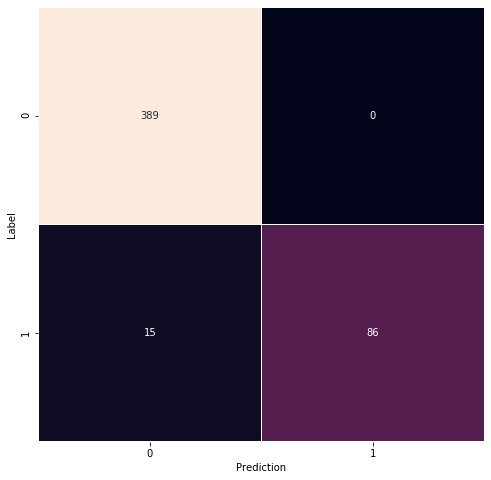

In [23]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [24]:
from sklearn.neighbors import NearestCentroid

In [25]:
clf=NearestCentroid()

In [26]:
clf.fit(x_train,y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

Test Accuracy  0.8326530612244898
Train Accuracy  0.852087114337568


0.6746031746031746

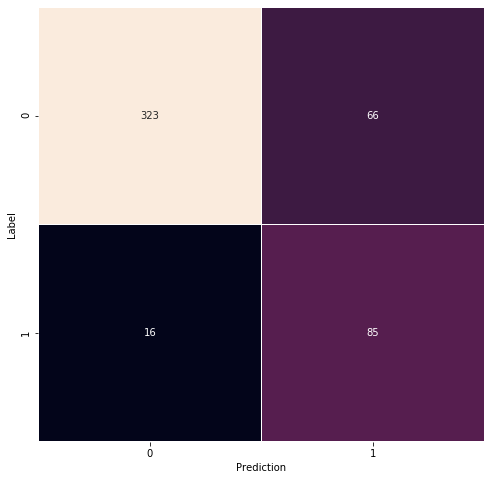

In [27]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()          

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2)

In [30]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Test Accuracy  1.0
Train Accuracy  1.0


1.0

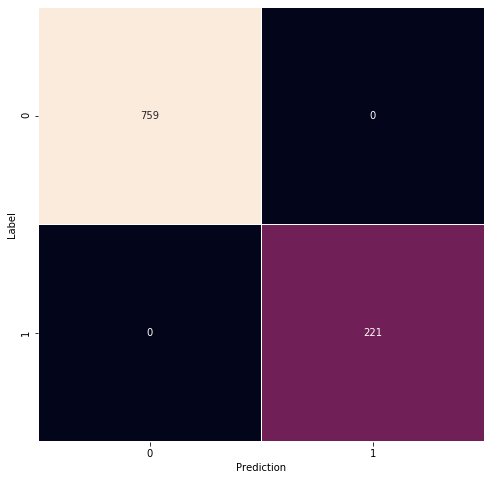

In [31]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [32]:
from xgboost import XGBClassifier 

/home/daniyal/.local/lib/python3.6/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
clf=XGBClassifier()

In [34]:
clf.fit(x_train, y_train,eval_set=[(x_train, y_train), (x_test, y_test)],eval_metric='logloss',verbose=True)

evals_result = clf.evals_result()

[0]	validation_0-logloss:0.43792	validation_1-logloss:0.43793
[1]	validation_0-logloss:0.29681	validation_1-logloss:0.29682
[2]	validation_0-logloss:0.20786	validation_1-logloss:0.20787
[3]	validation_0-logloss:0.14833	validation_1-logloss:0.14834
[4]	validation_0-logloss:0.10712	validation_1-logloss:0.10713
[5]	validation_0-logloss:0.07800	validation_1-logloss:0.07801
[6]	validation_0-logloss:0.05713	validation_1-logloss:0.05714
[7]	validation_0-logloss:0.04203	validation_1-logloss:0.04204
[8]	validation_0-logloss:0.03103	validation_1-logloss:0.03104
[9]	validation_0-logloss:0.02298	validation_1-logloss:0.02299
[10]	validation_0-logloss:0.01707	validation_1-logloss:0.01708
[11]	validation_0-logloss:0.01273	validation_1-logloss:0.01273
[12]	validation_0-logloss:0.00952	validation_1-logloss:0.00953
[13]	validation_0-logloss:0.00715	validation_1-logloss:0.00716
[14]	validation_0-logloss:0.00539	validation_1-logloss:0.00540
[15]	validation_0-logloss:0.00410	validation_1-logloss:0.00410
[1

Test Accuracy  1.0
Train Accuracy  1.0


/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

1.0

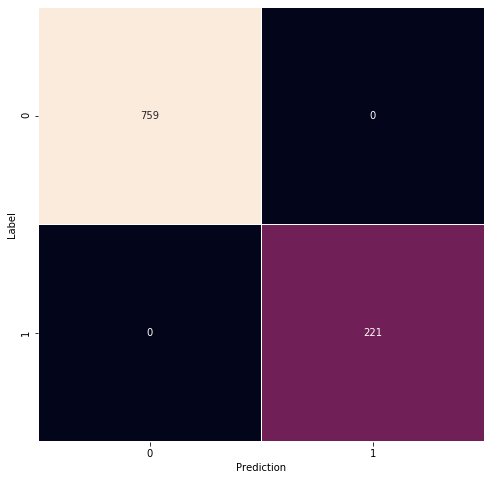

In [35]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))